### Dependencies

In [1]:
%matplotlib inline
import numpy as np # Scientific computing 
import matplotlib.pyplot as plt # Plotting 
from astropy.stats import LombScargle # Basic Astronomy functions
import pandas as pd # Dataframe to store csv file content
import seaborn # Additional plotting
seaborn.set() # Set aesthetic parameters in one step.
import os # Creating folders
import pickle # Storing data to disk (serializing module)

### Process Data

In [2]:
# ALl stars
stars = os.listdir('rv_tauri/I/')

stars_data = []
for star in stars:
    # Reading Data
    star_data = pd.read_csv('rv_tauri/I/'+star, sep="\s+", names=["JD", "Magnitude", "Uncertainty"])

    # Creating numpy array from pandas dataframe
    time = np.array(star_data.JD.tolist())
    mag = np.array(star_data.Magnitude.tolist())
    err = np.array(star_data.Uncertainty.tolist())
    
    # Storing Data
    stars_data.append((time, mag, err))

# Create list of tuples with stars and stars_data
light_curves = zip(stars, stars_data)

# Write lightcurves to disk to save memory
pickle.dump(light_curves, open("light_curves_rvb.p", "wb"))

print("Data stored.")

Data stored.


### Raw Data Plot

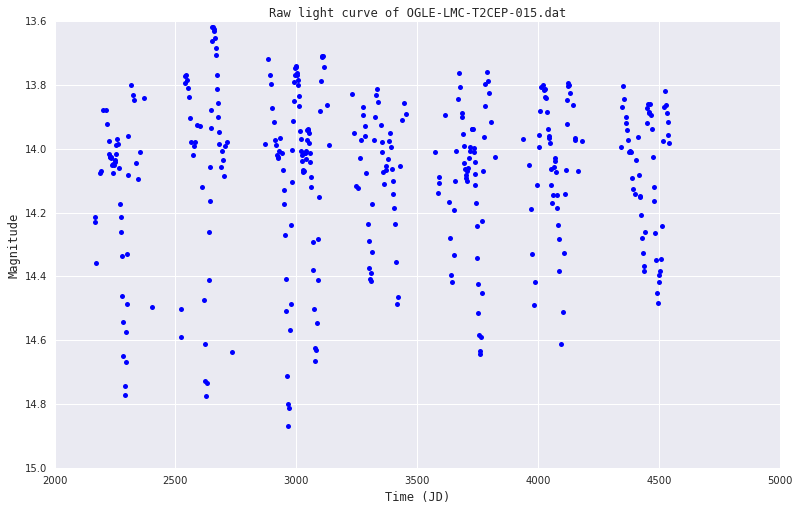

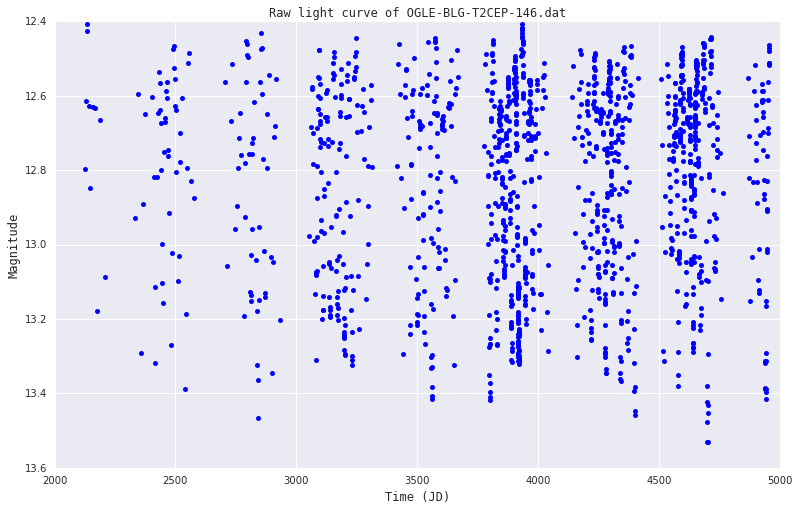

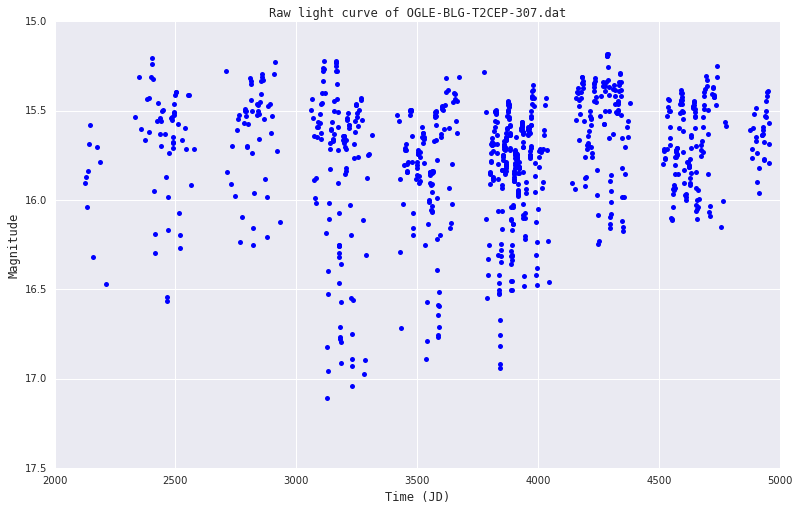

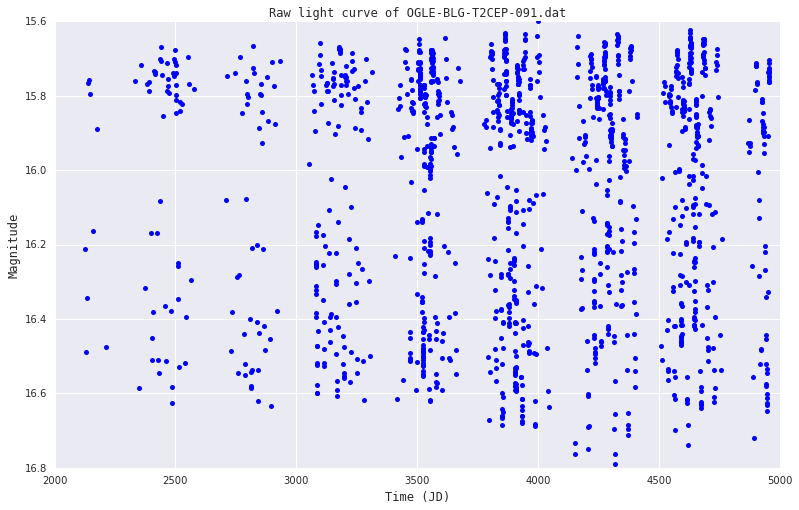

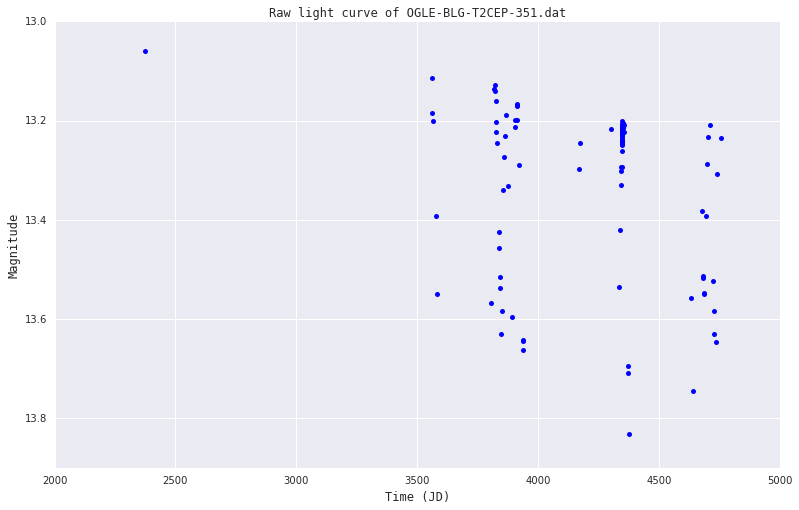

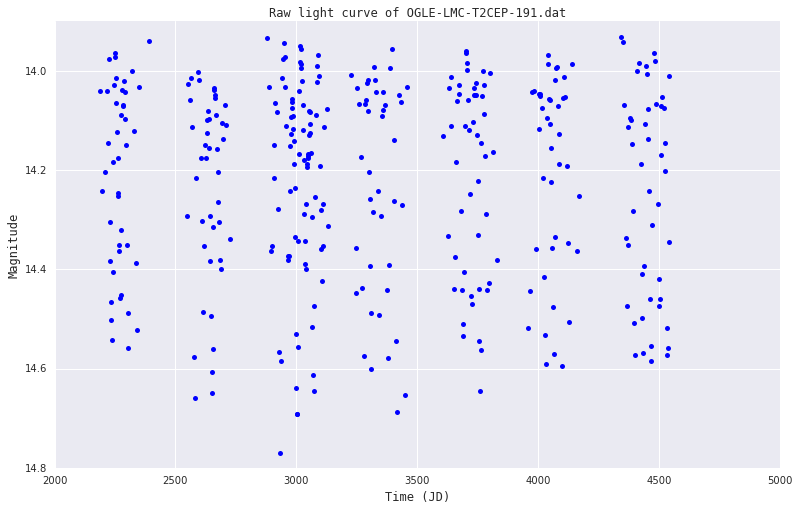

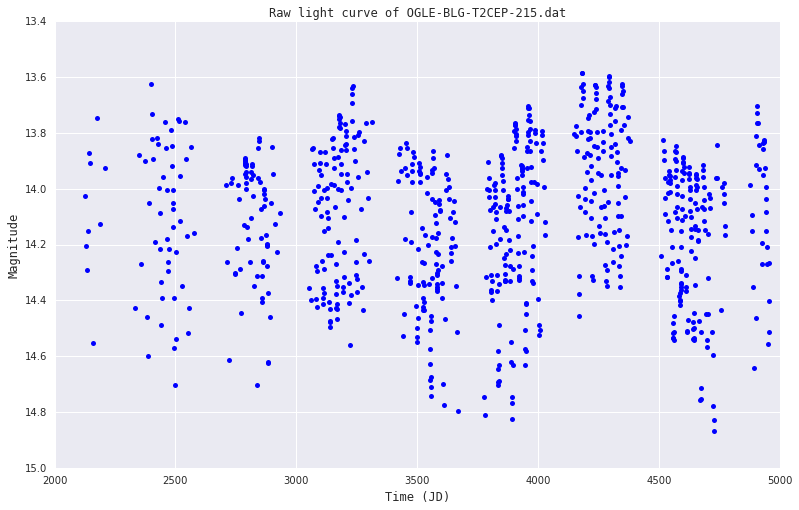

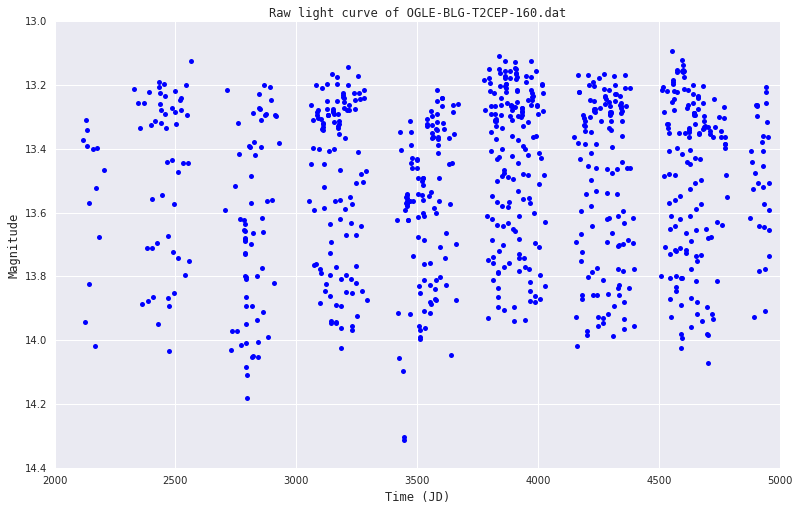

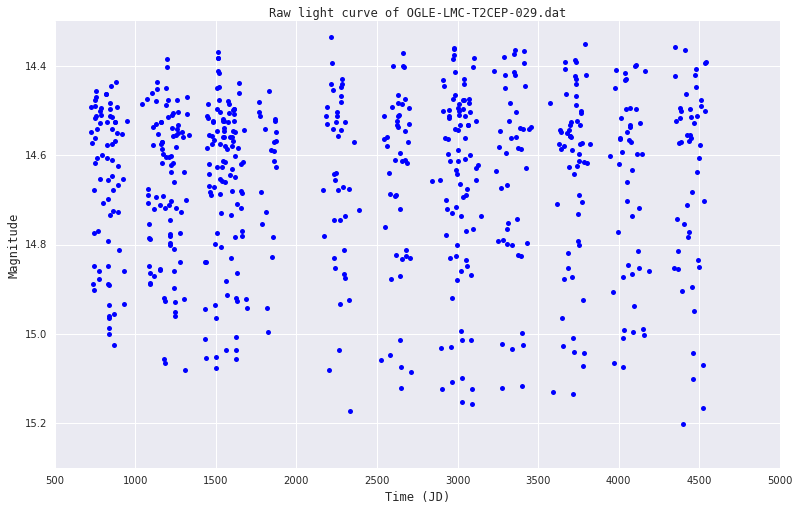

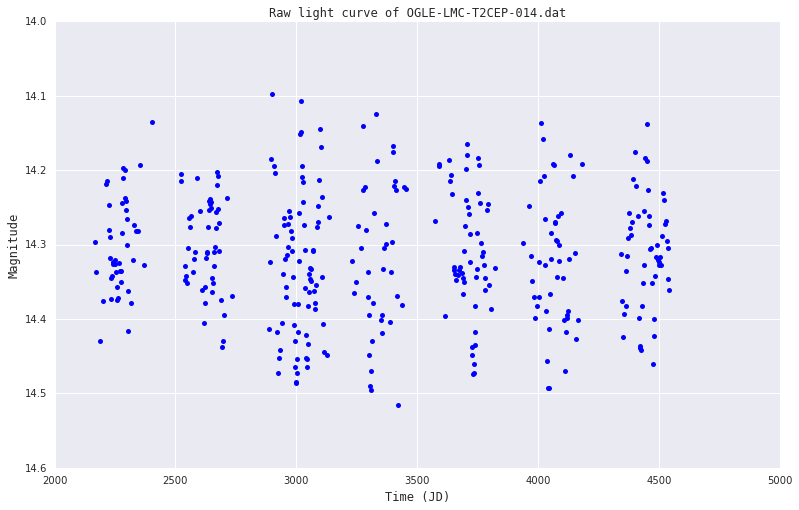

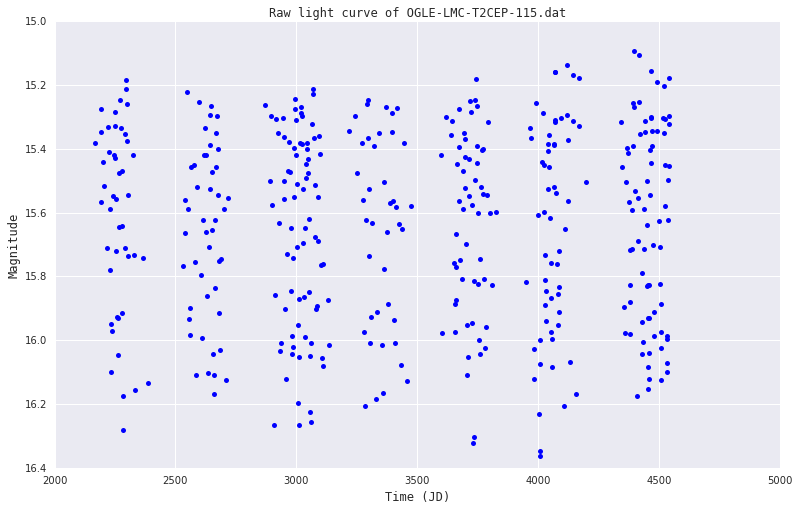

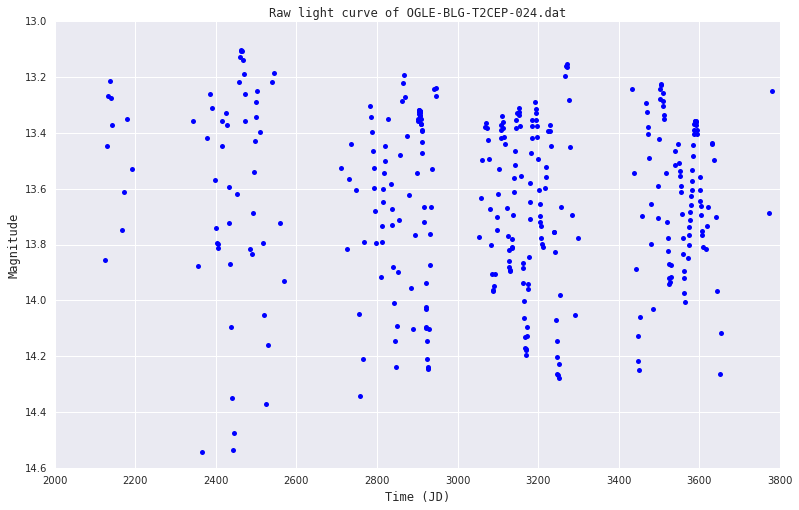

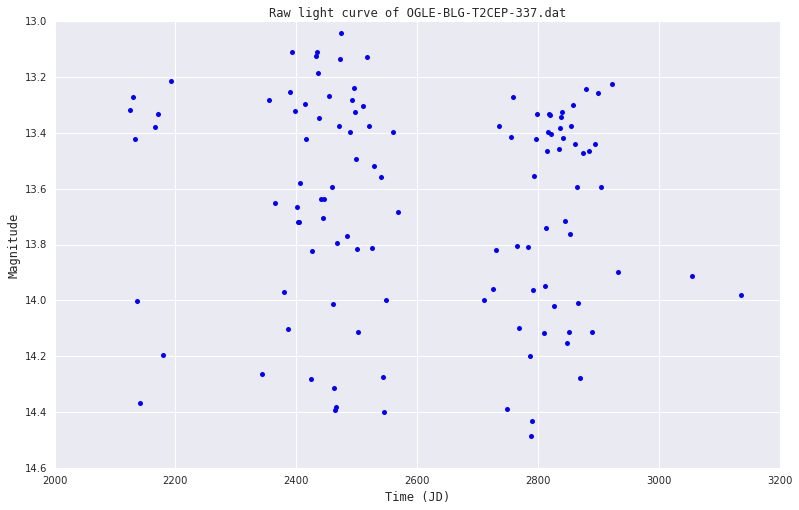

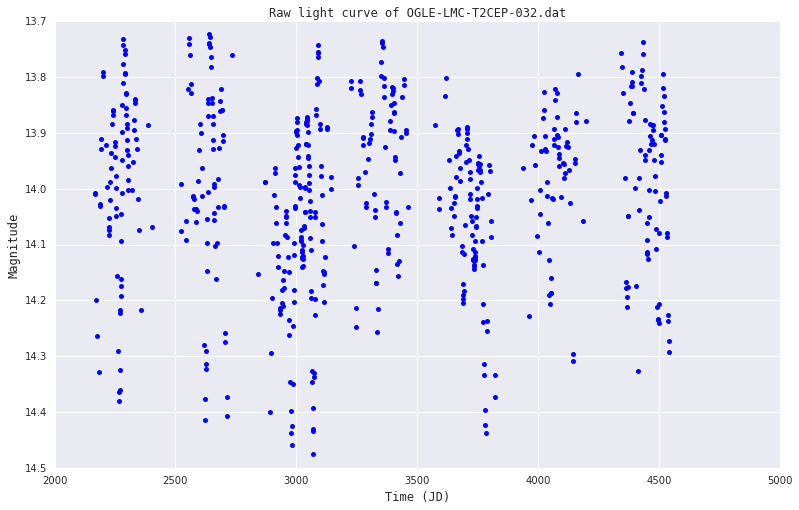

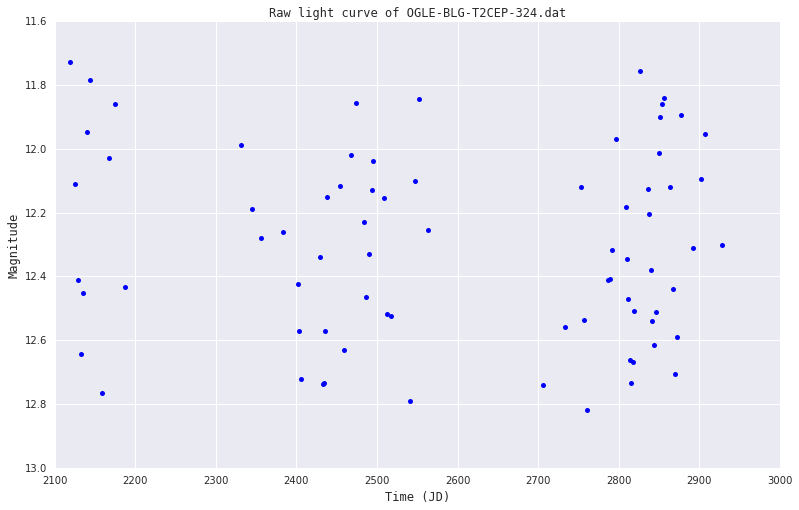

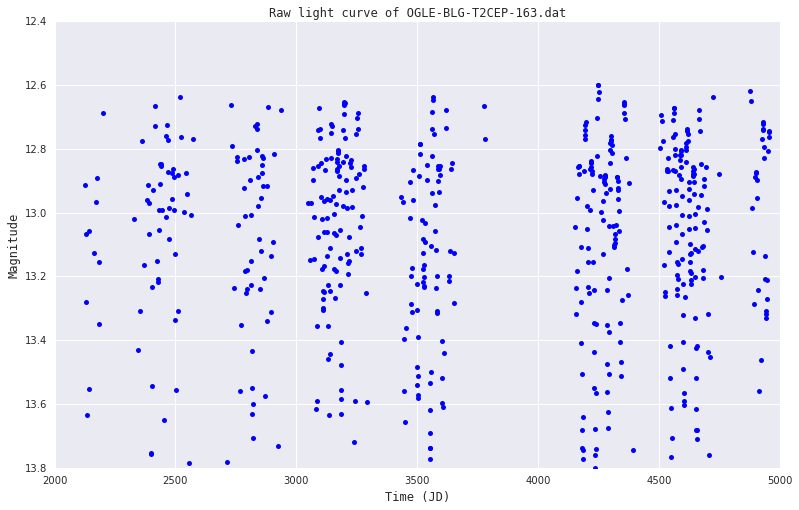

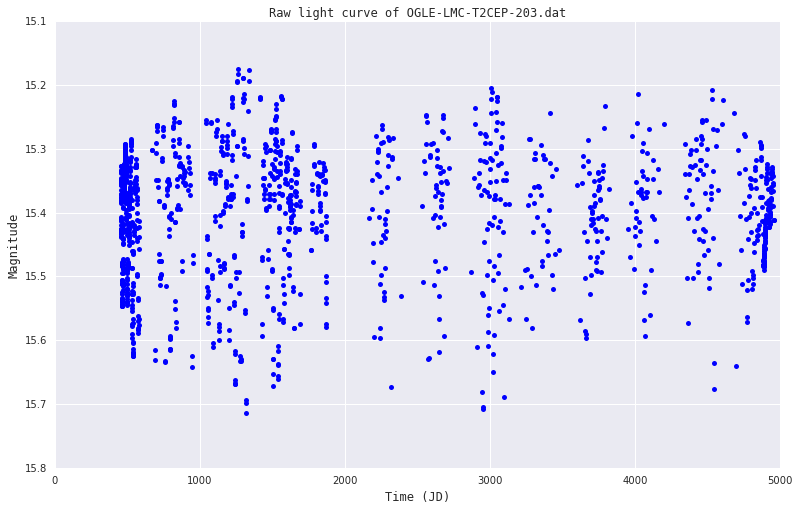

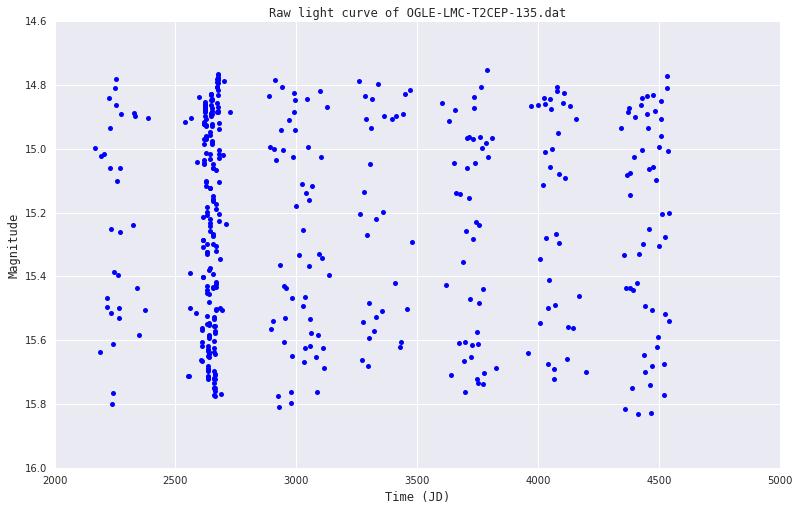

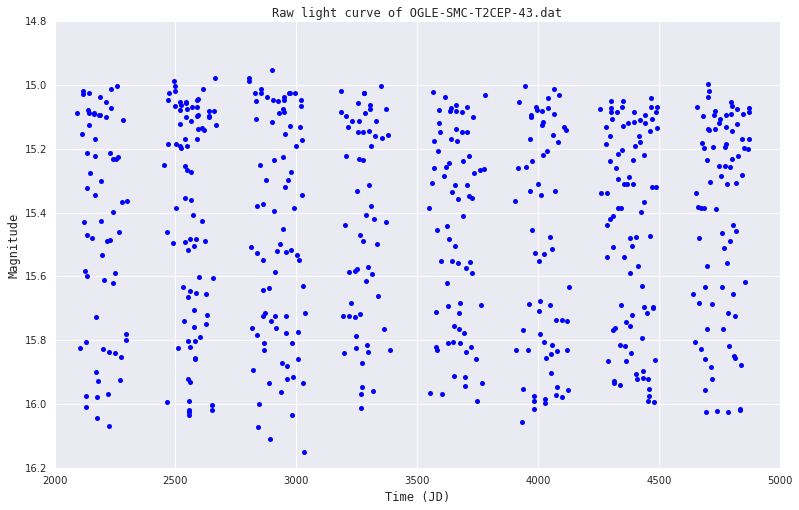

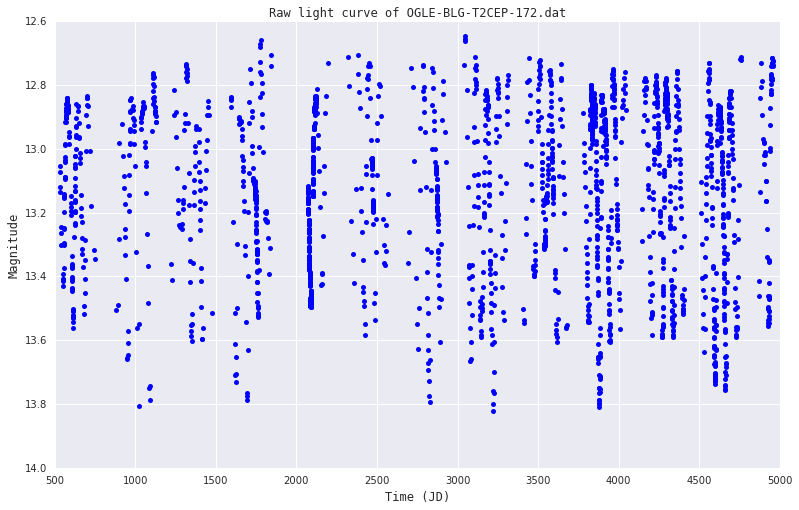

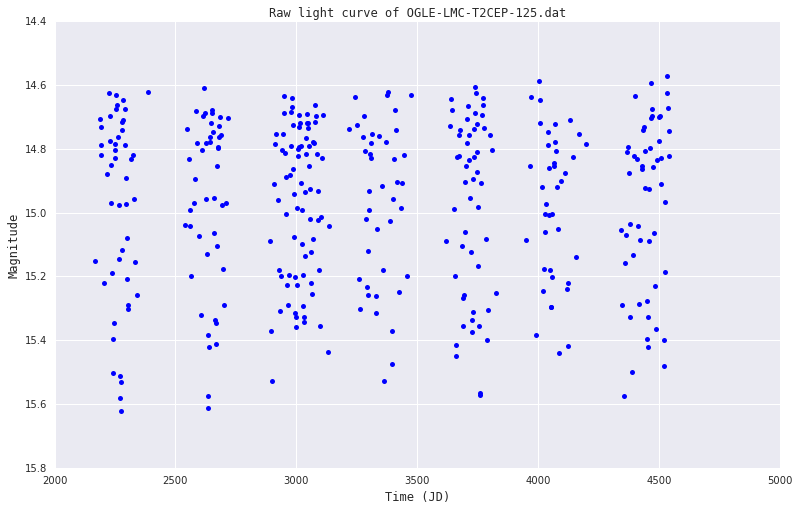

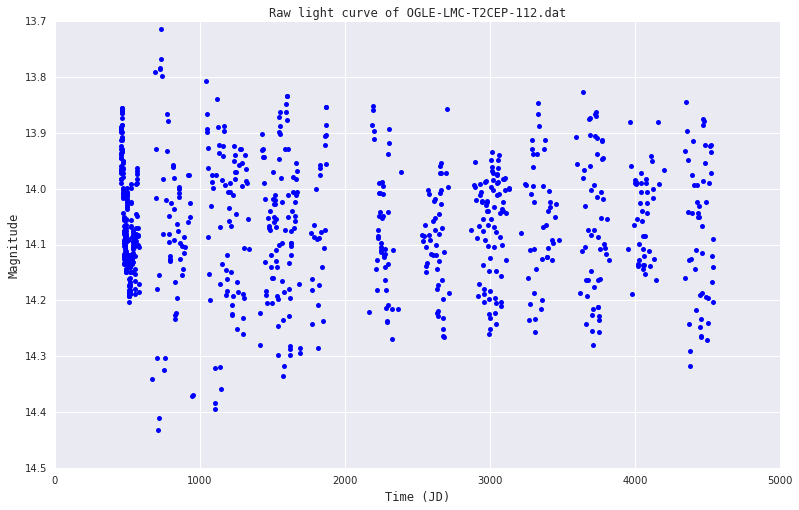

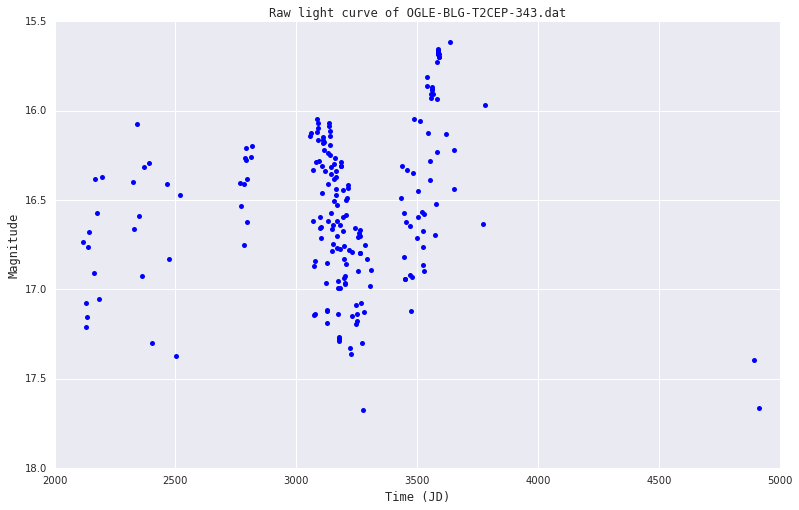

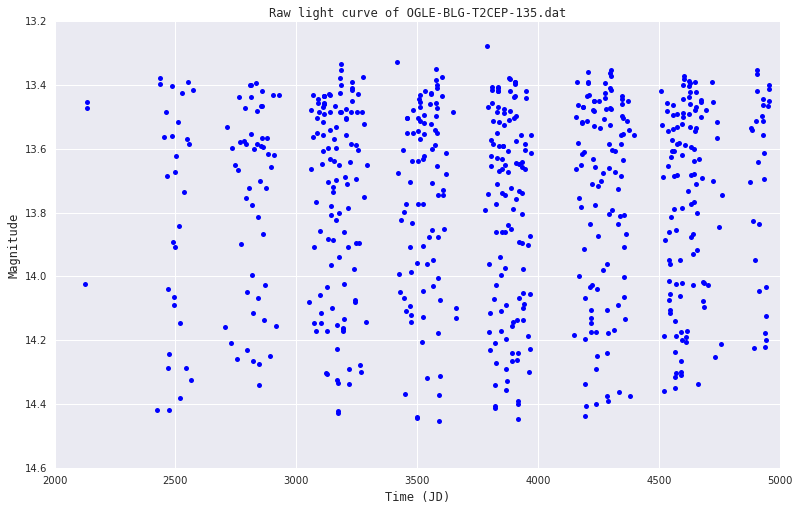

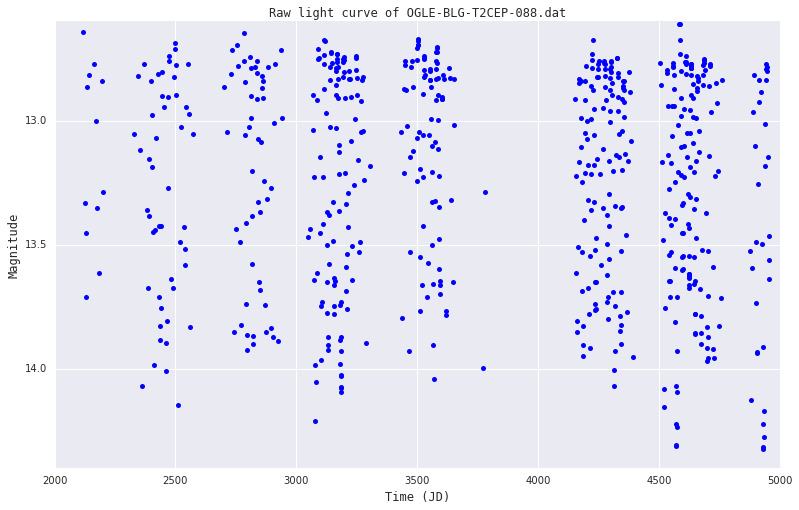

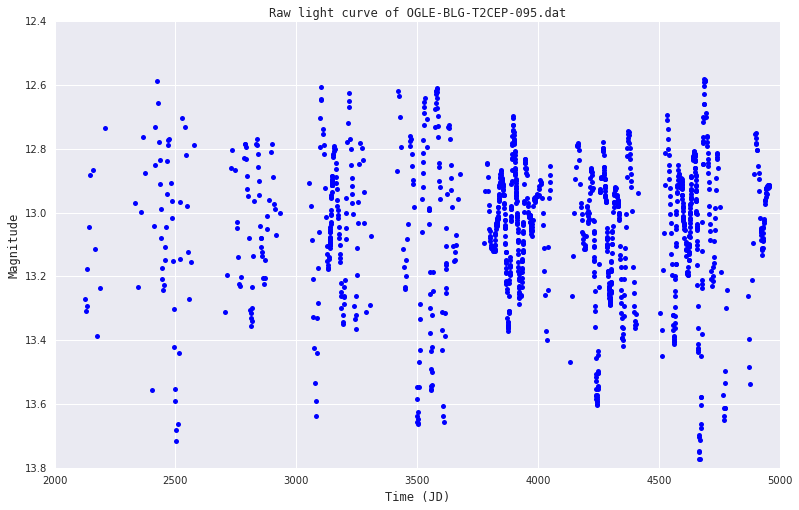

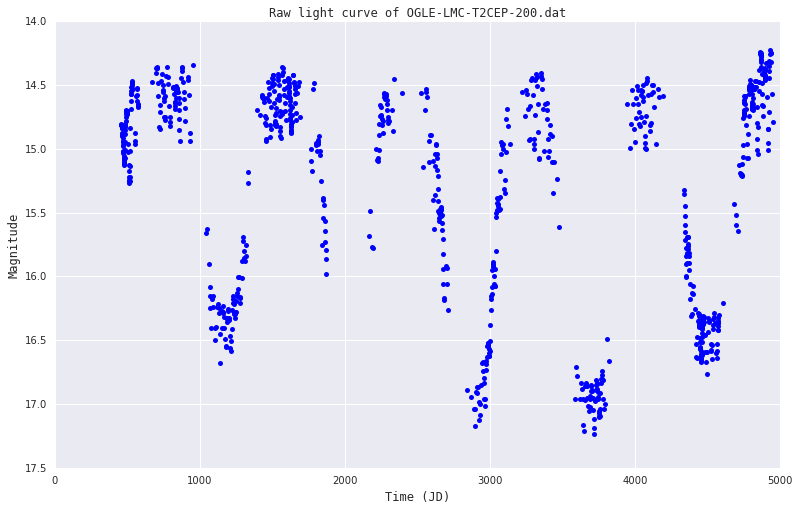

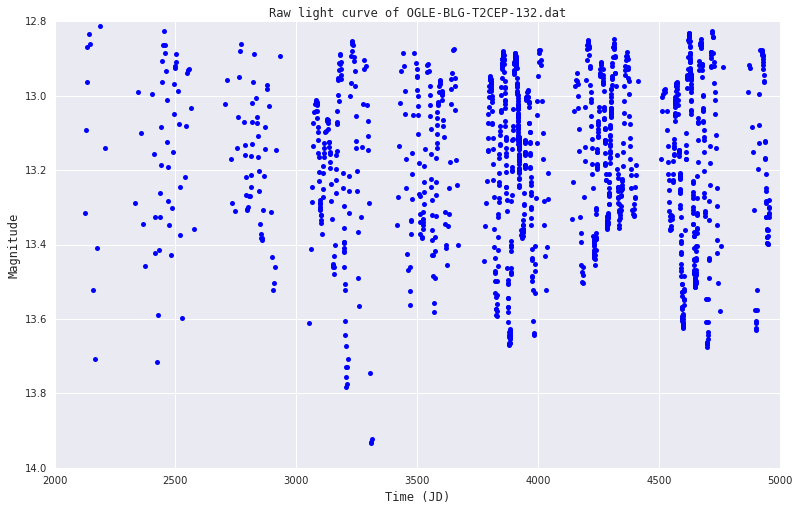

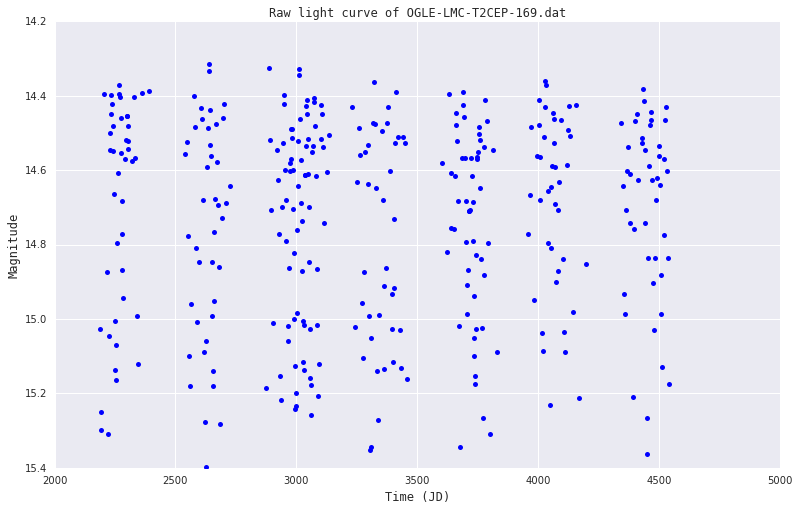

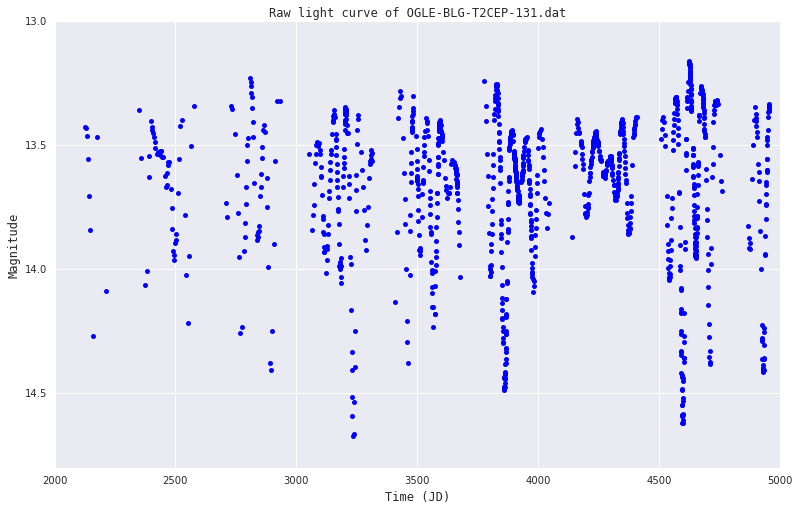

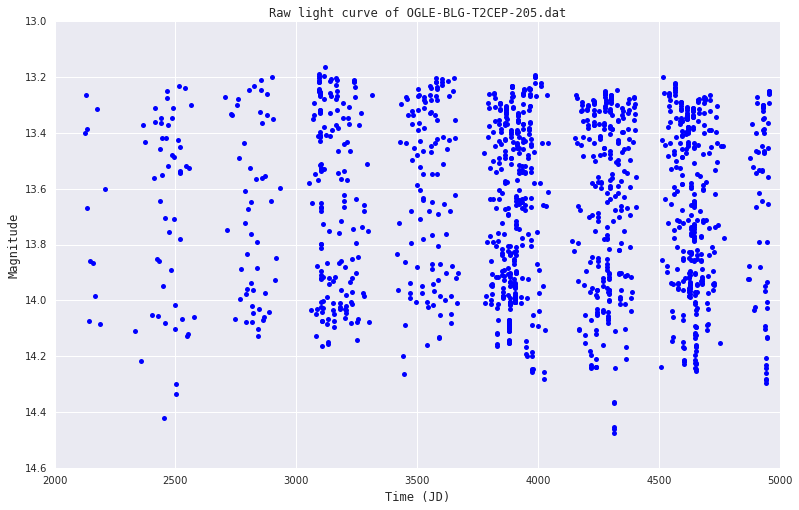

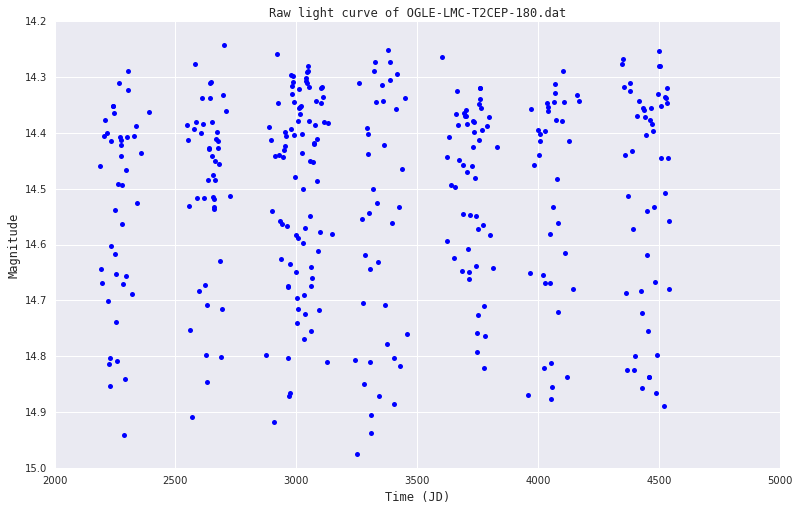

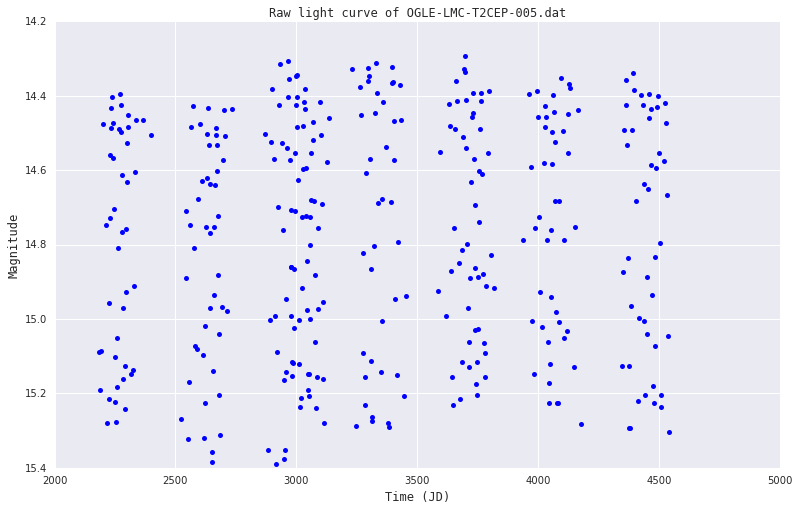

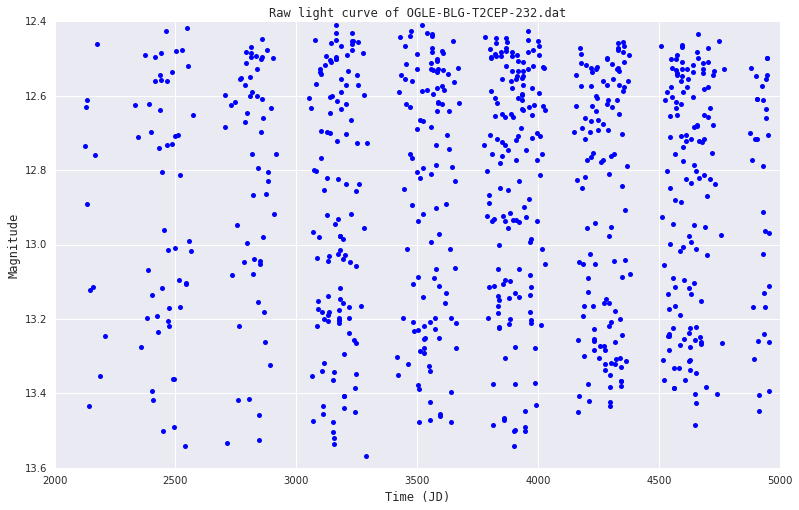

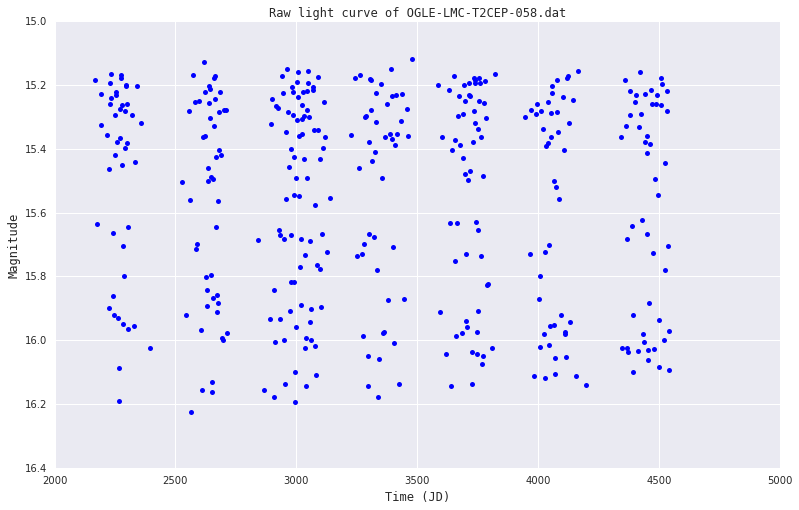

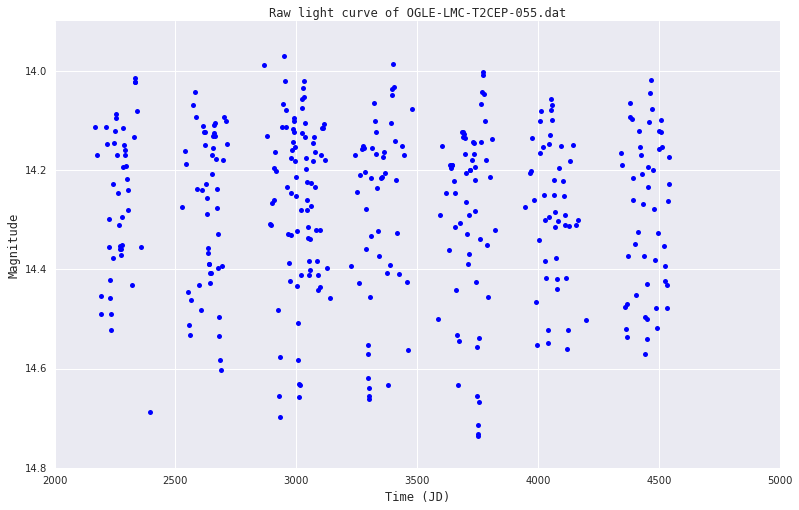

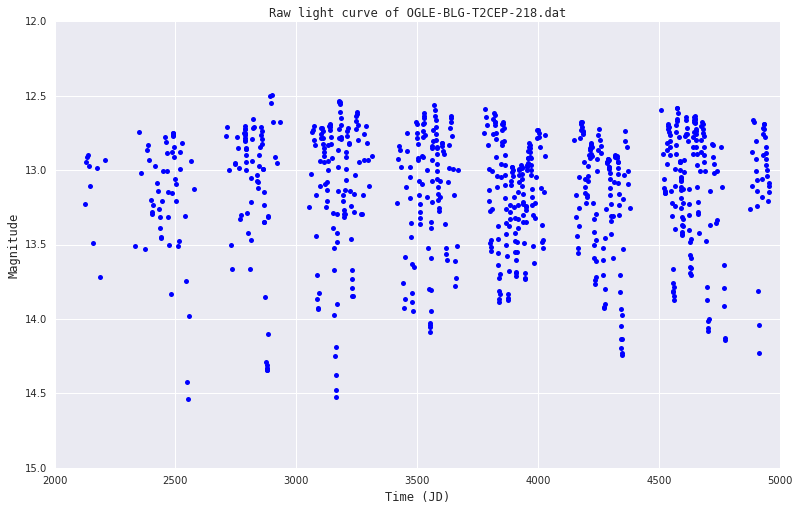

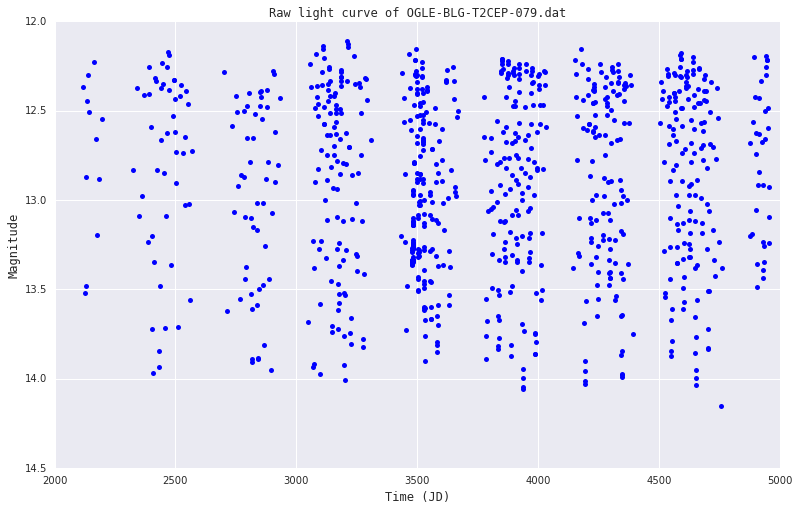

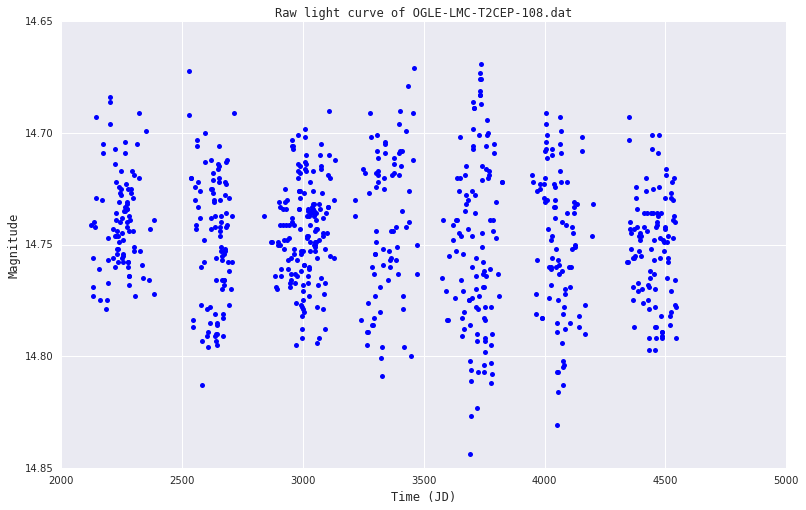

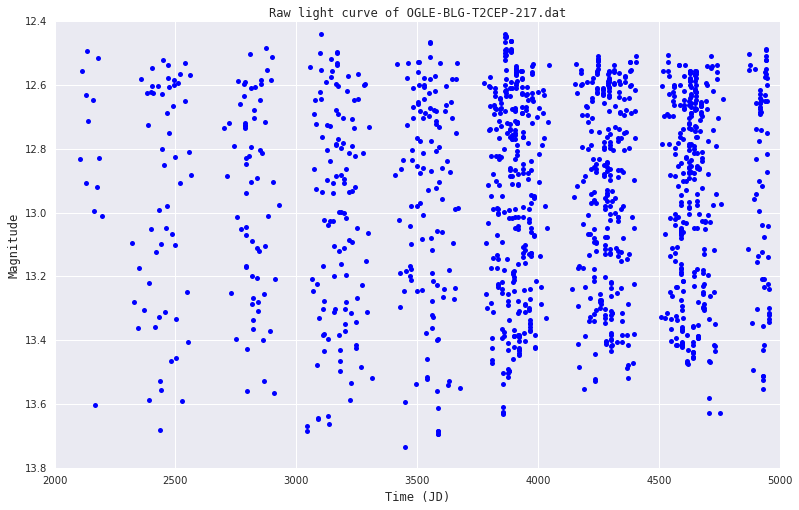

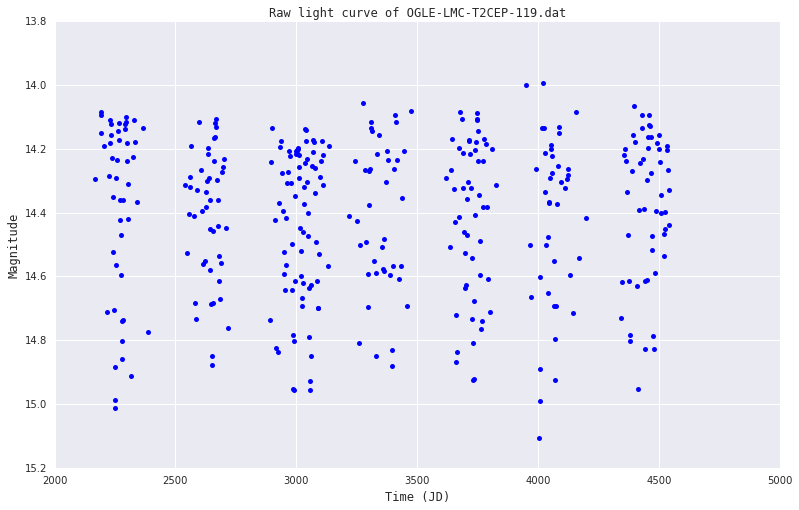

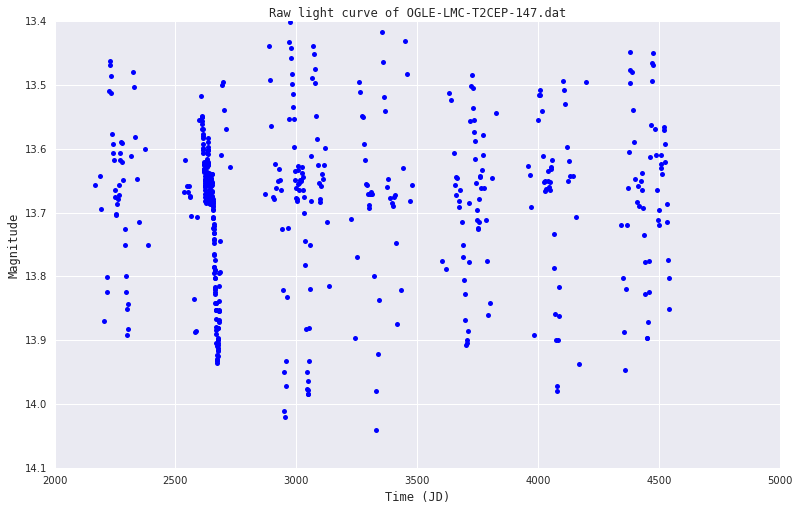

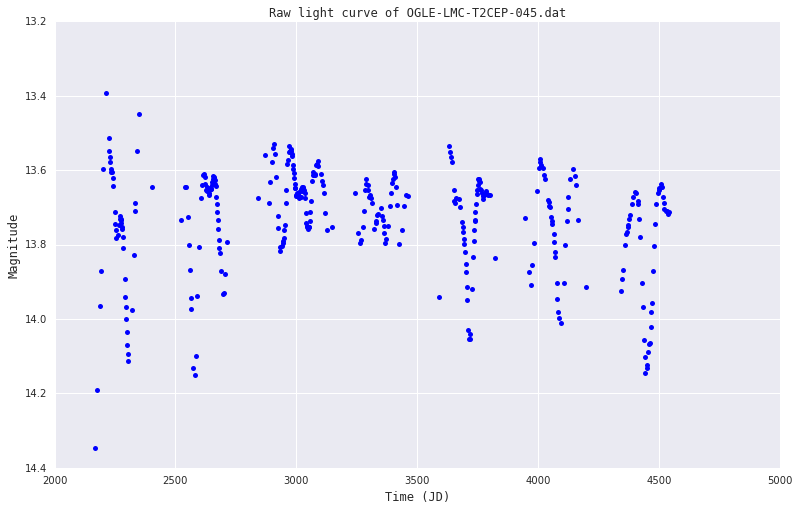

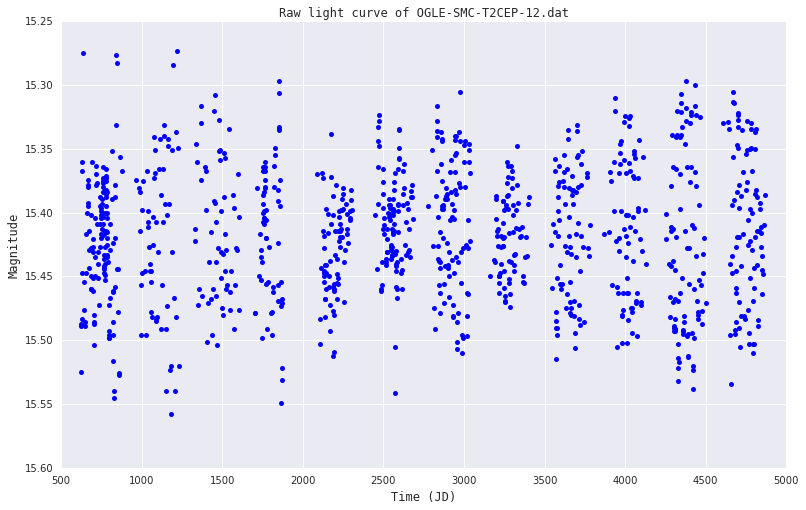

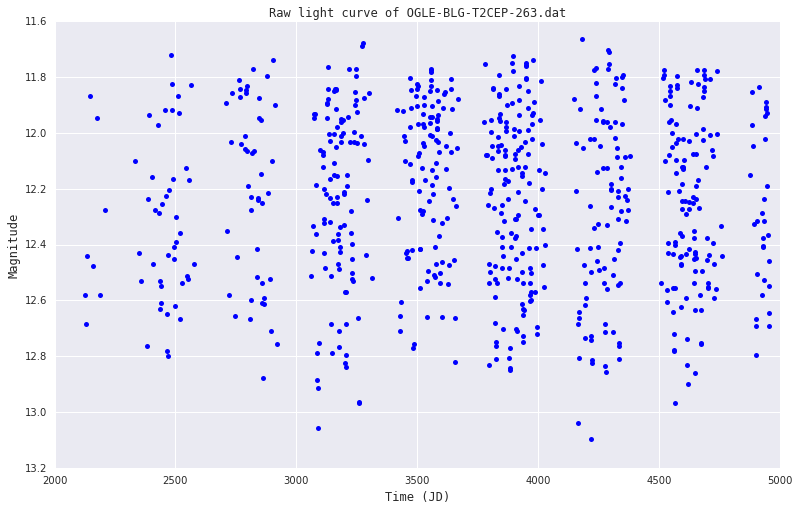

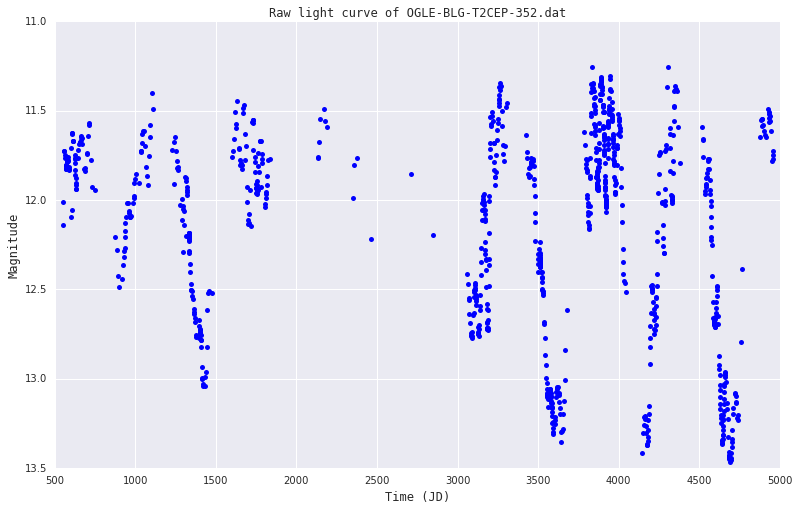

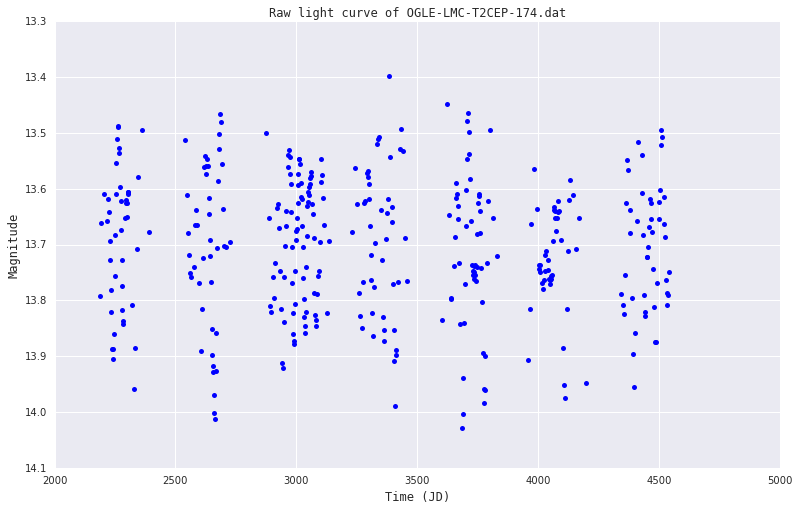

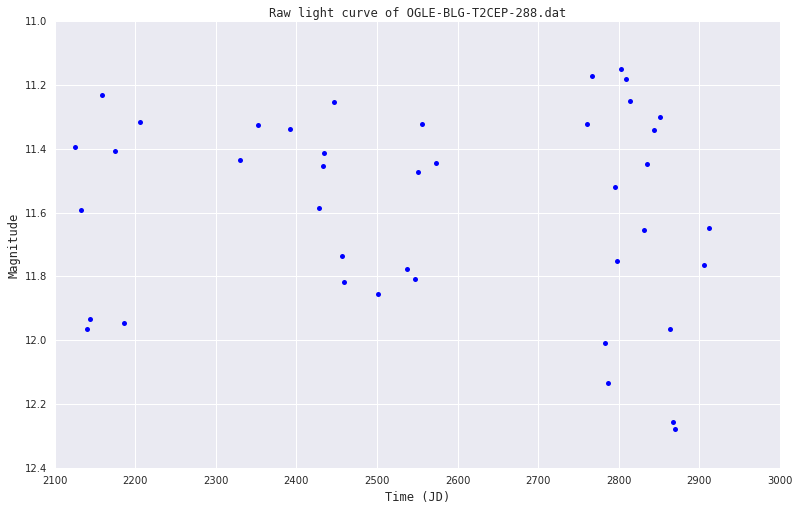

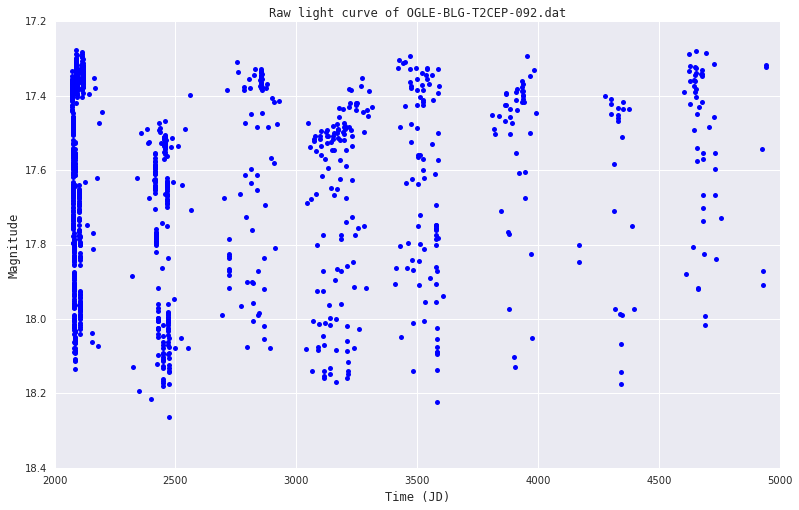

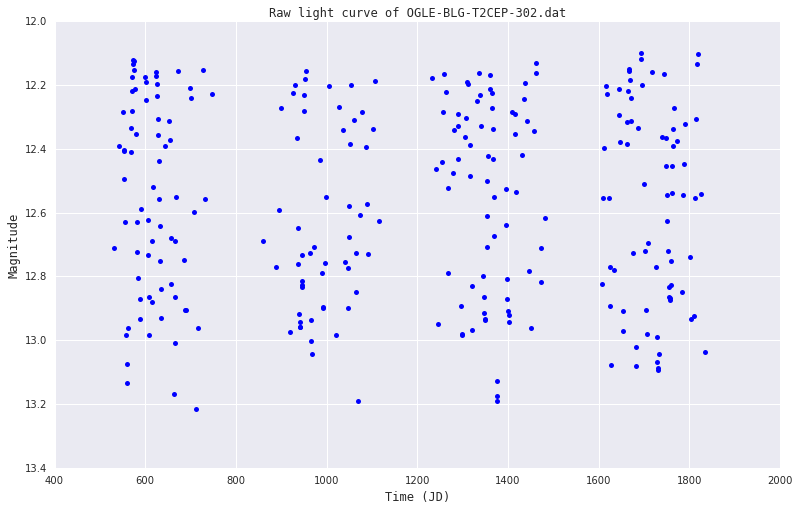

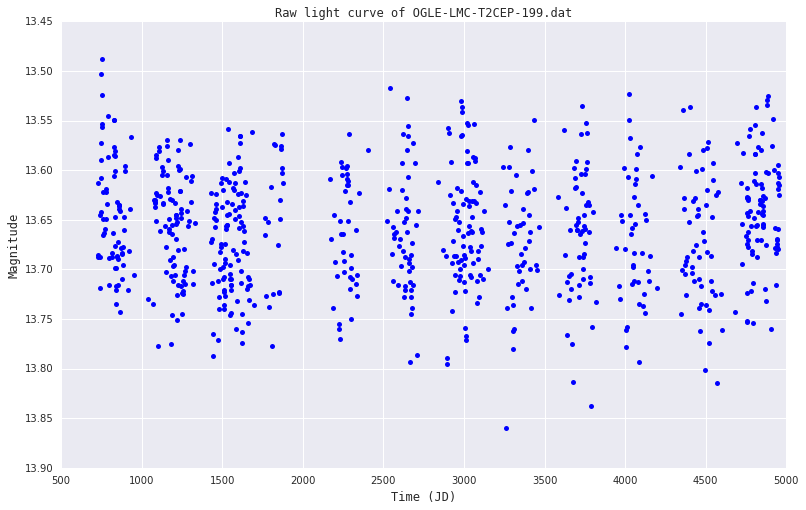

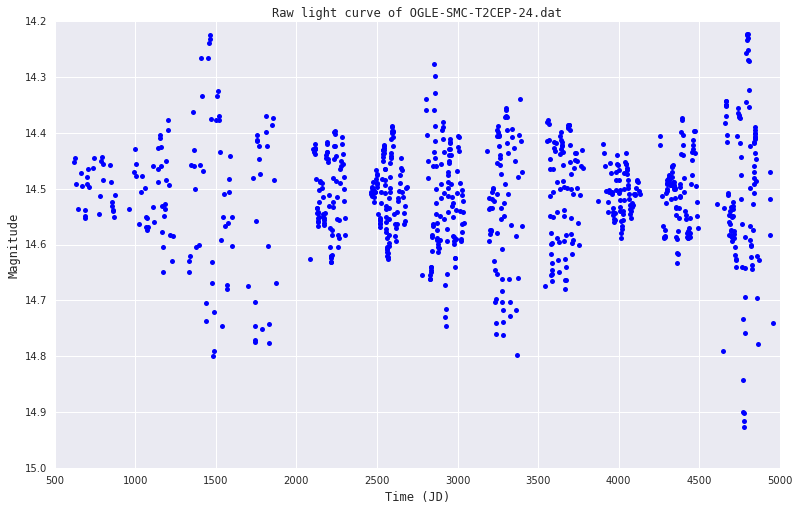

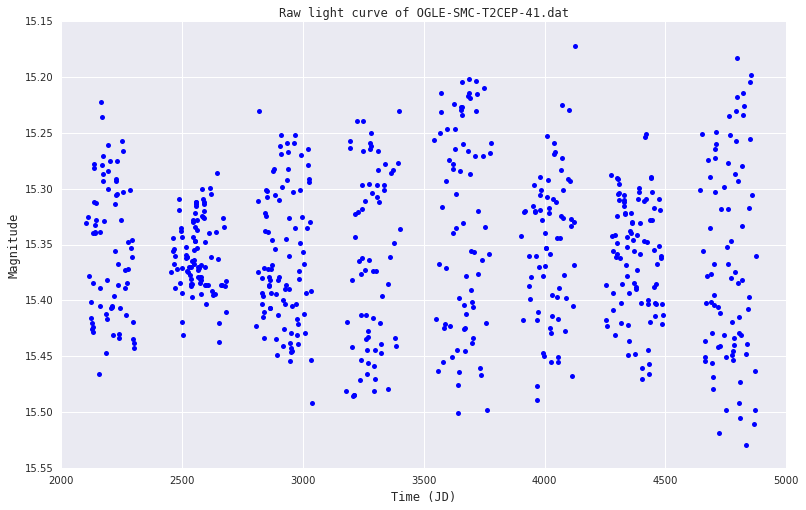

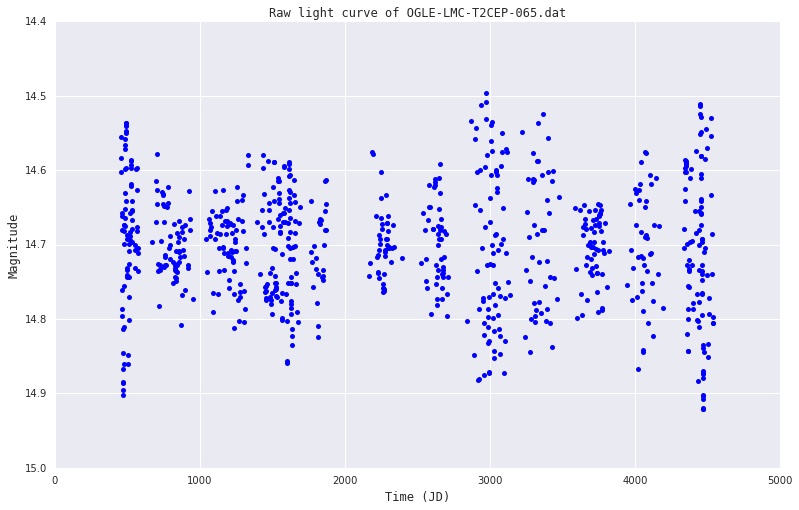

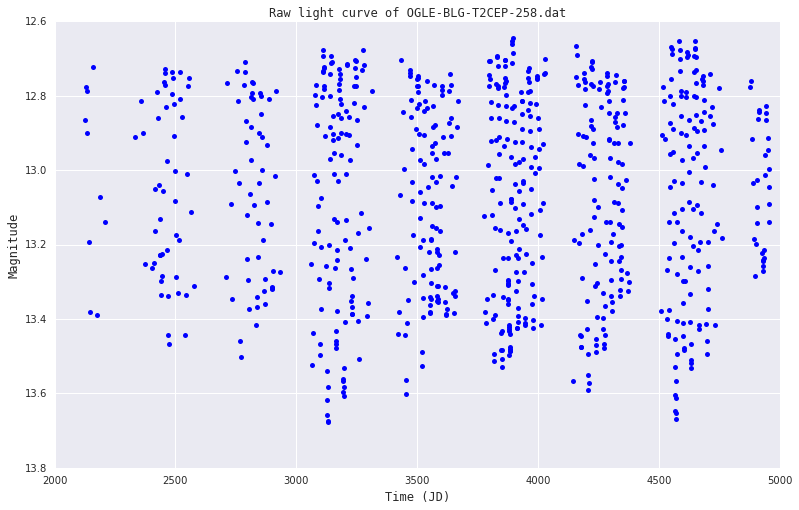

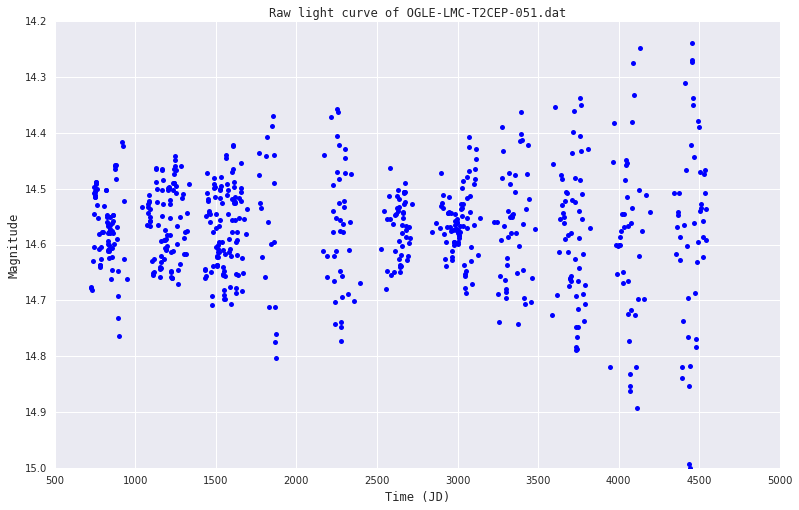

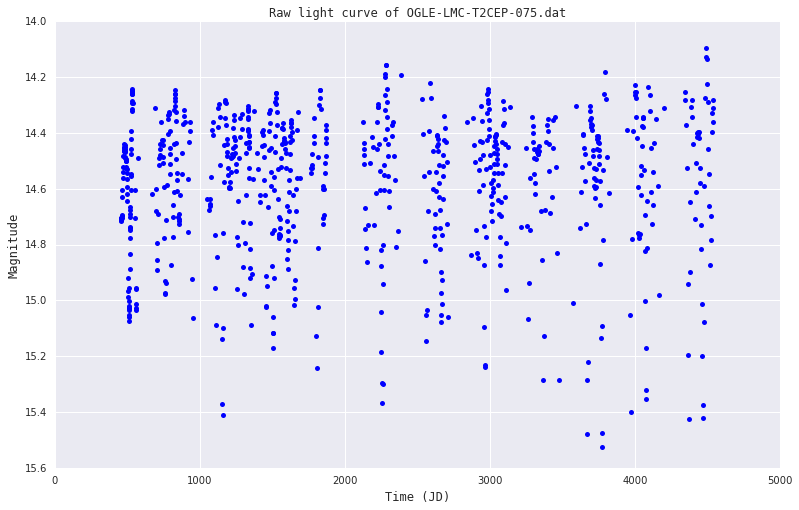

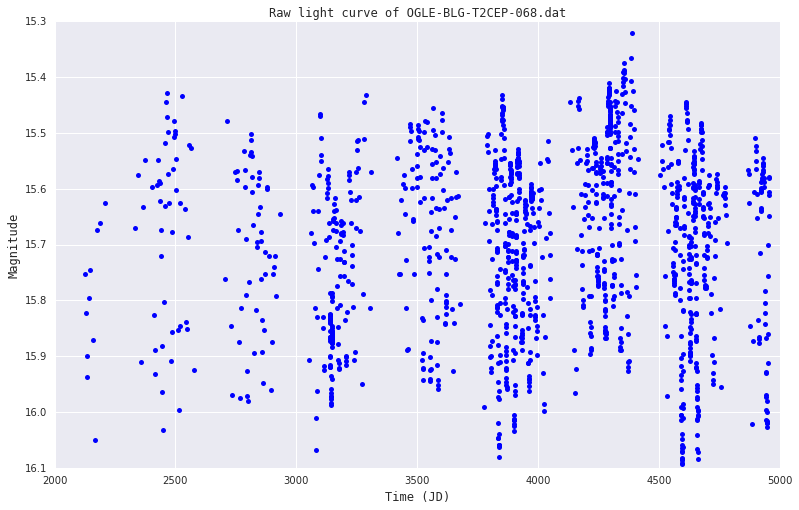

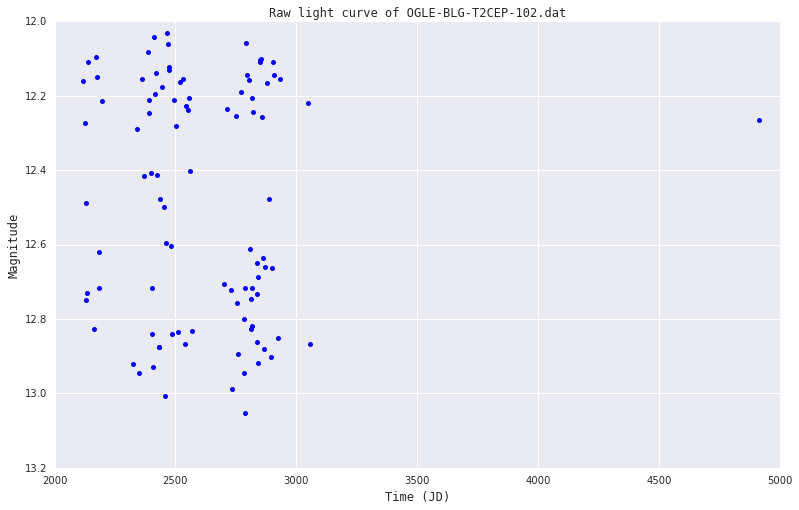

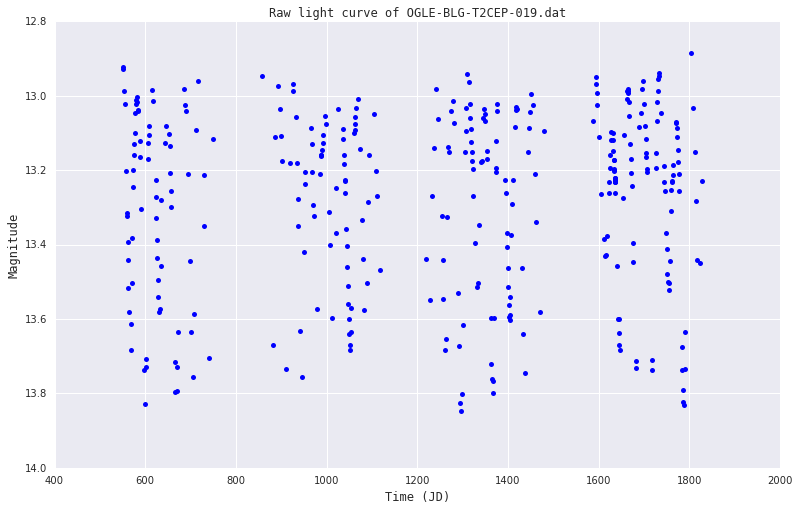

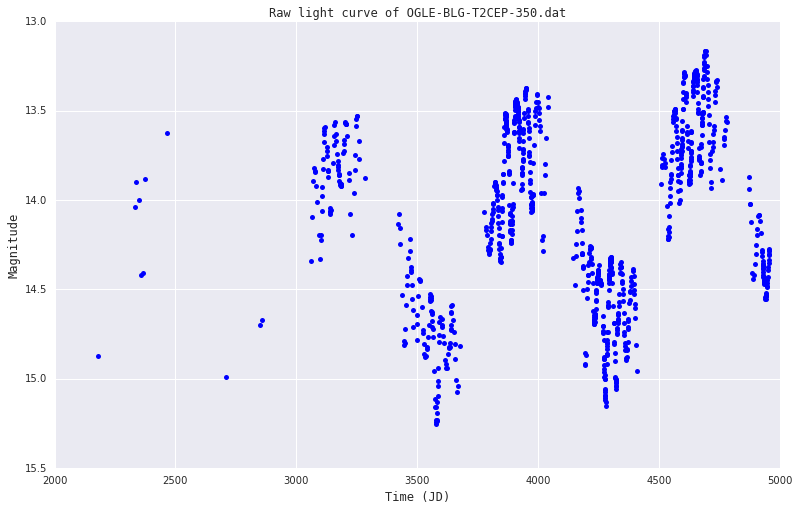

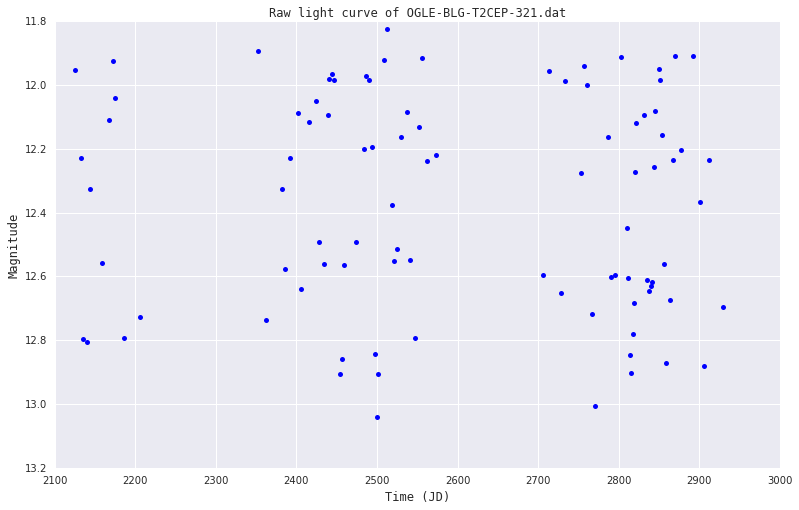

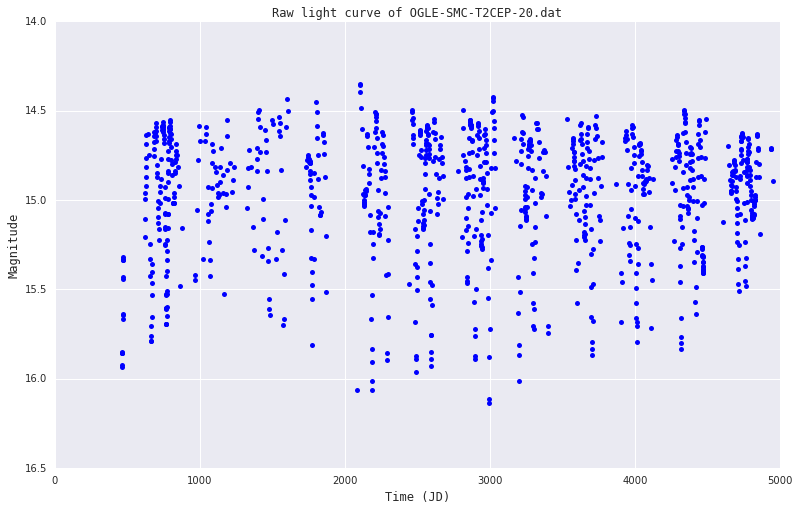

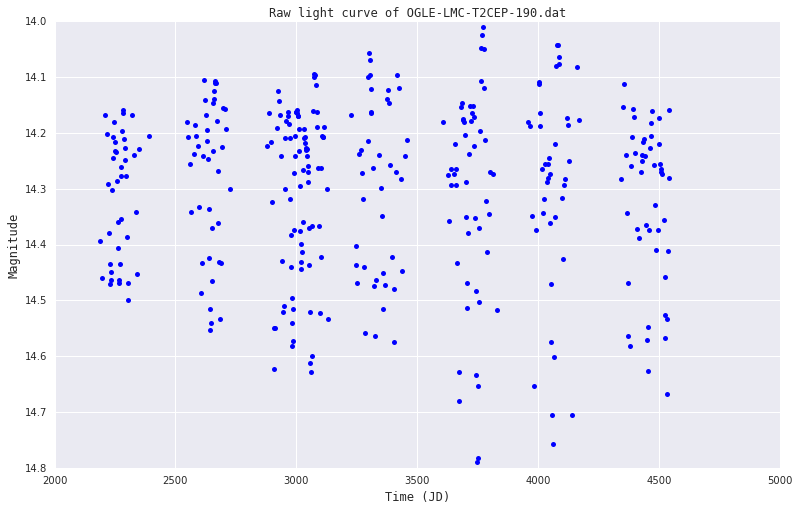

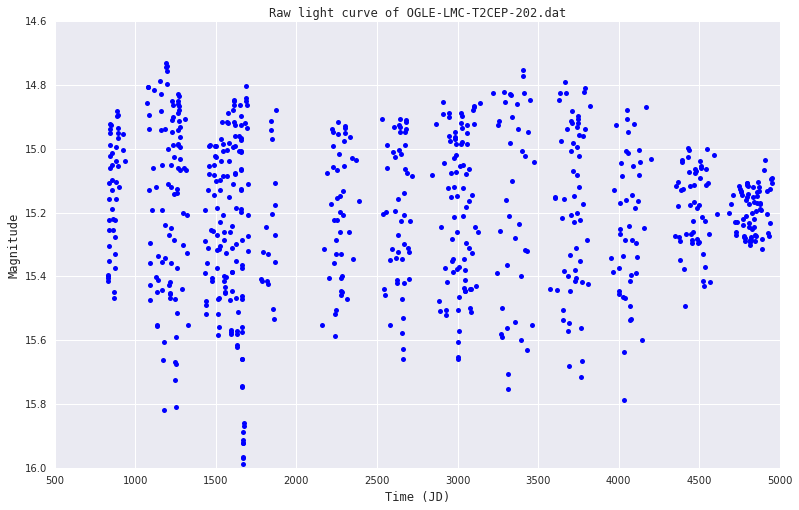

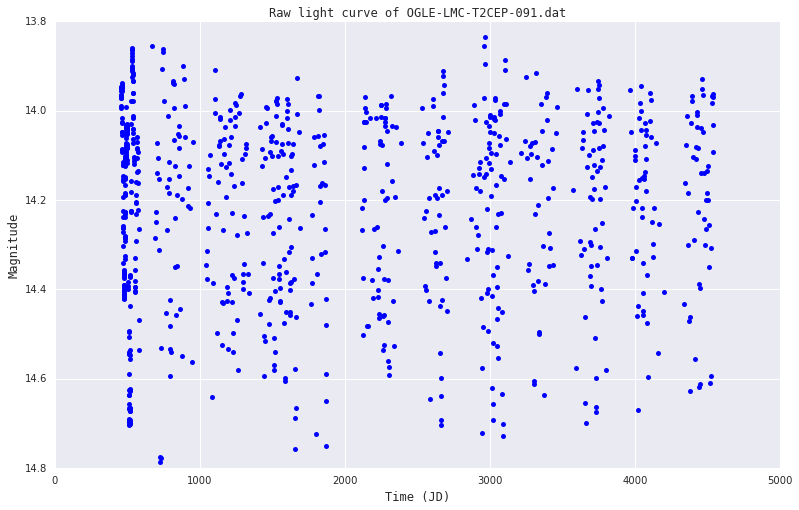

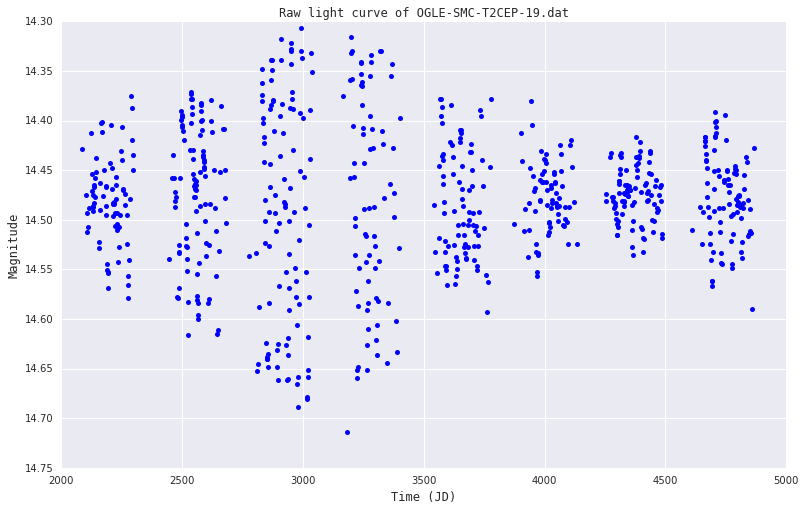

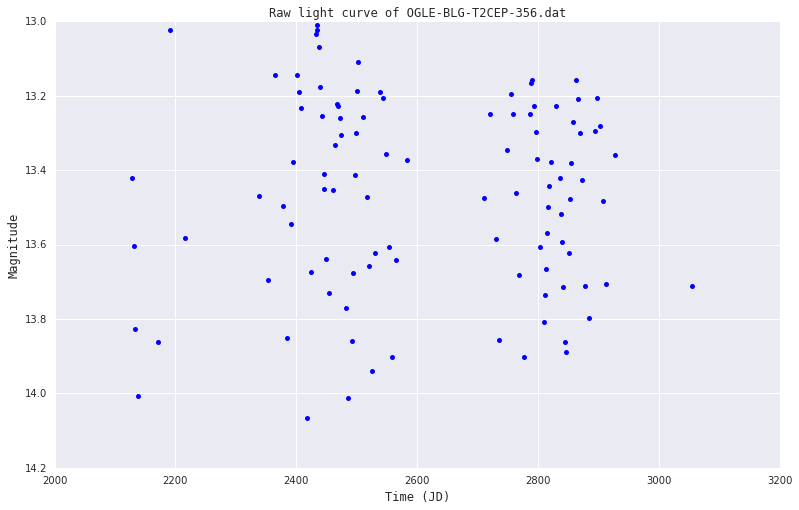

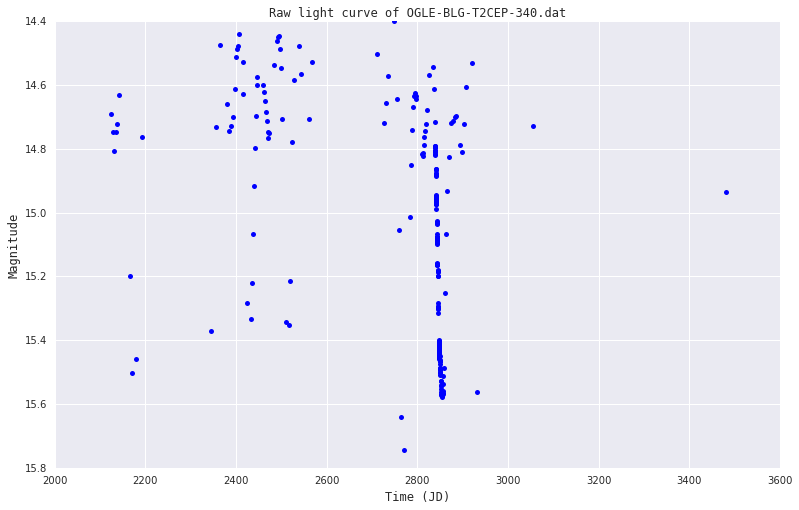

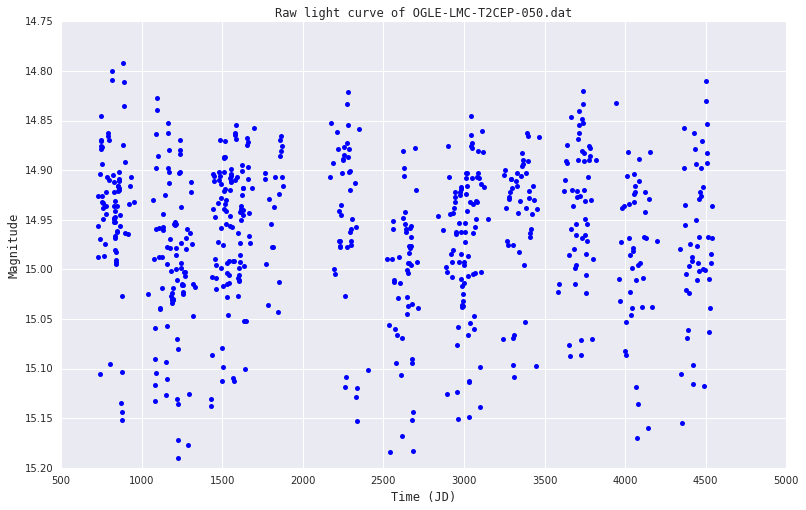

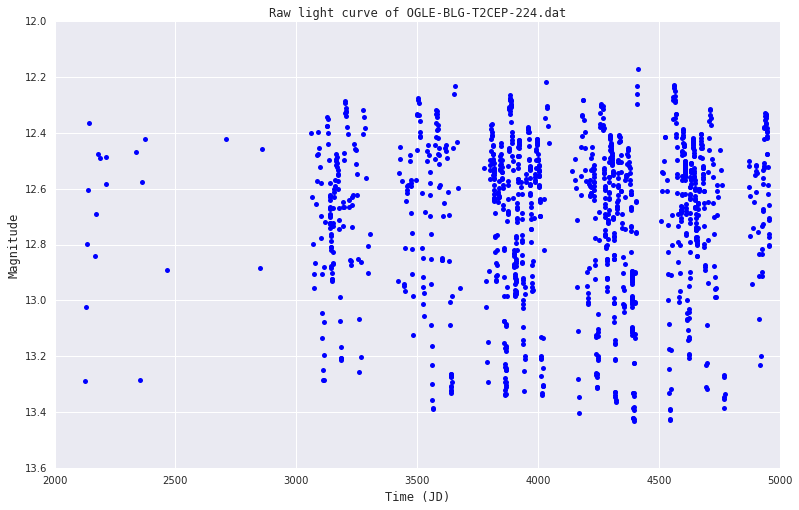

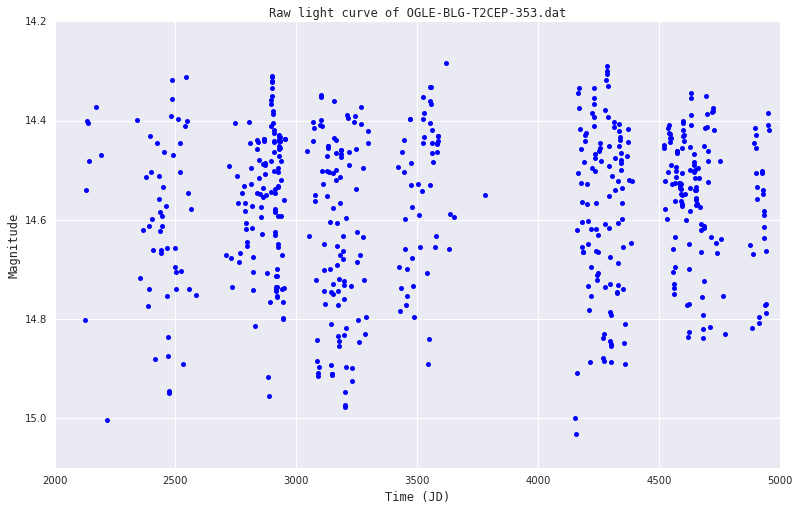

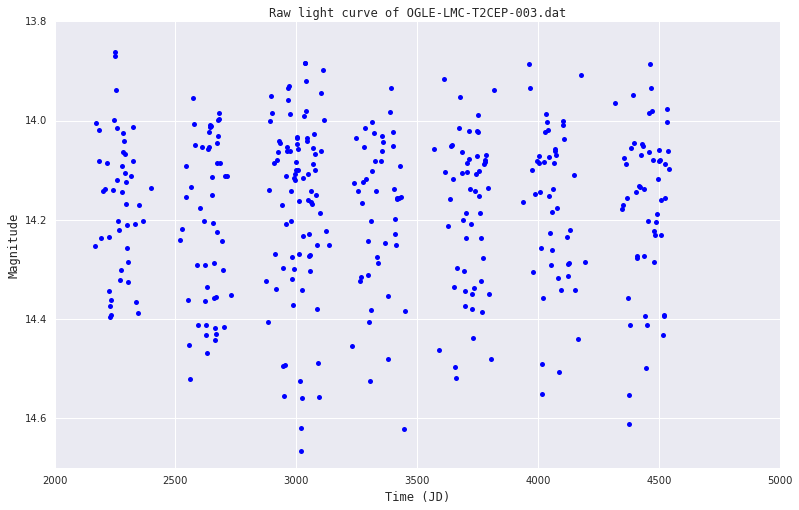

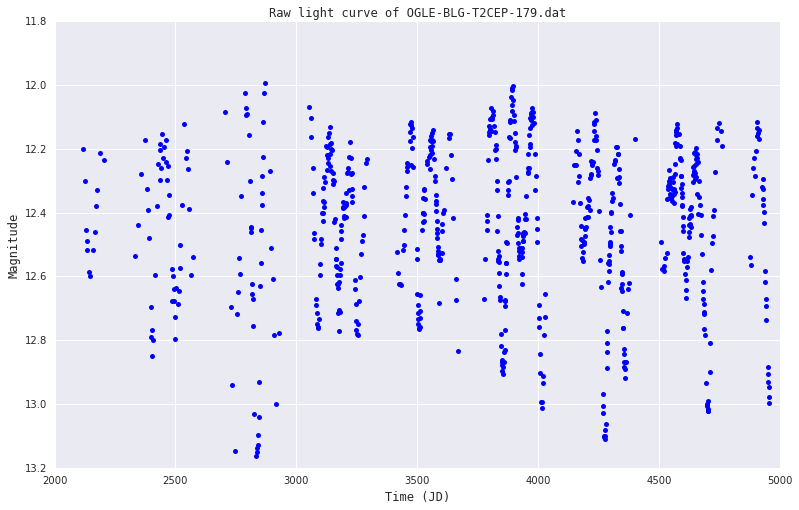

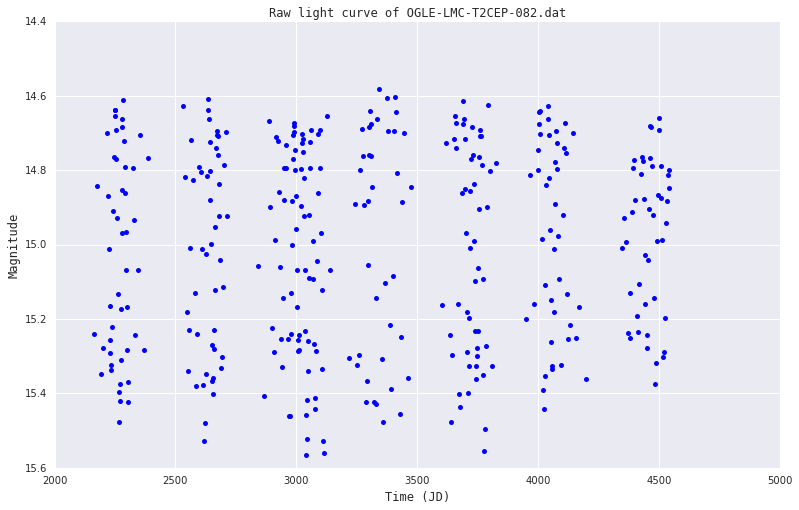

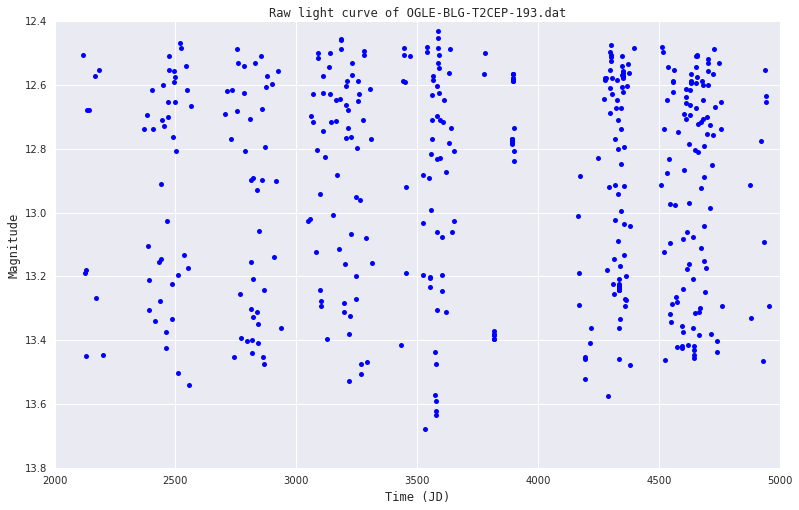

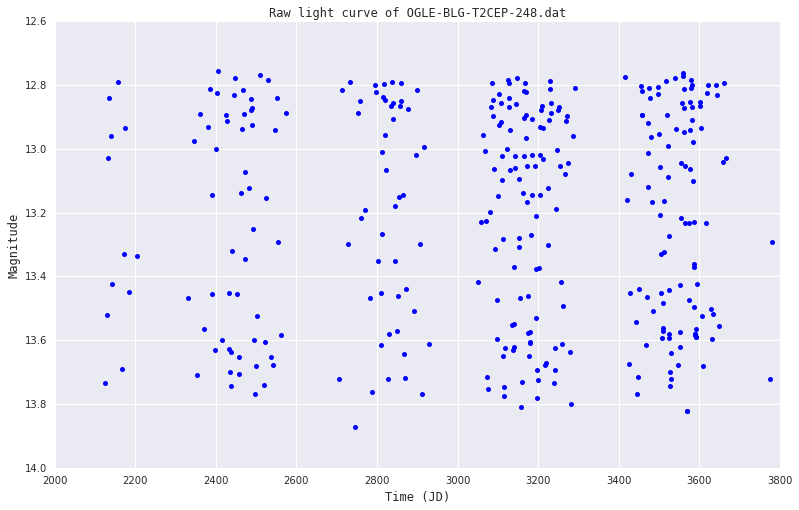

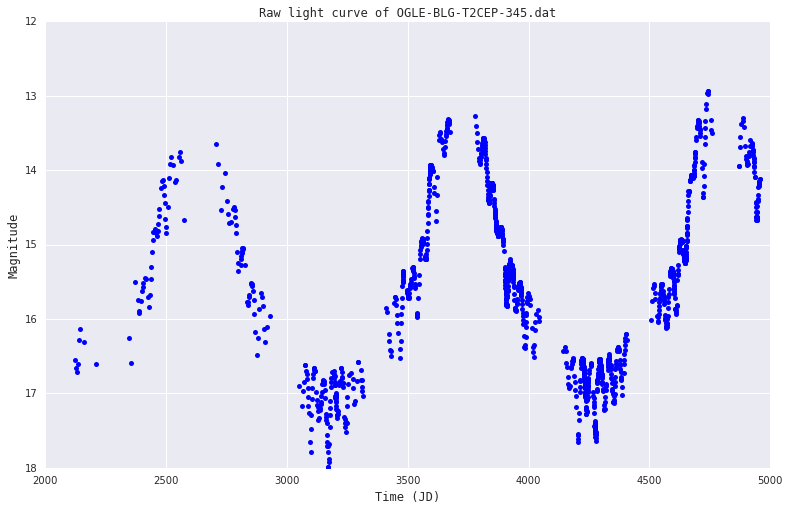

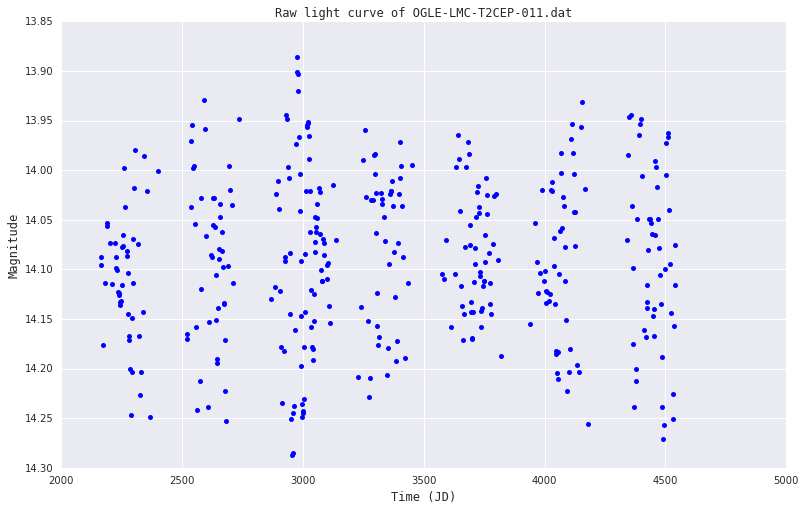

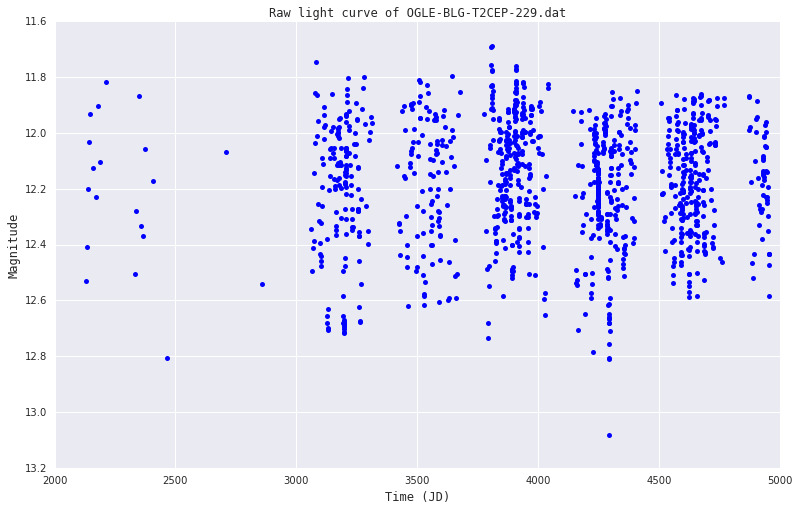

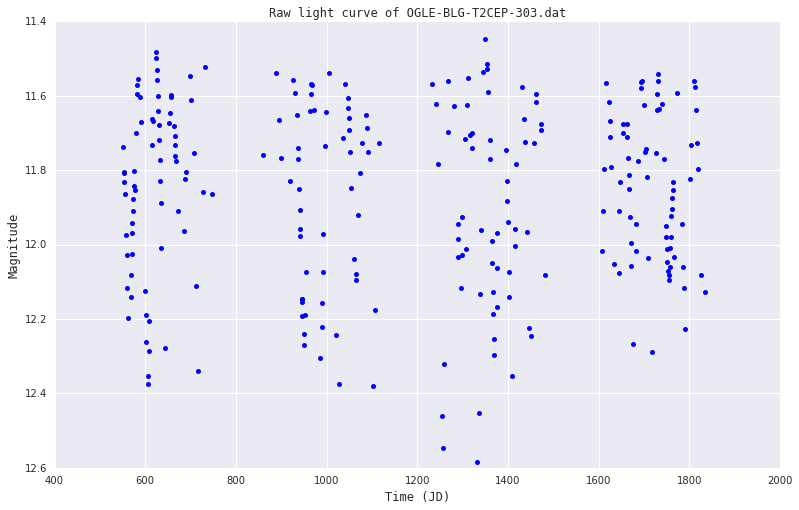

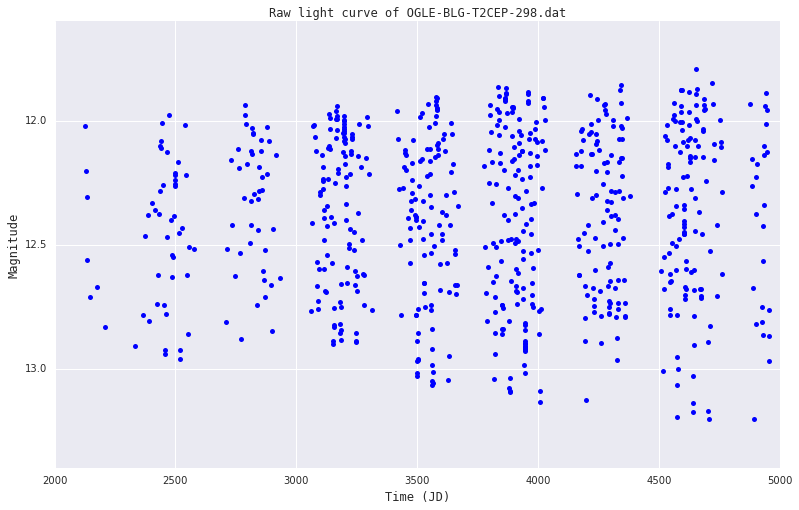

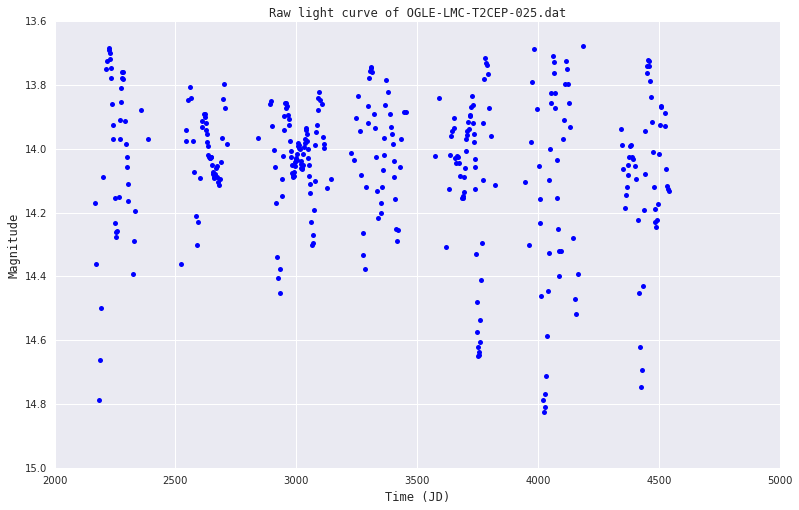

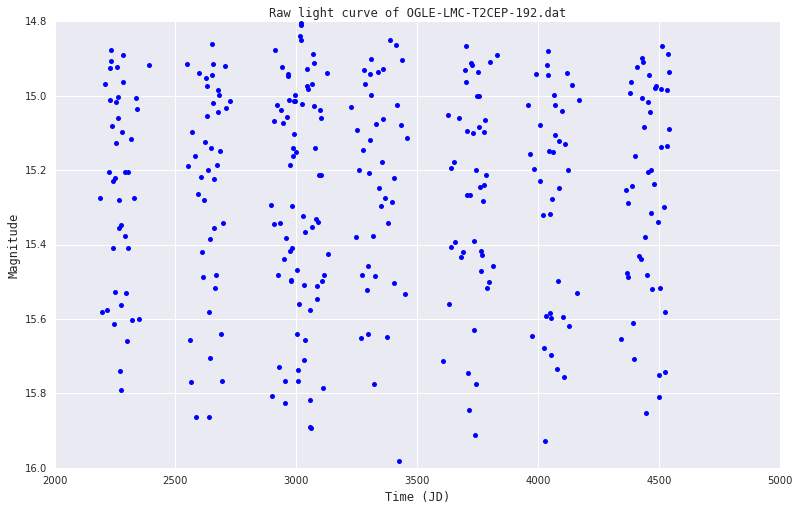

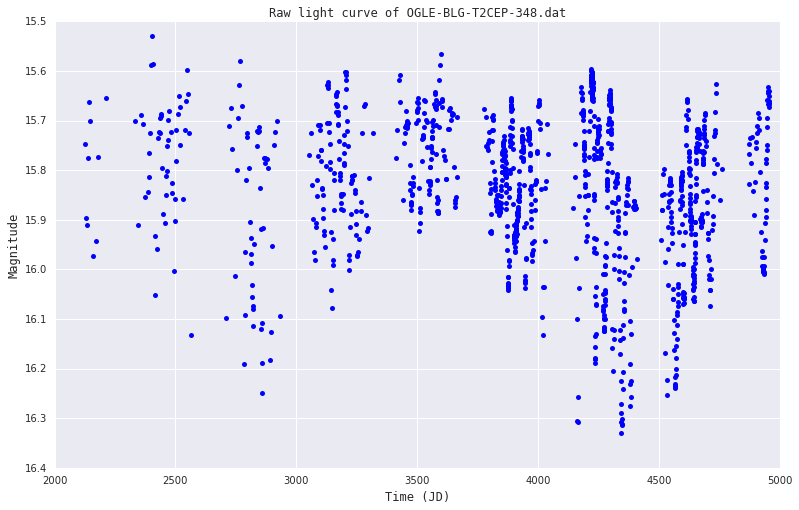

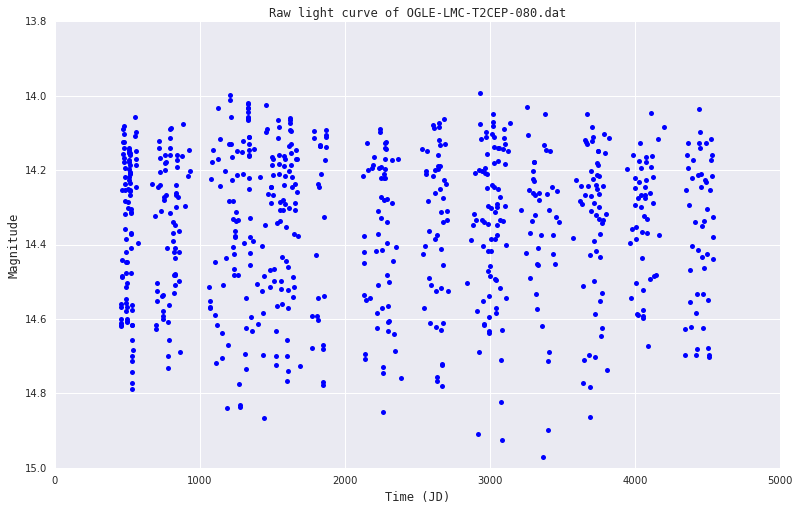

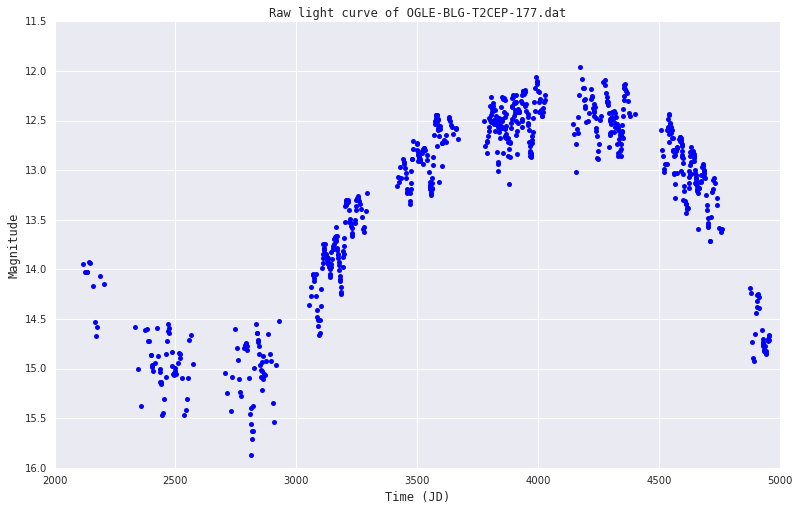

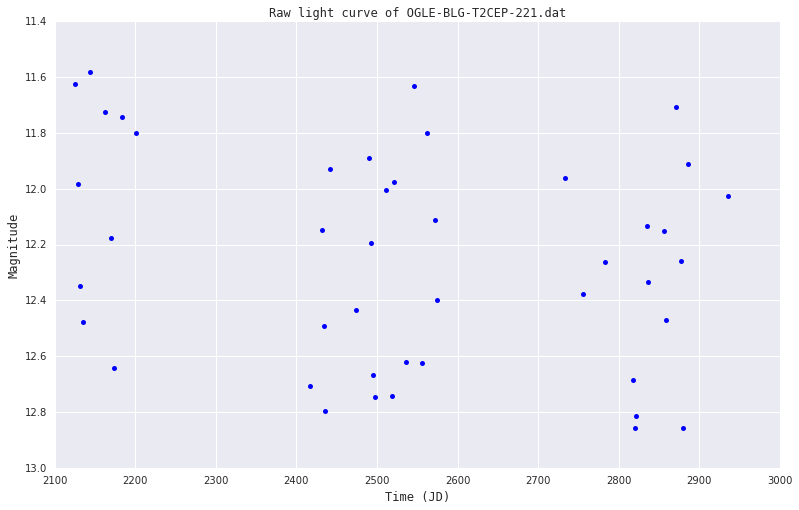

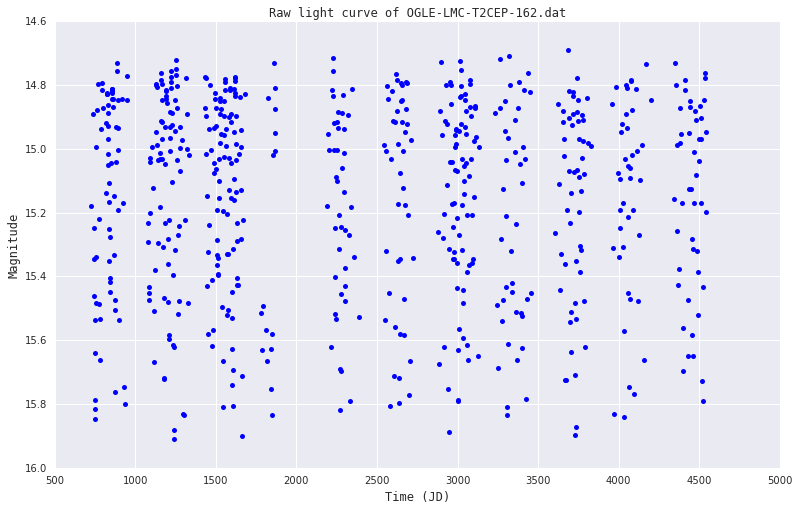

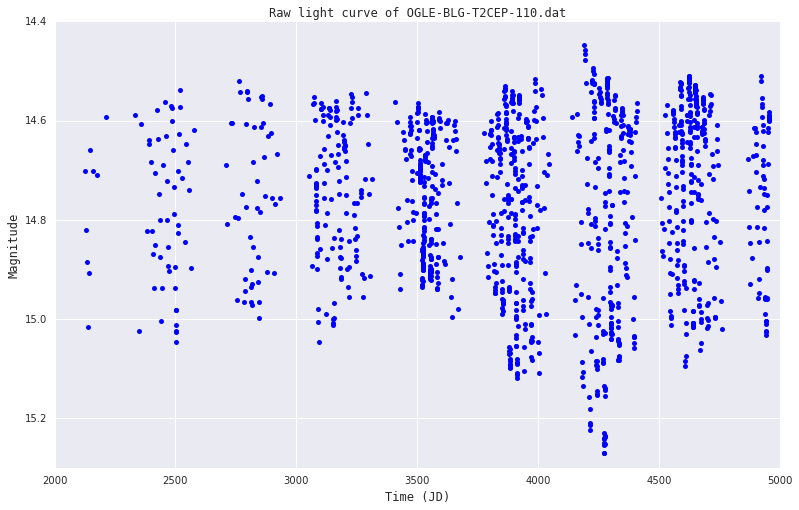

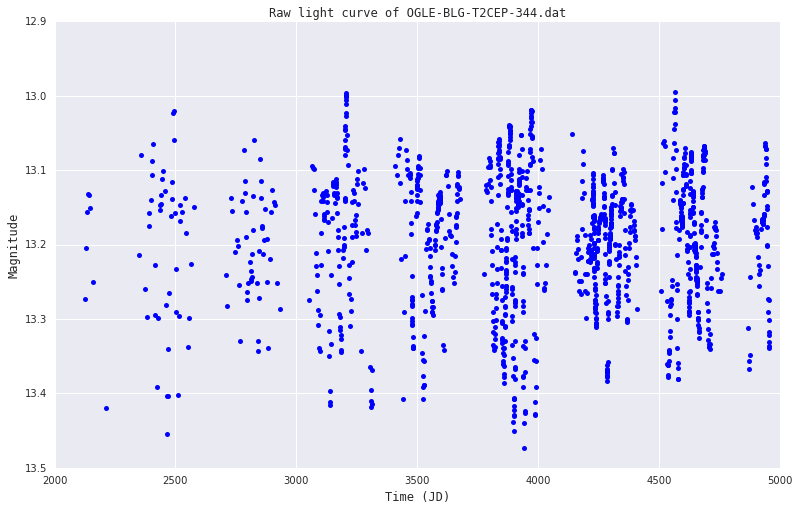

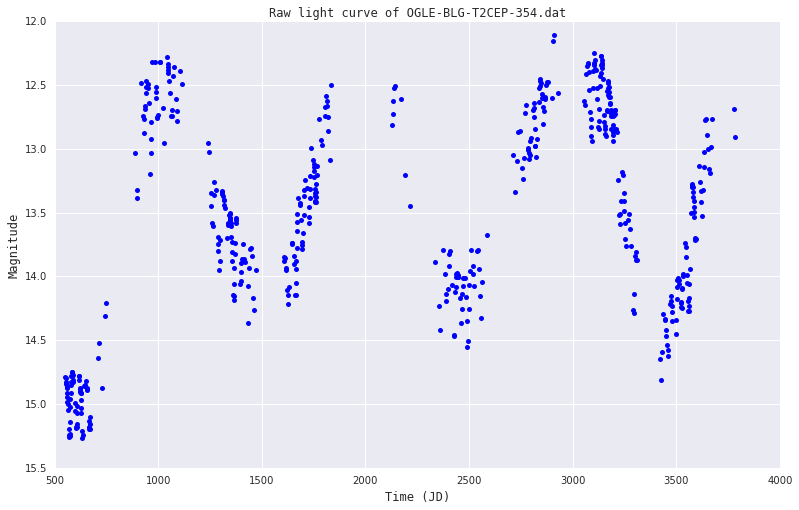

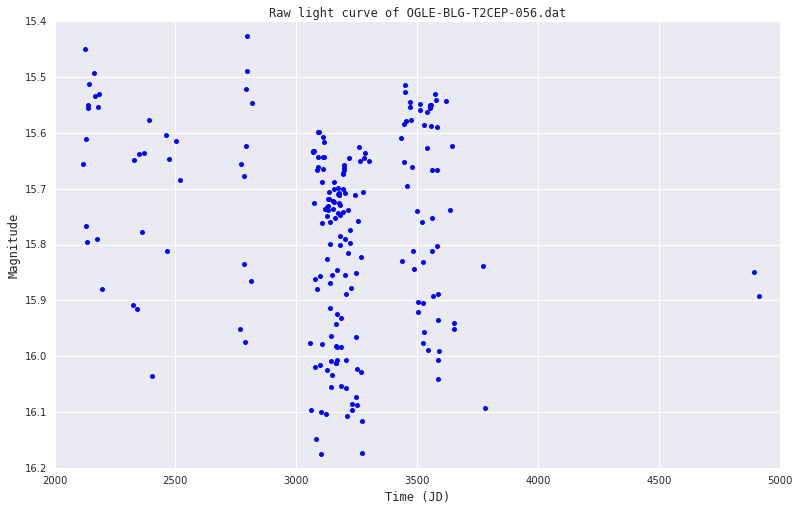

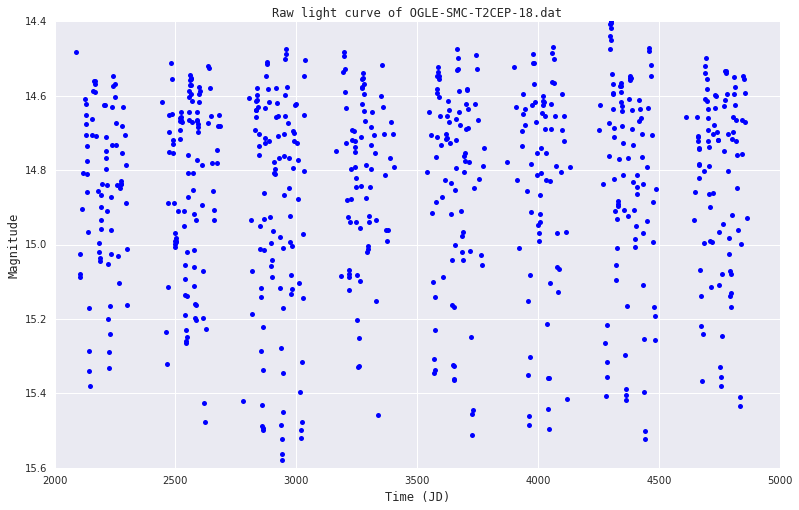

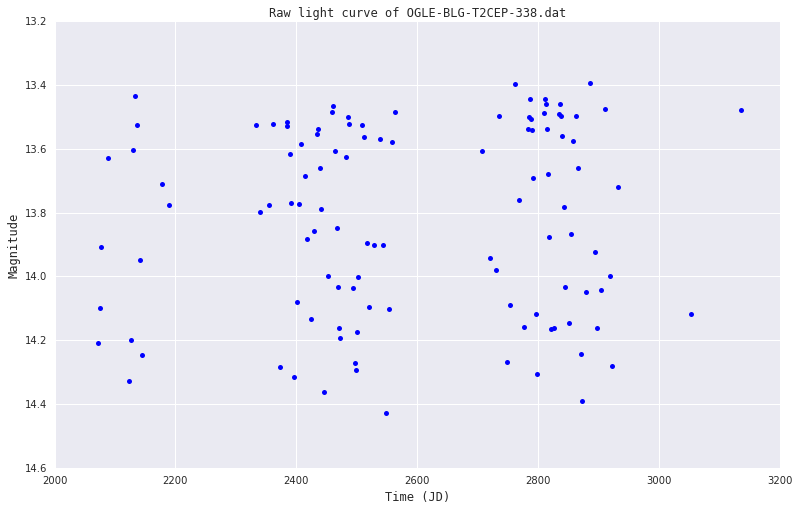

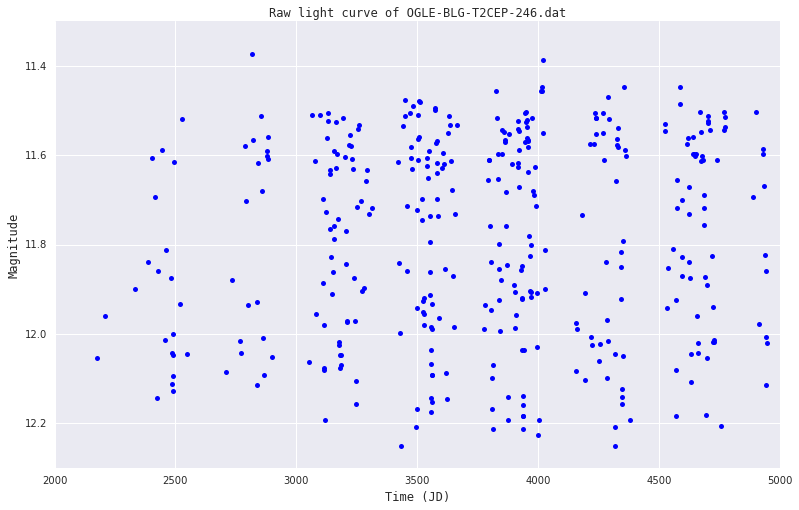

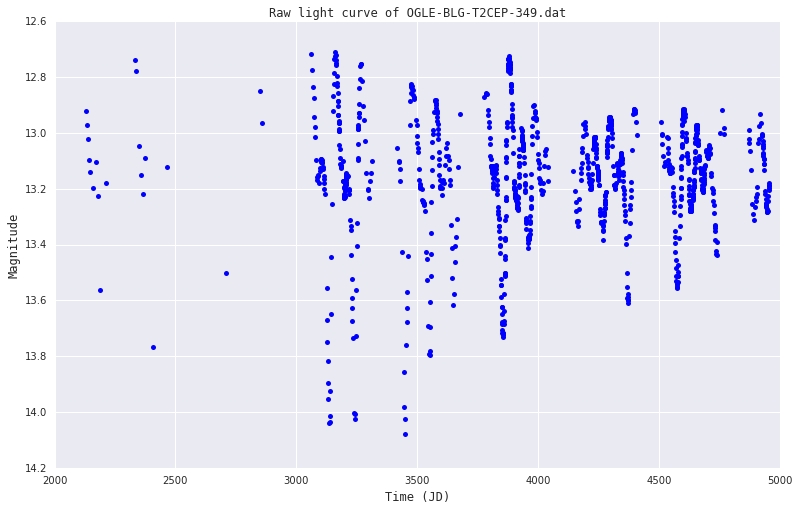

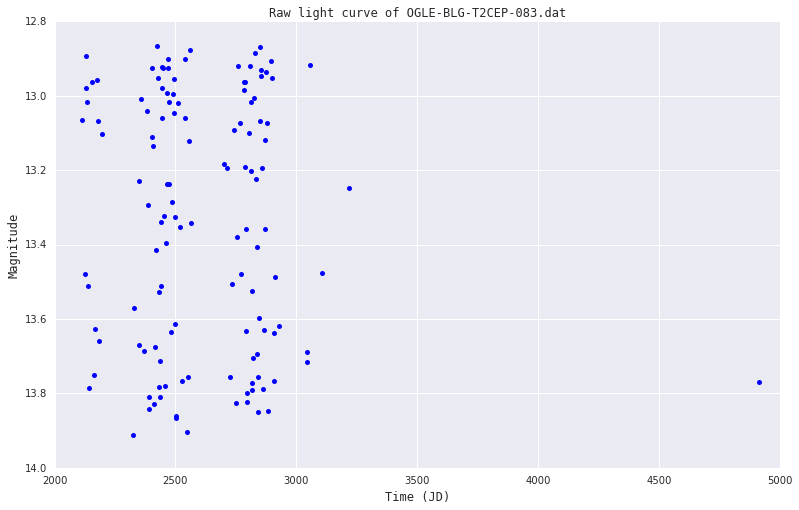

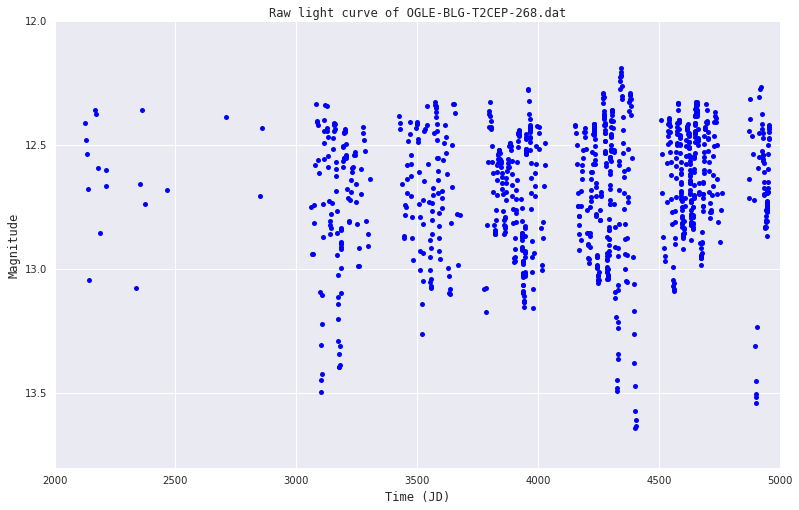

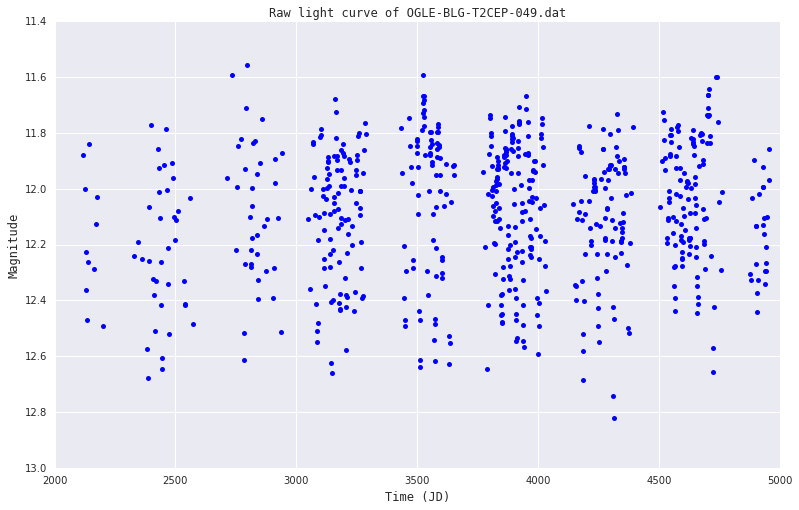

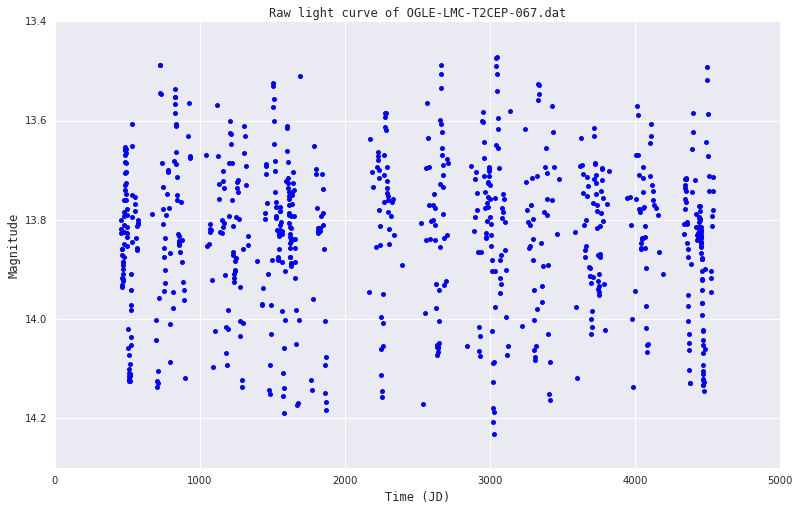

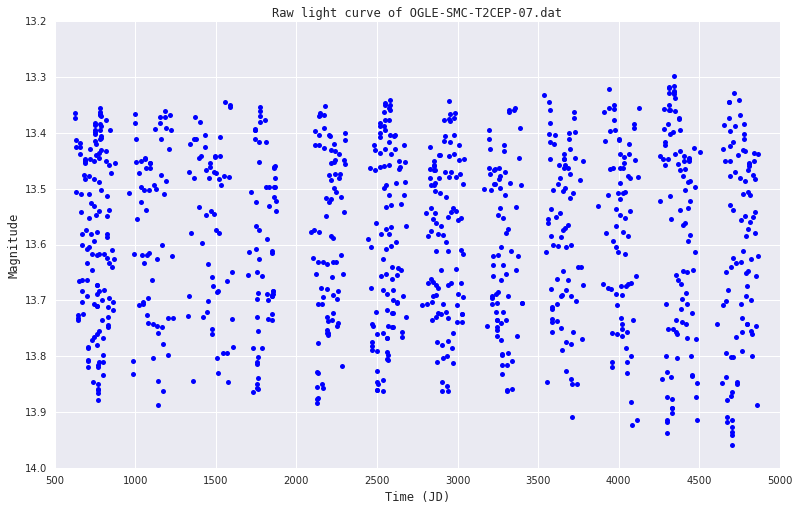

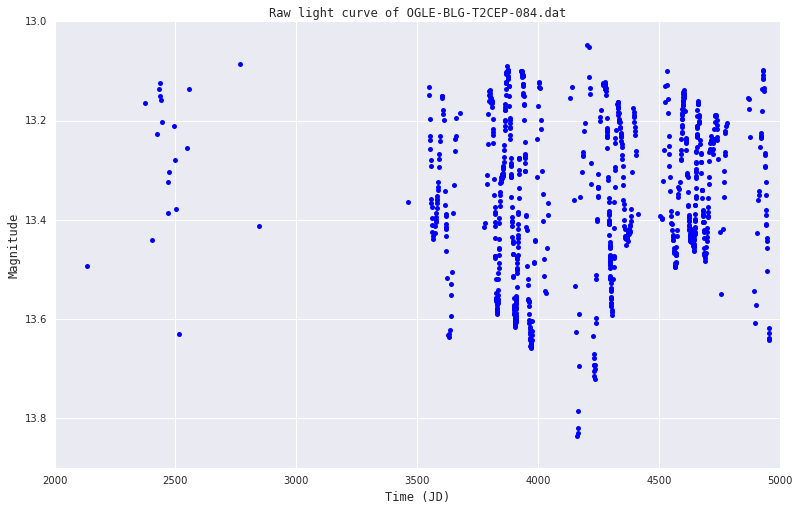

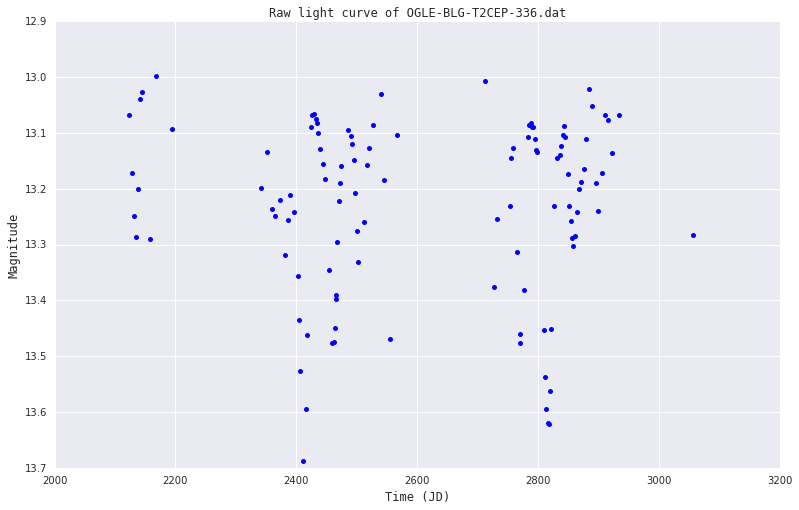

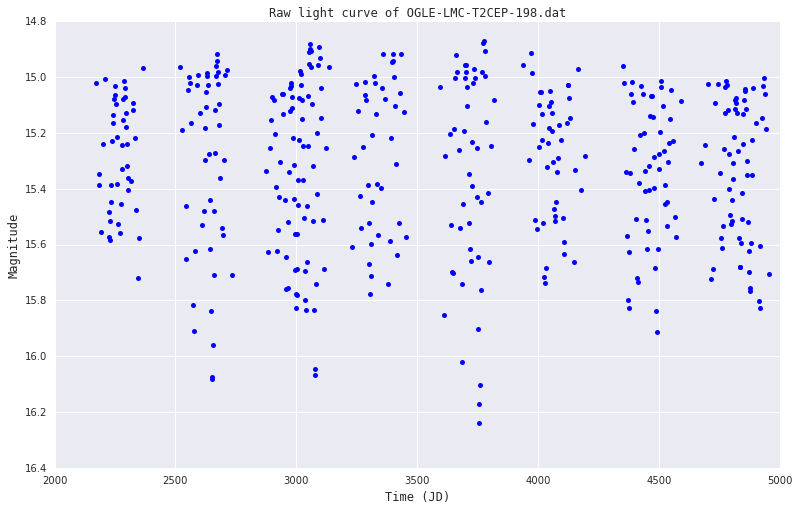

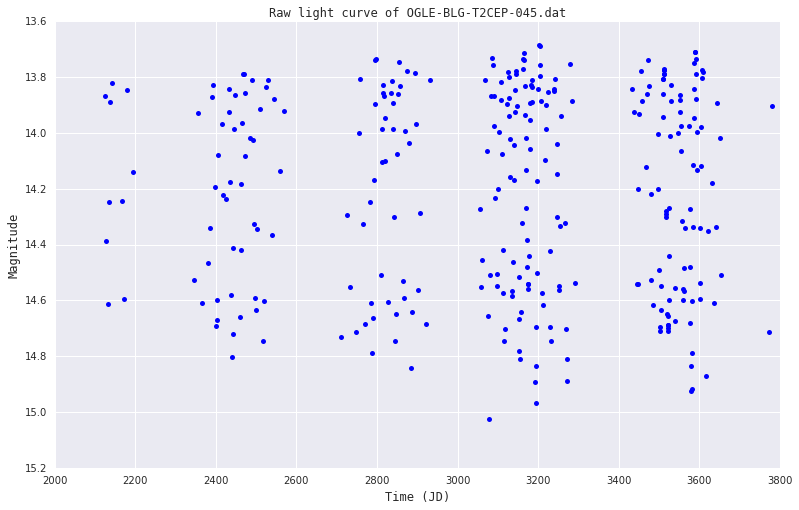

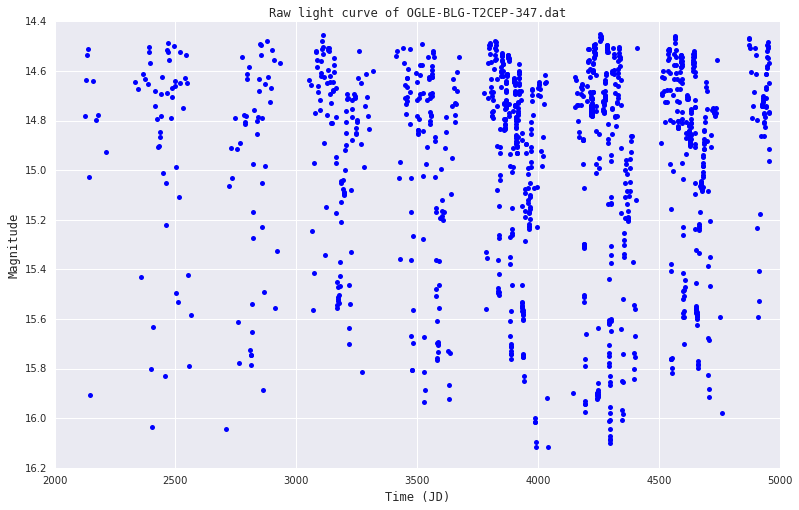

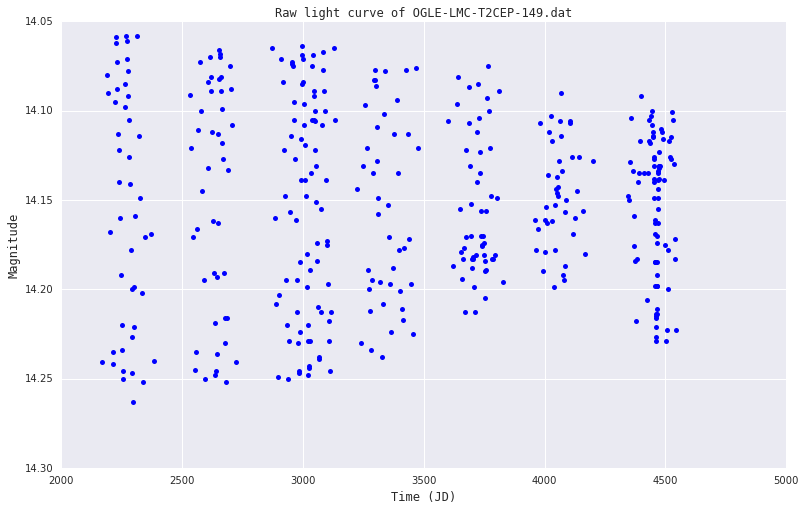

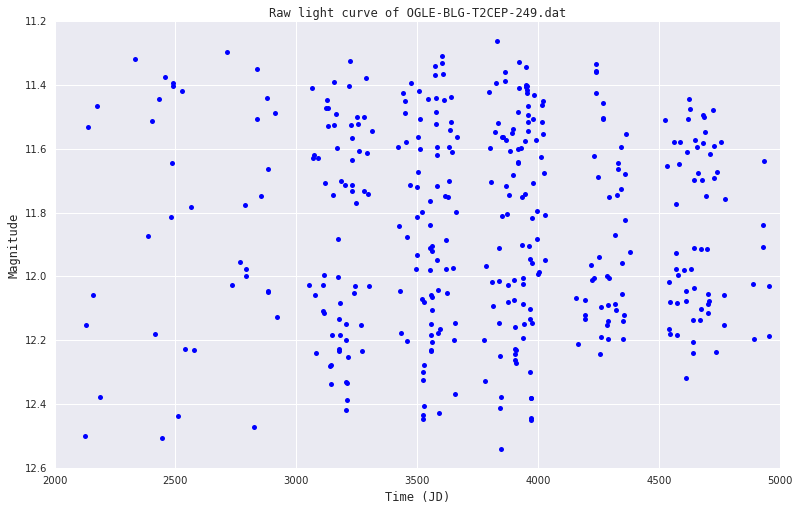

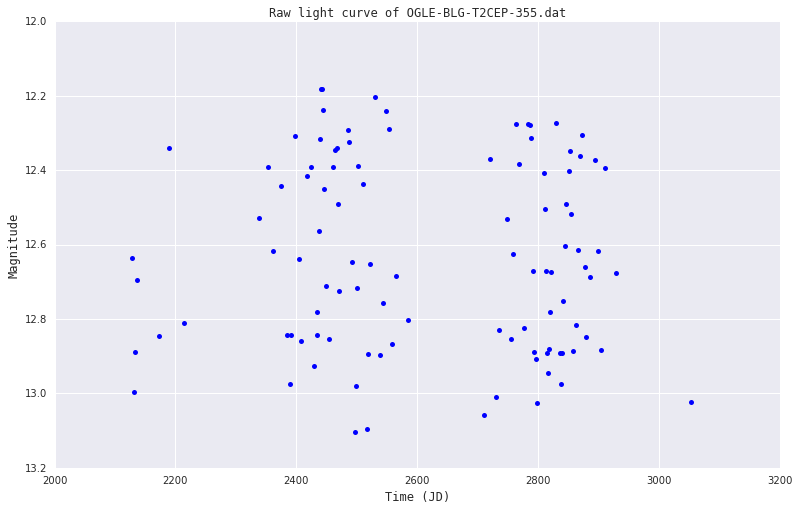

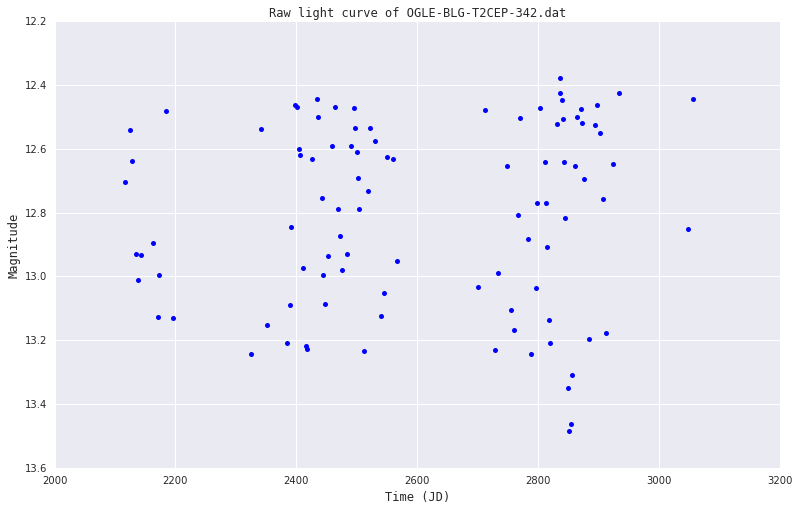

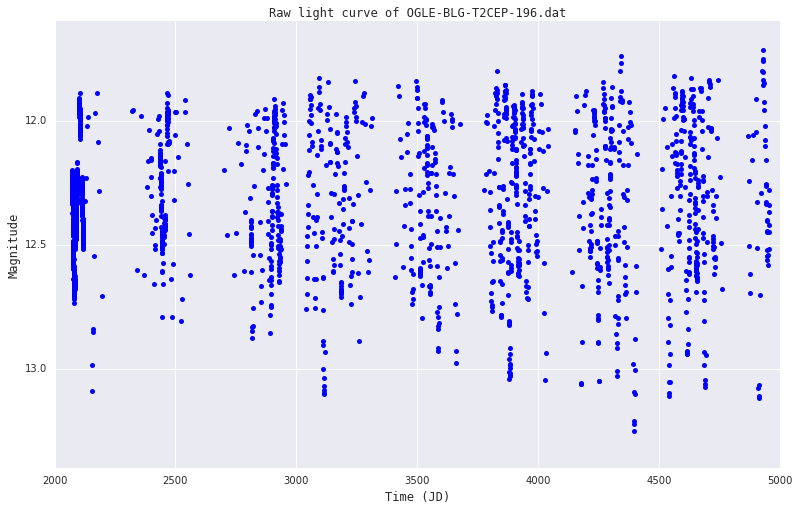

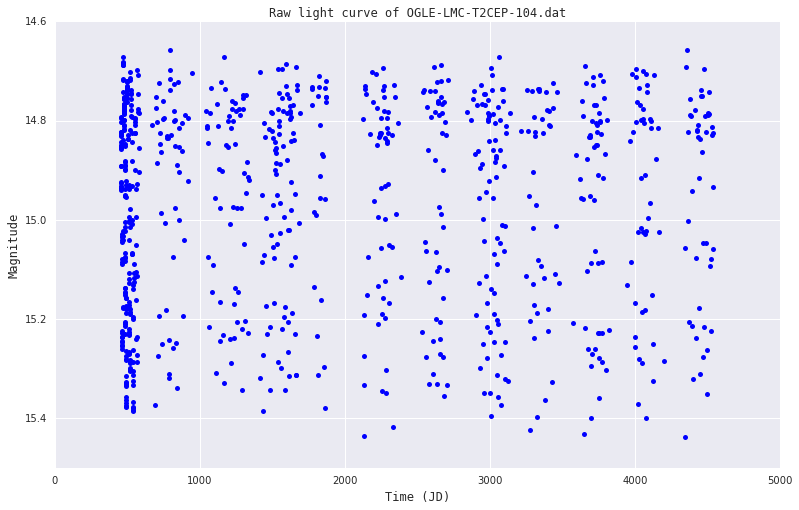

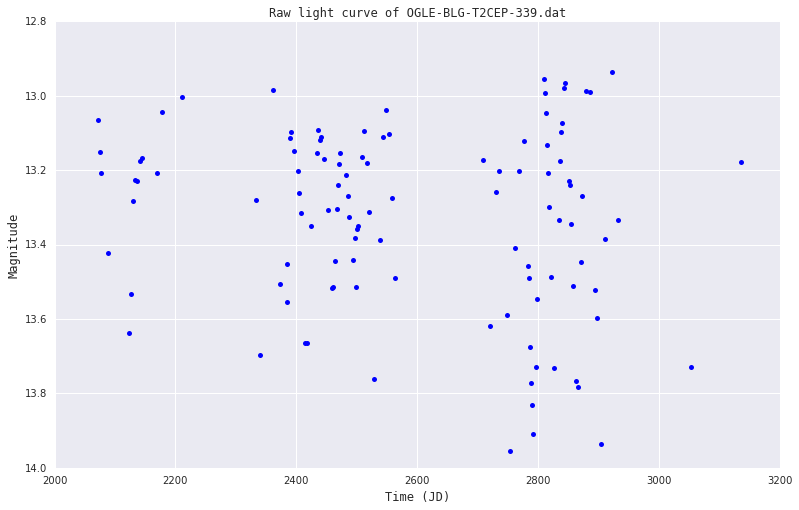

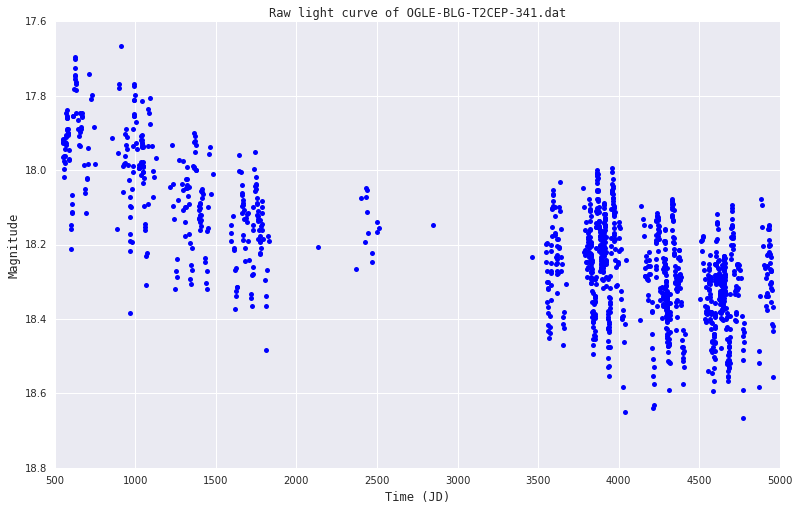

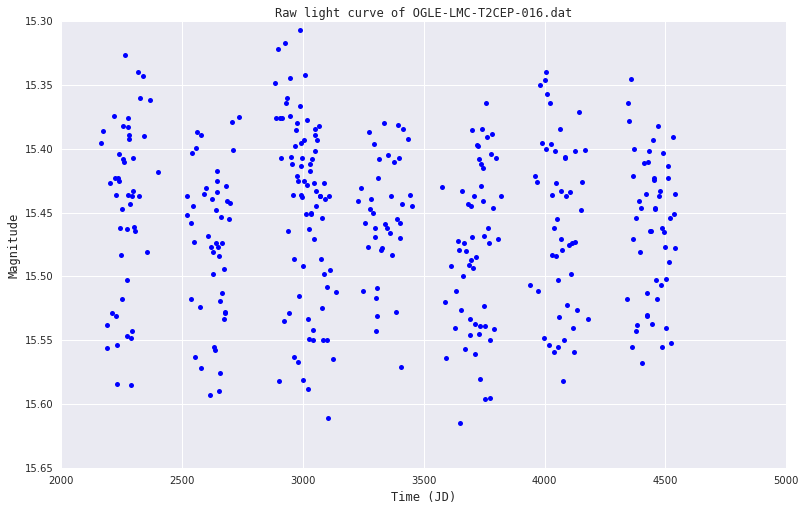

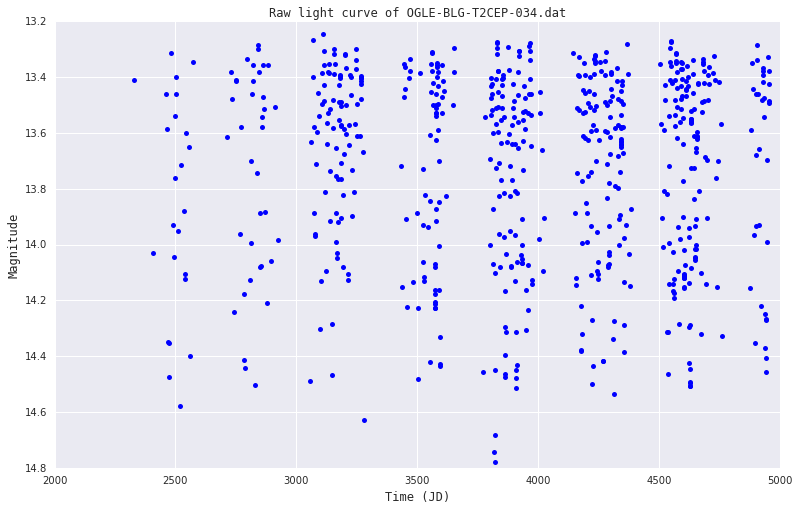

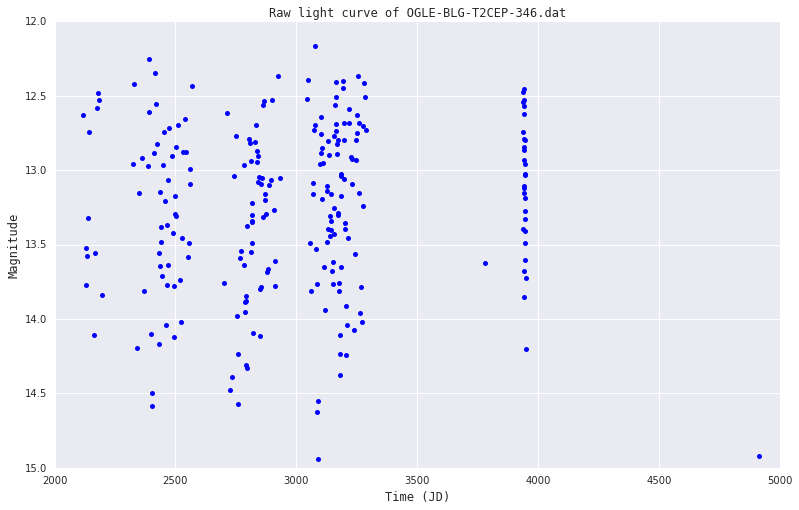

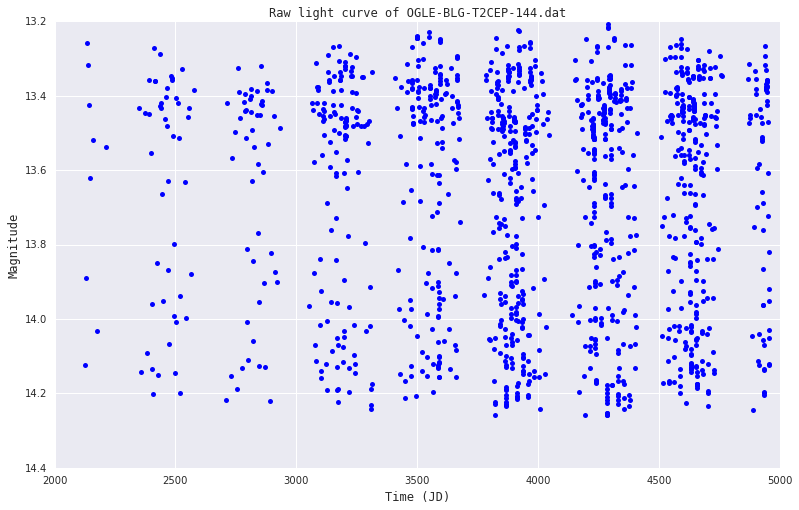

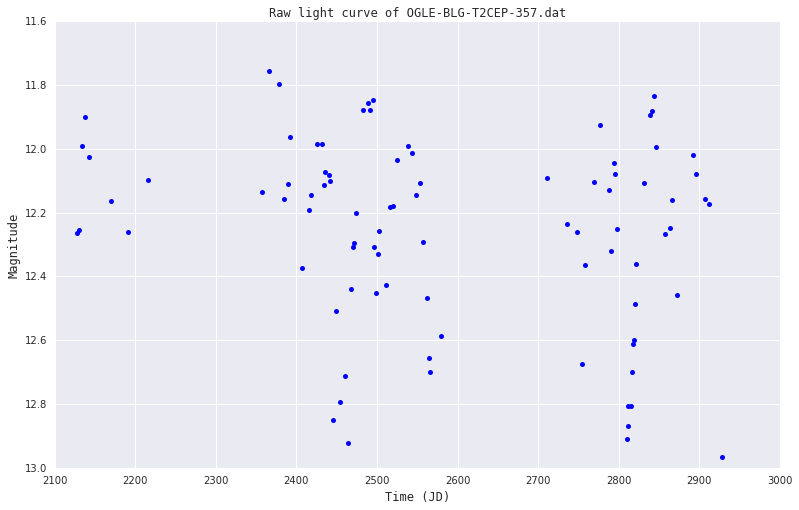

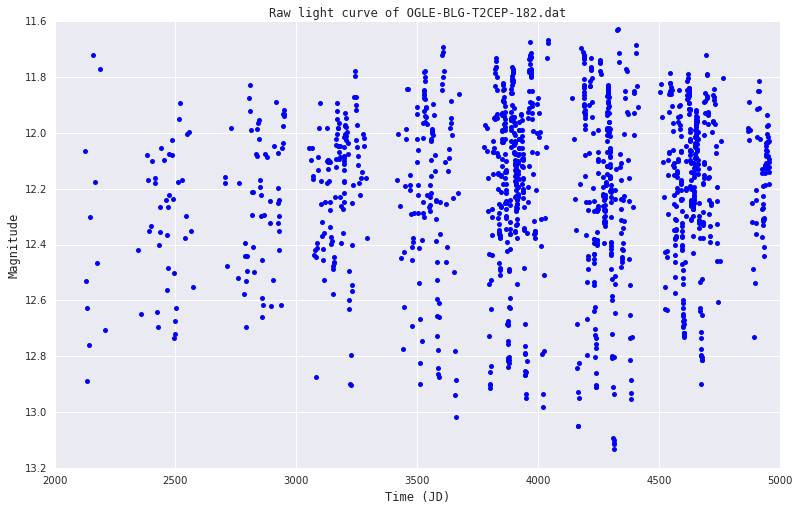

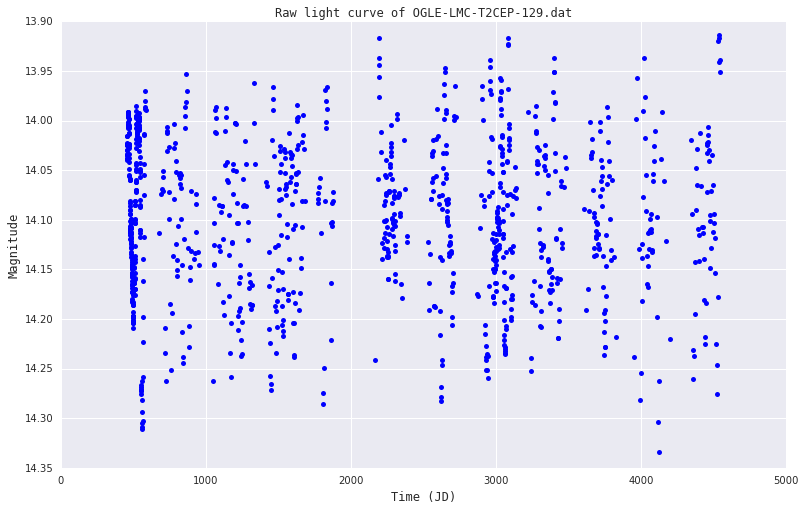

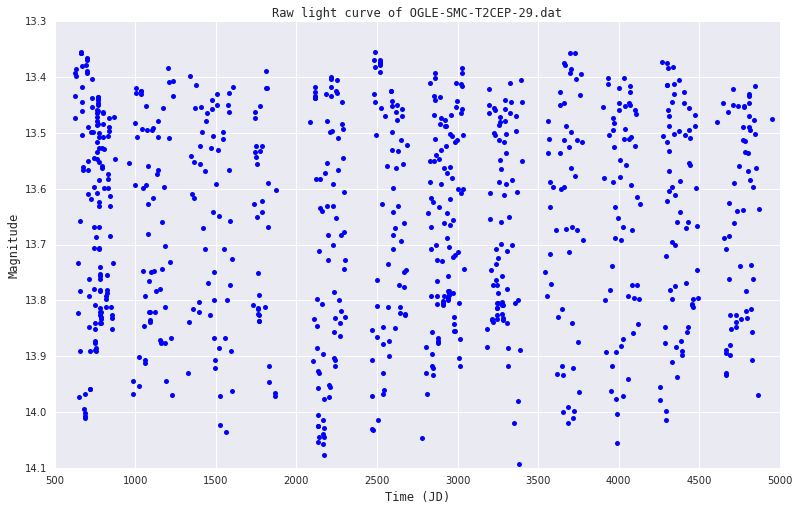

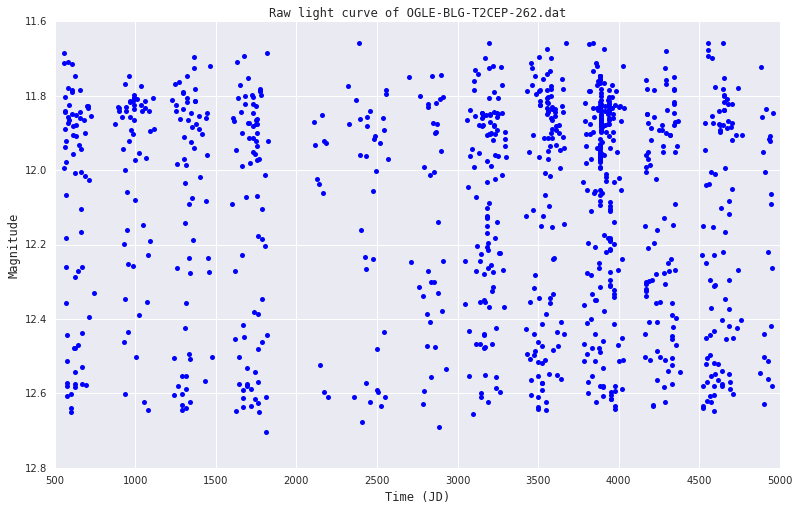

In [3]:
# Make folder ramed 'raw' and store raw data here
try:
    os.mkdir('raw_rvb')
except:
    pass

# Read lightcurves from disk
light_curves = pickle.load(open("light_curves_rvb.p", "rb"))

# Plot the raw data.
for (star, (time, mag, err)) in light_curves:
    plt.figure(figsize=(13,8))
    plt.plot(time, mag, marker='o', ls='None', ms=5, c='b')
    plt.gca().invert_yaxis()
    plt.xlabel("Time (JD)", size='medium', family = 'monospace')
    plt.ylabel("Magnitude", size='medium', family = 'monospace')
    plt.title("Raw light curve of " +star, size='medium', family = 'monospace')
    plt.savefig('raw_rvb/'+star+'_raw.png')
    plt.show()
    plt.close()

### Lomb-Scargle Periodogram and Phase Plots

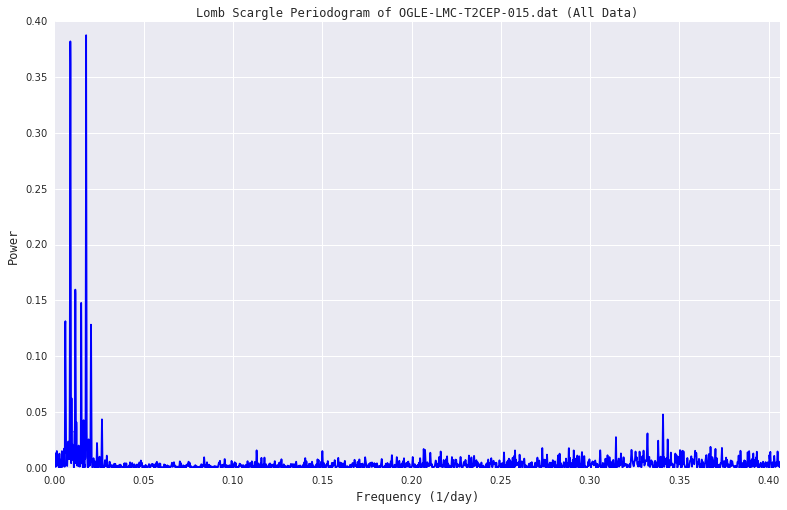

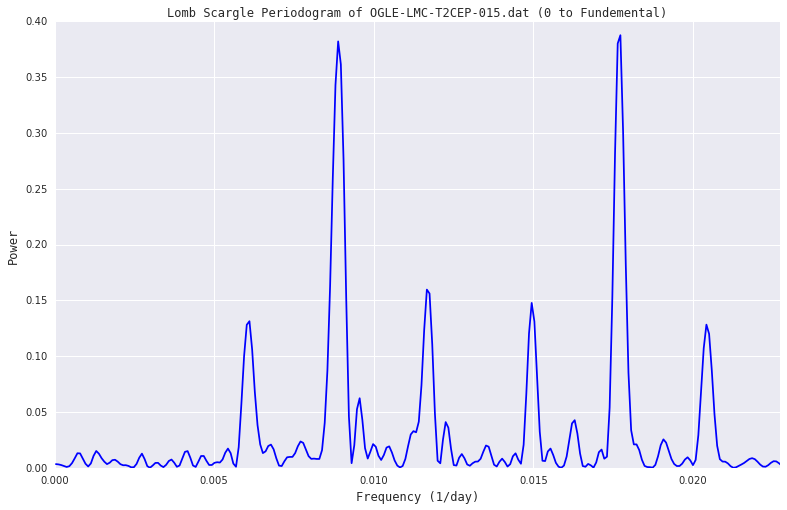

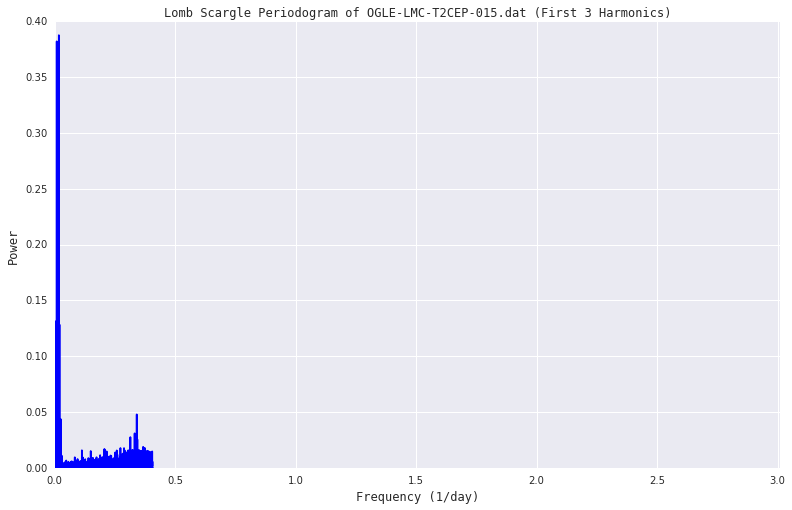

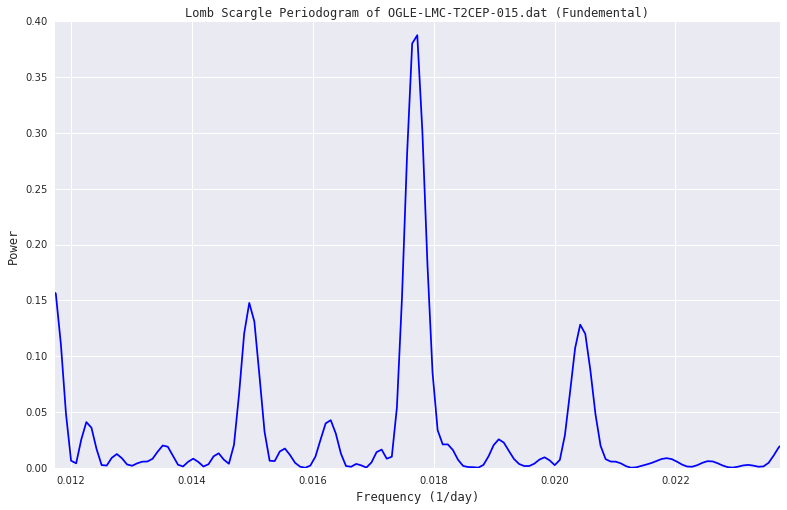

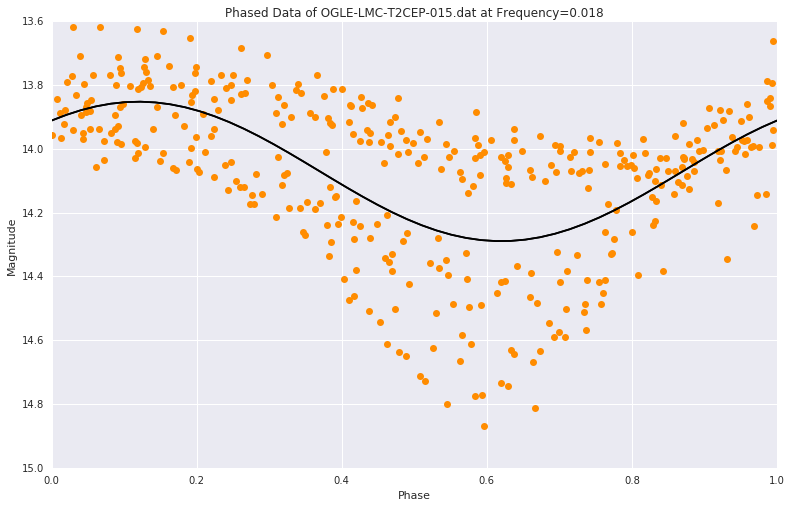

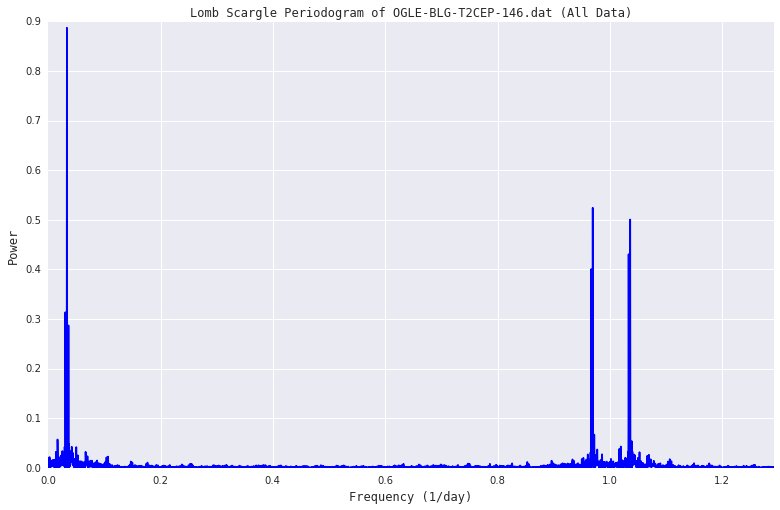

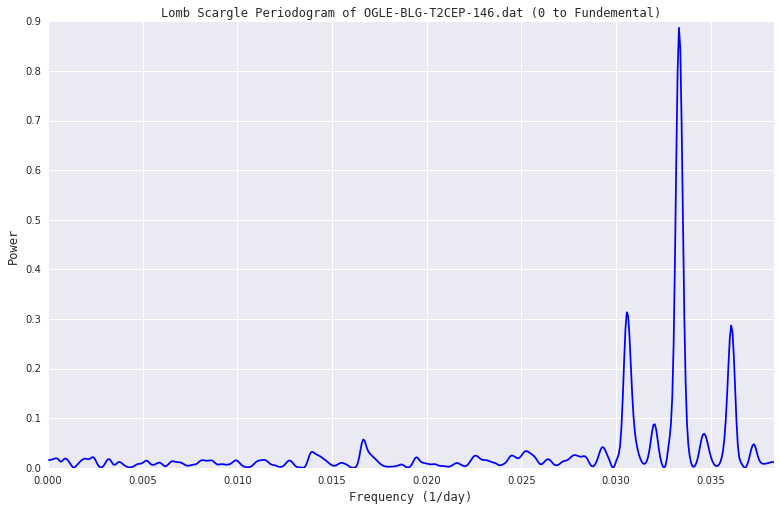

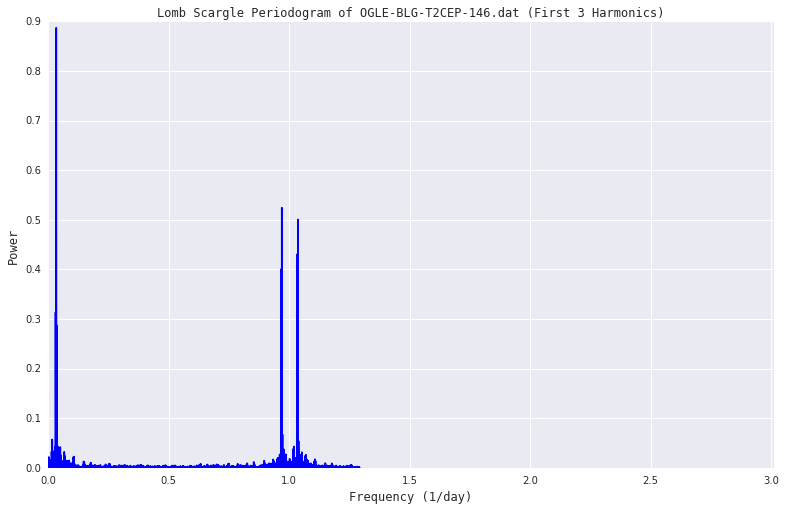

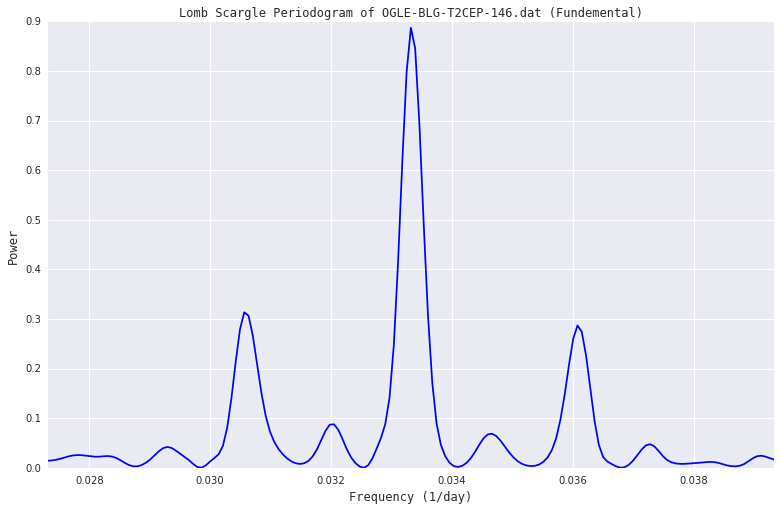

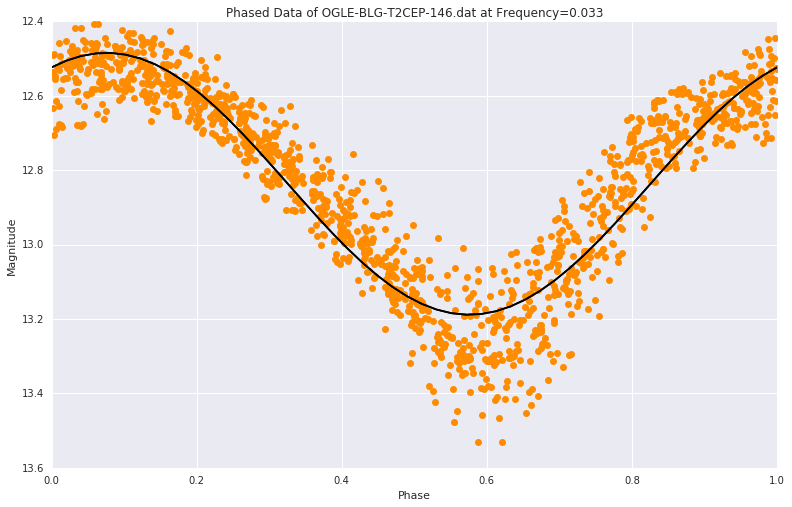

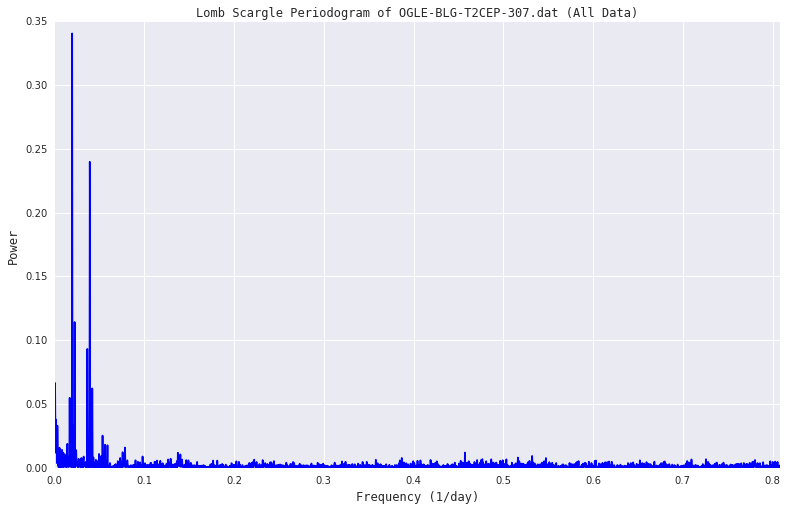

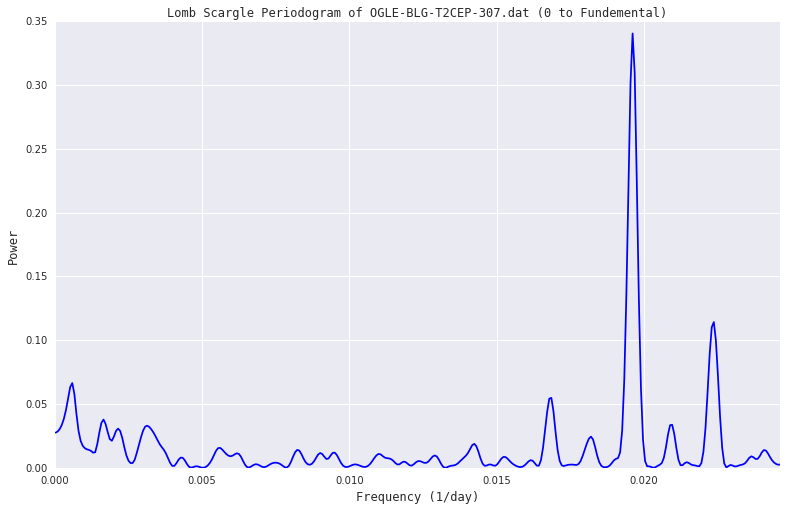

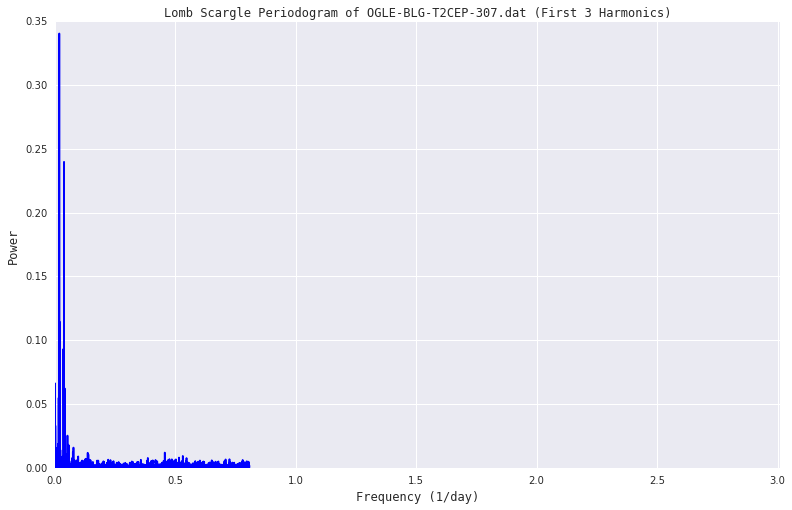

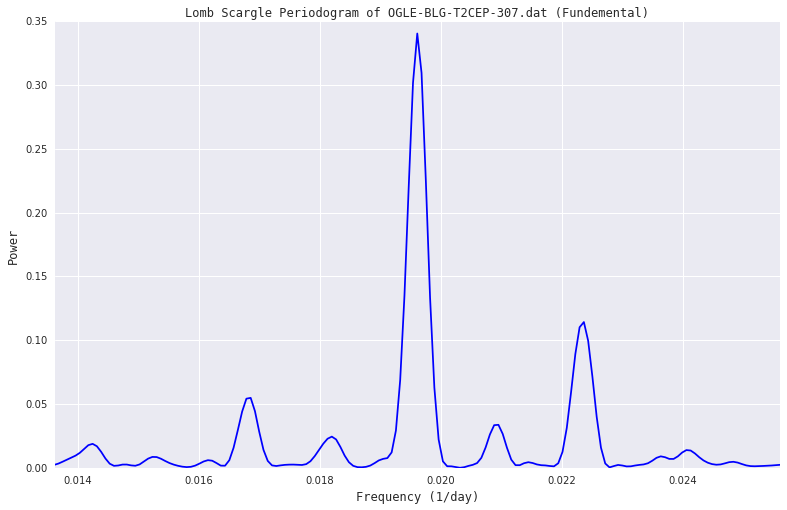

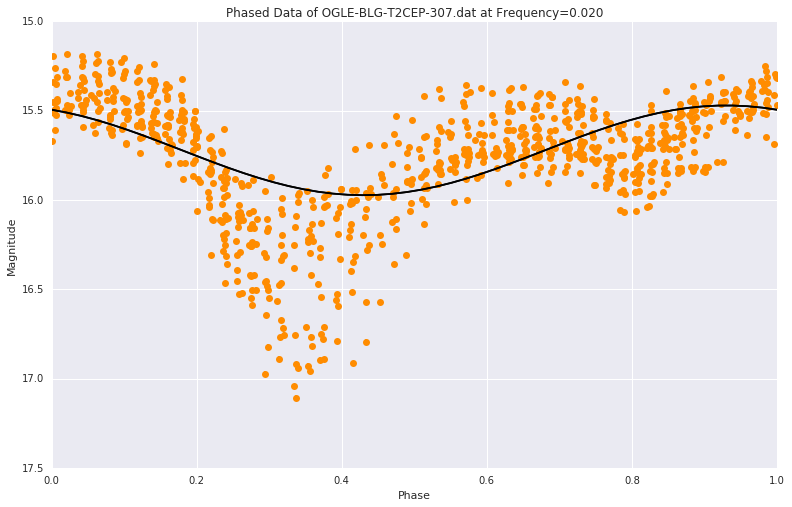

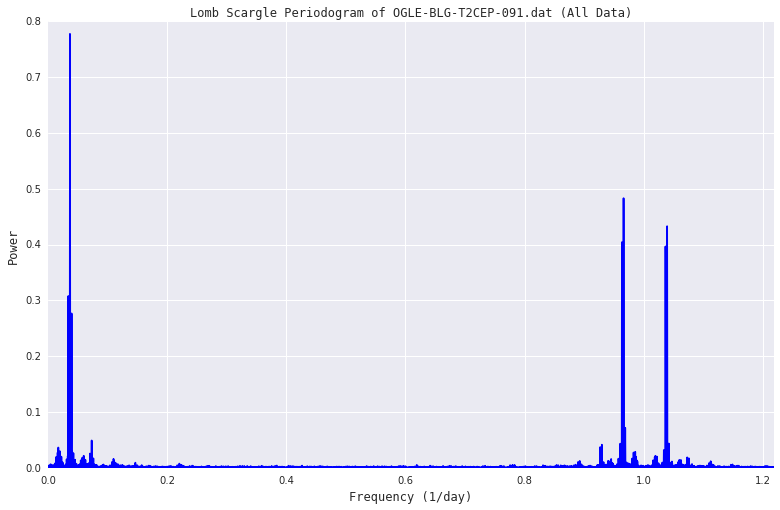

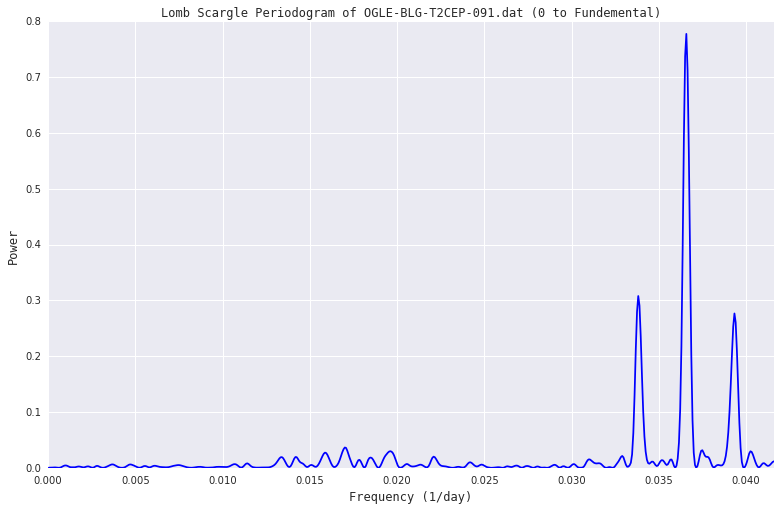

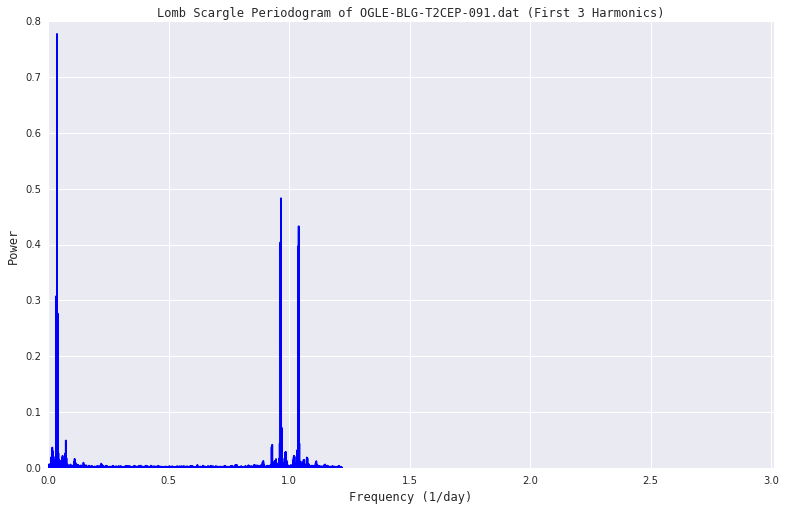

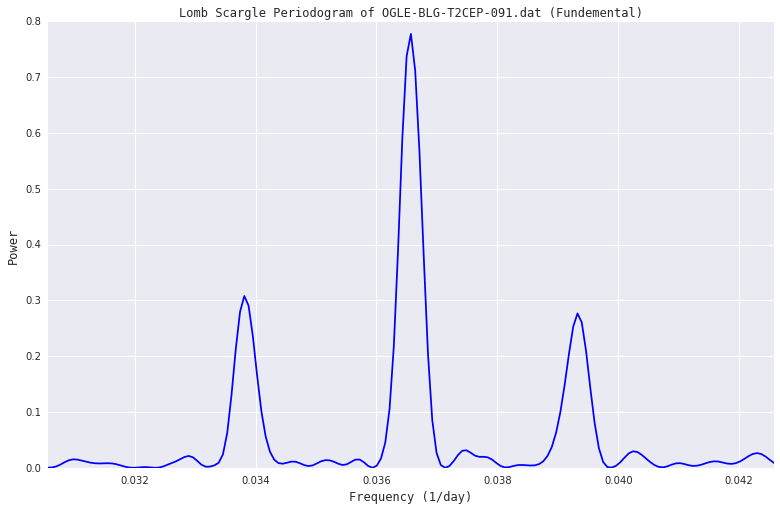

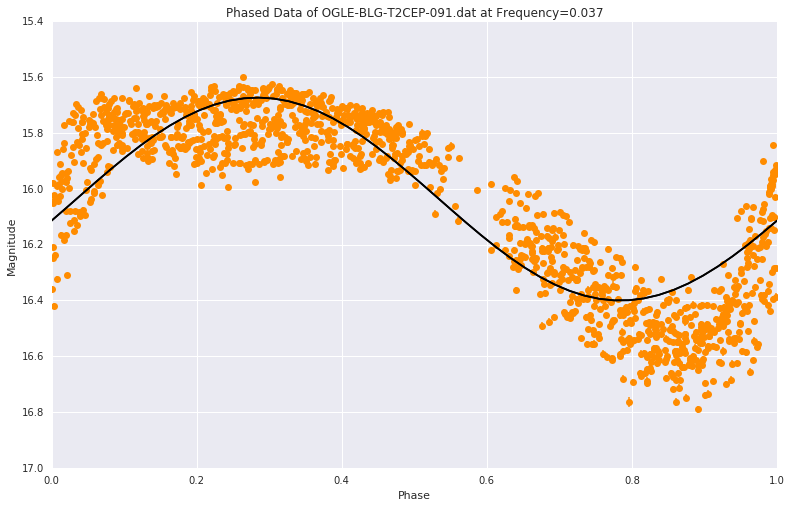

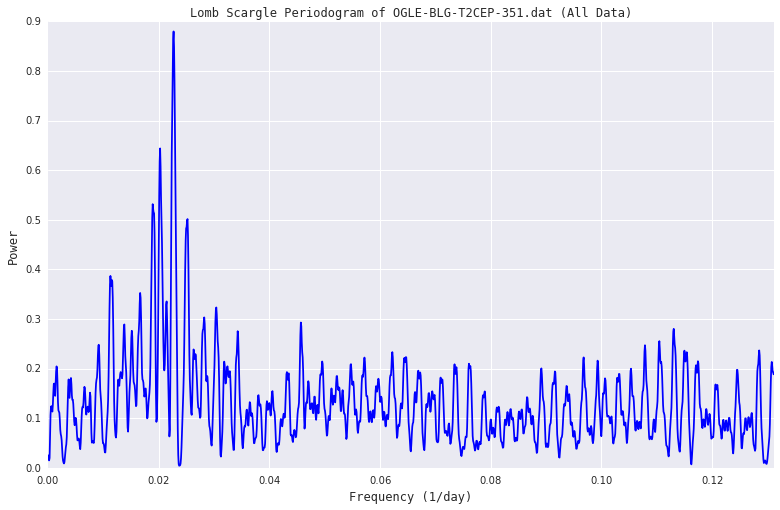

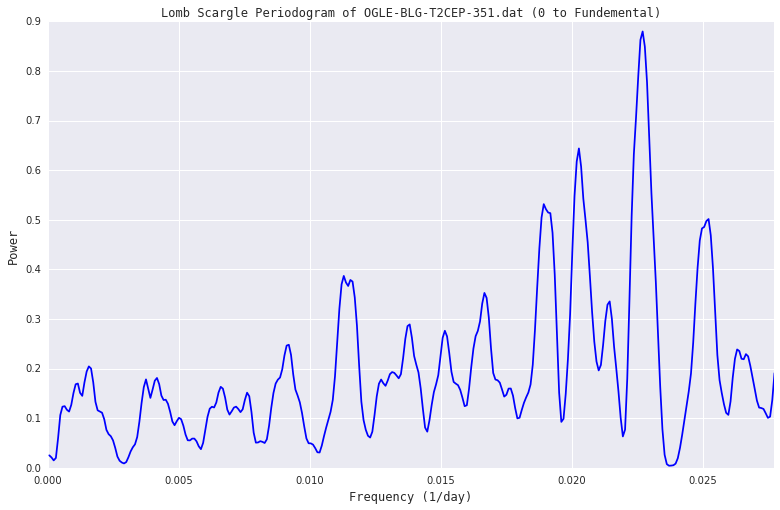

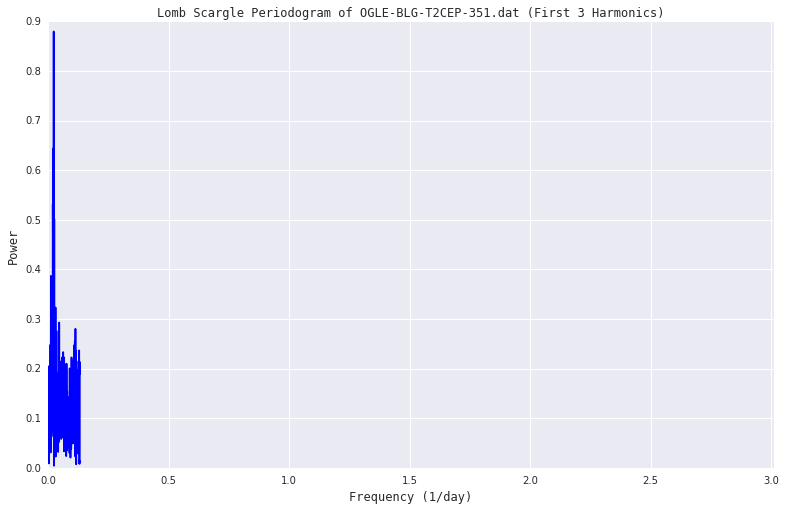

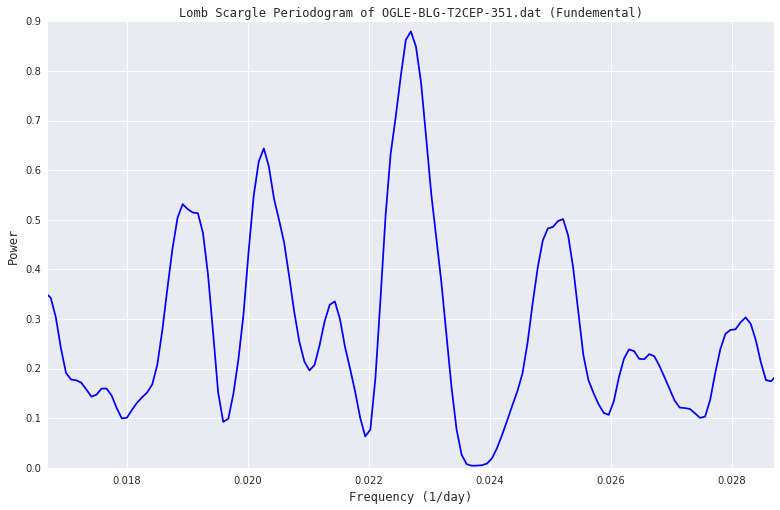

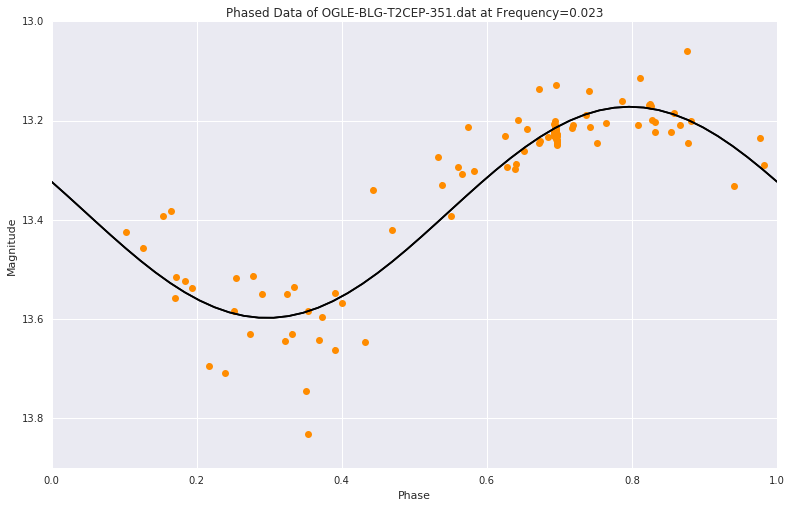

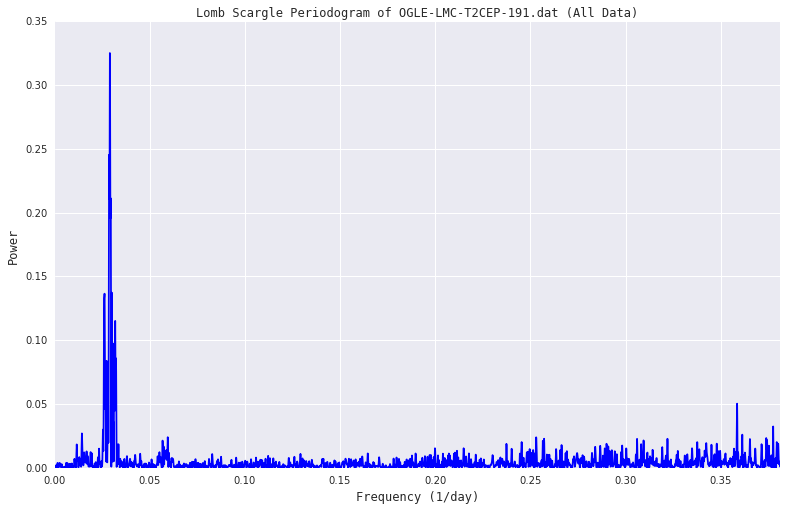

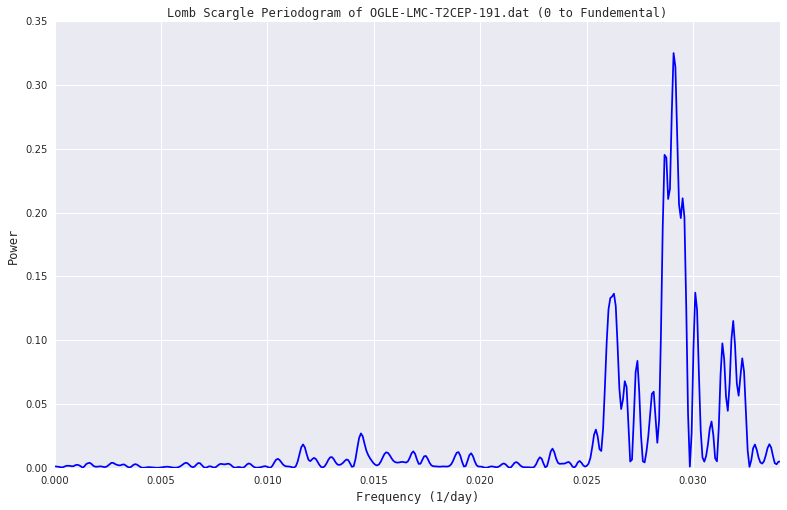

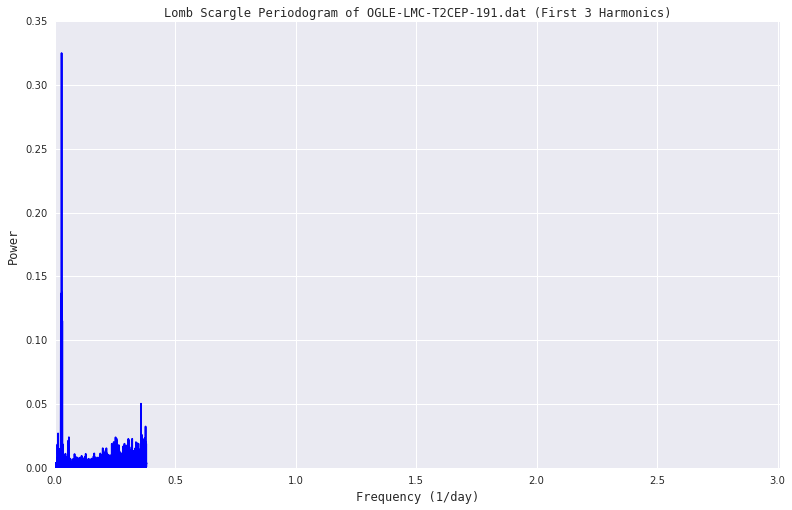

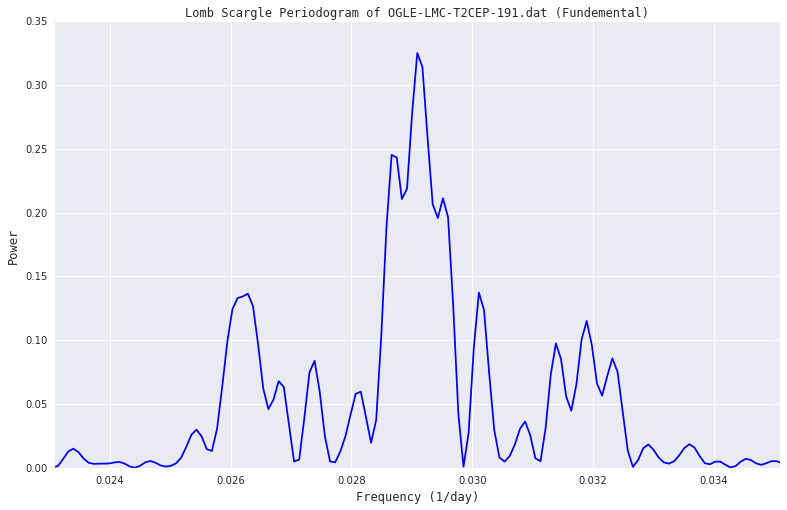

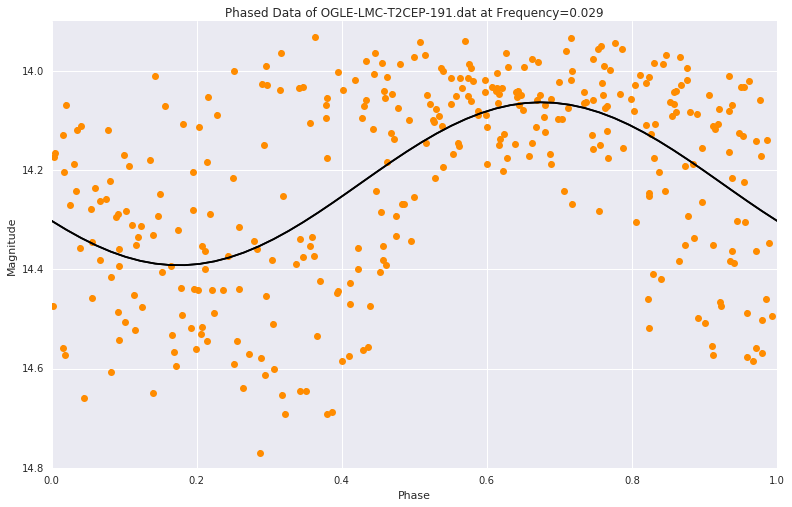

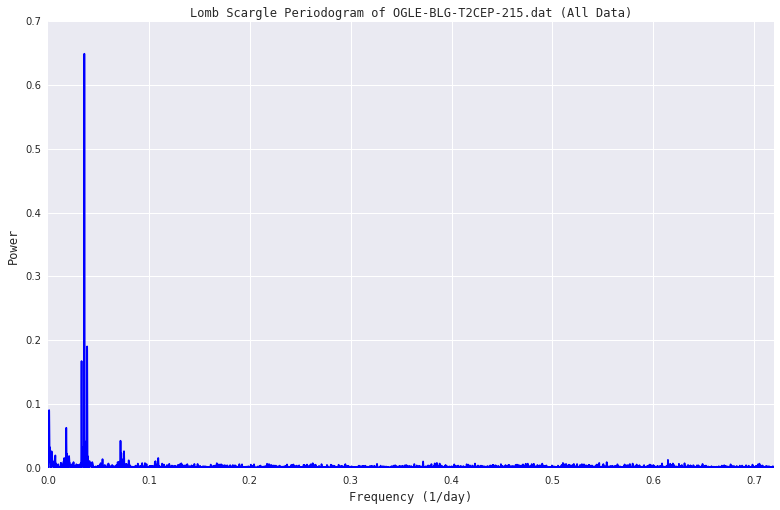

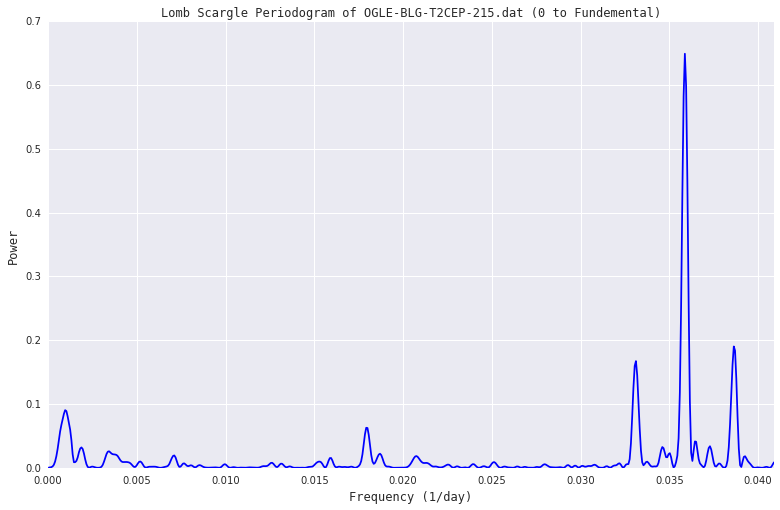

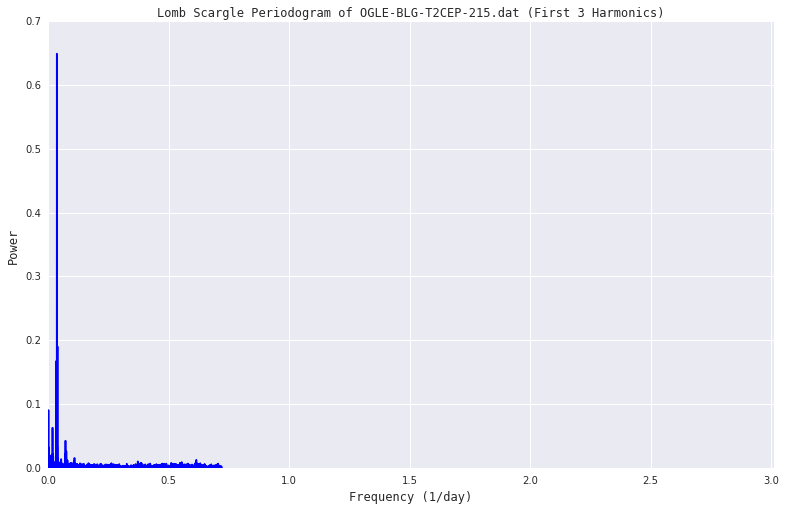

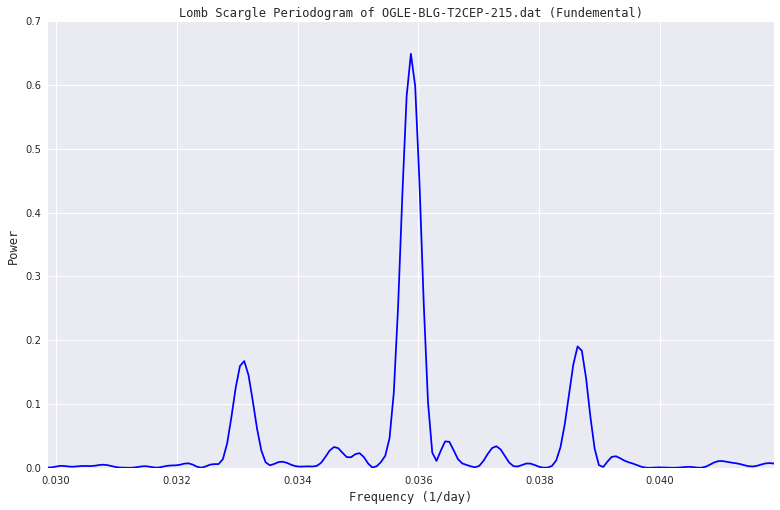

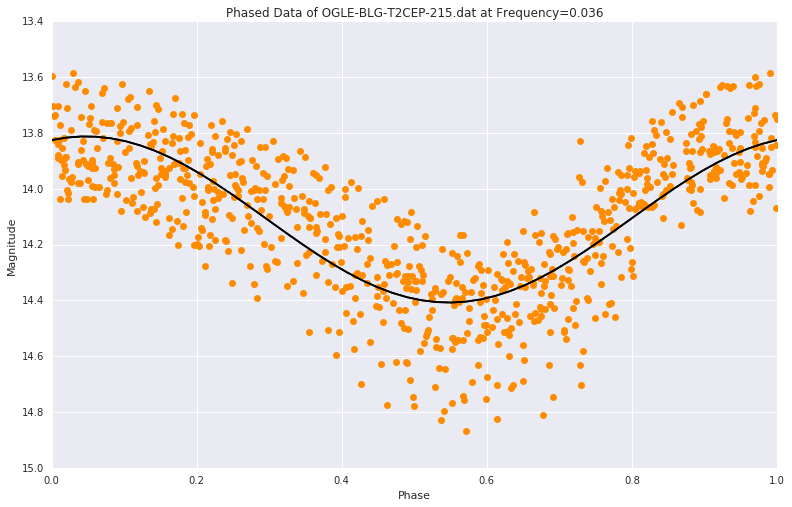

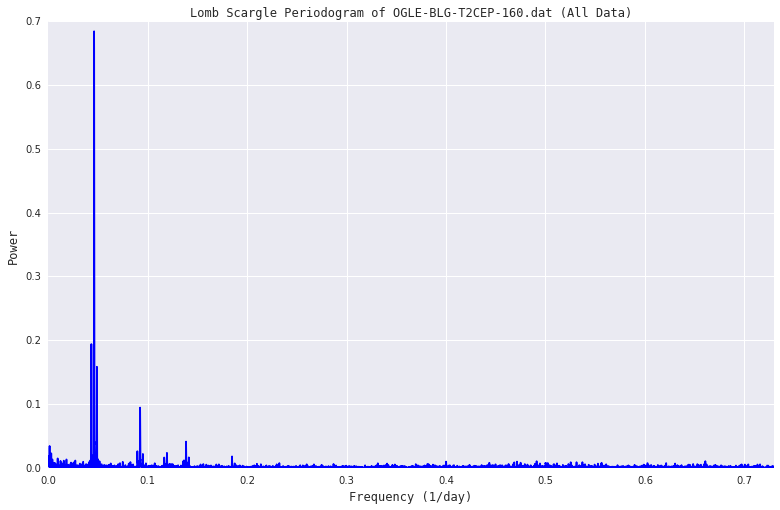

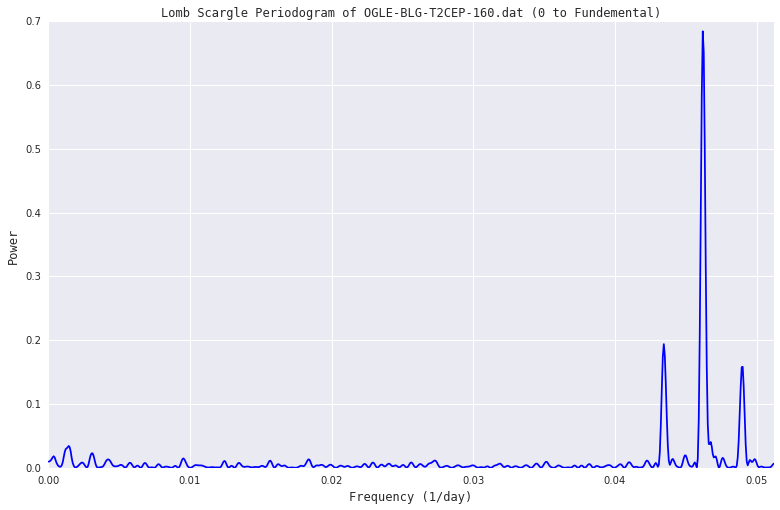

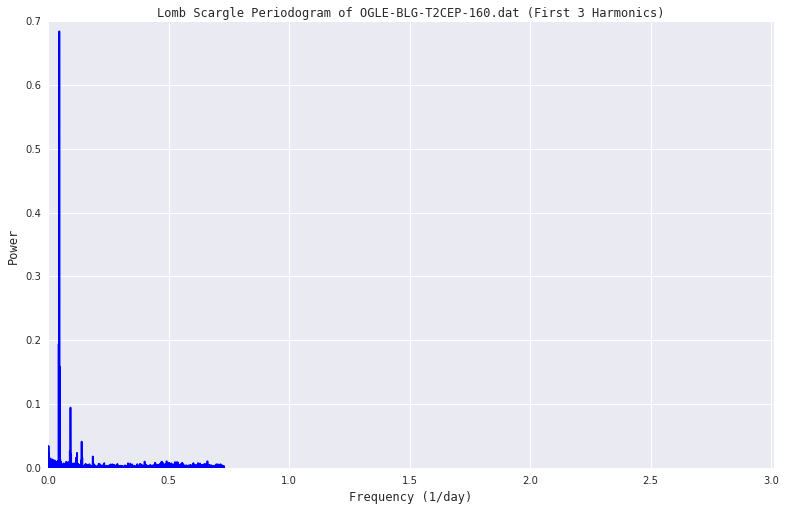

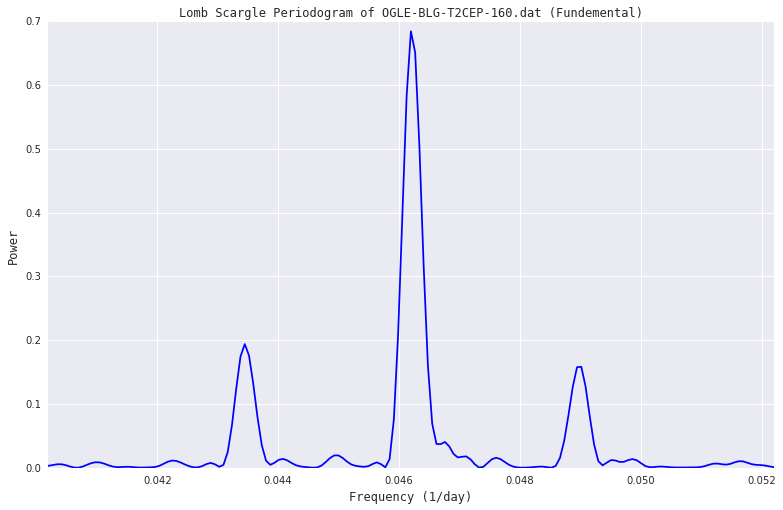

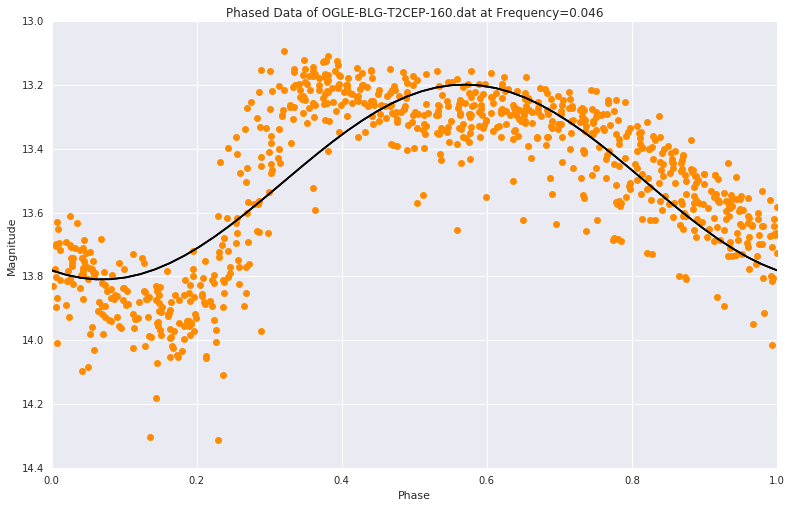

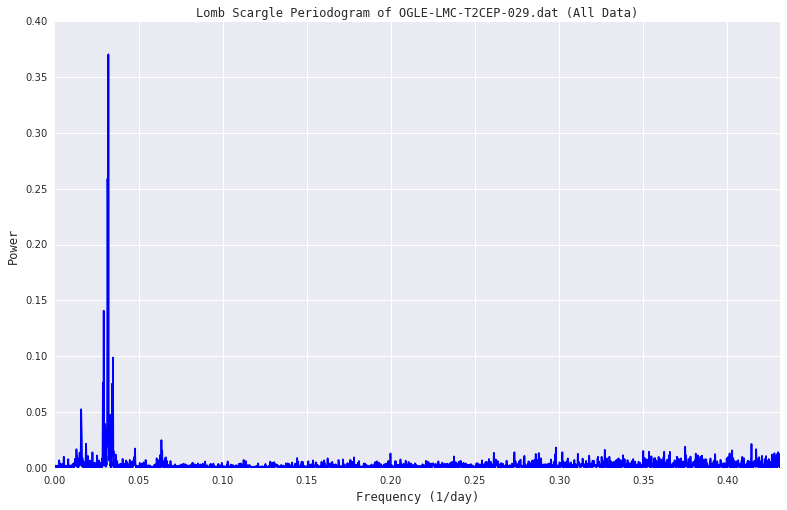

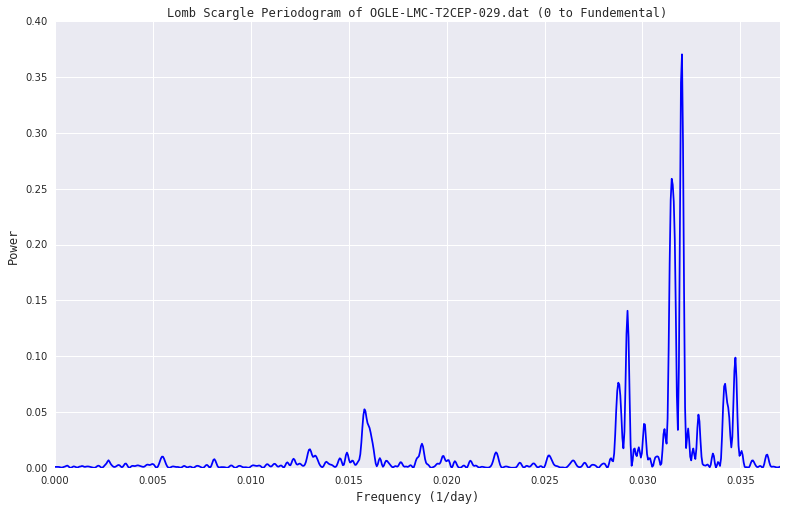

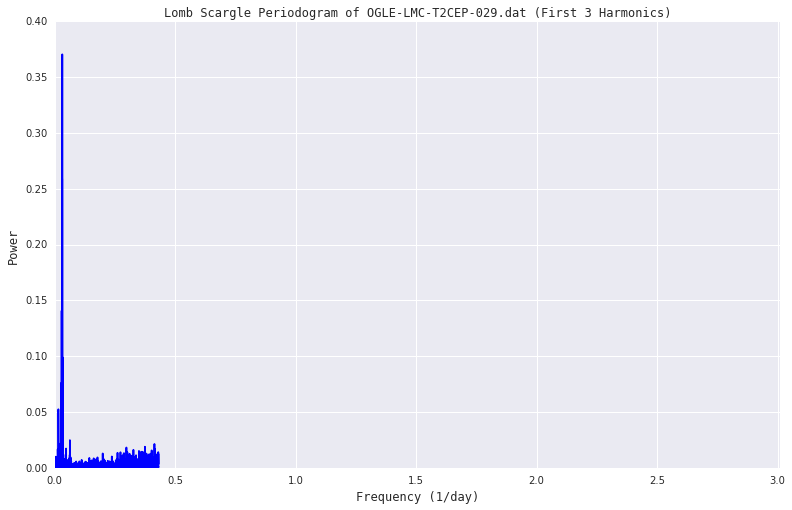

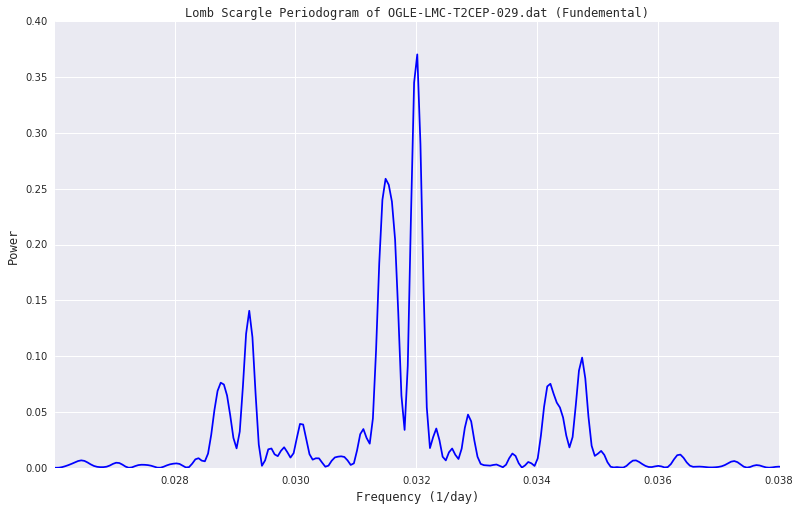

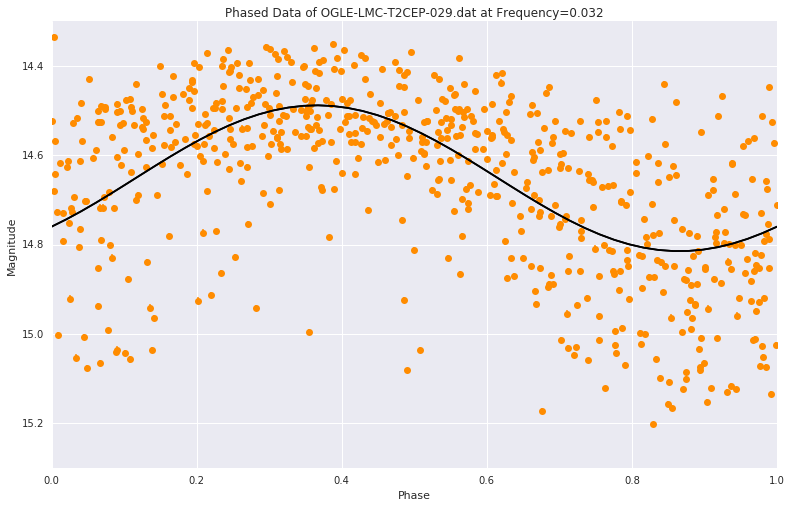

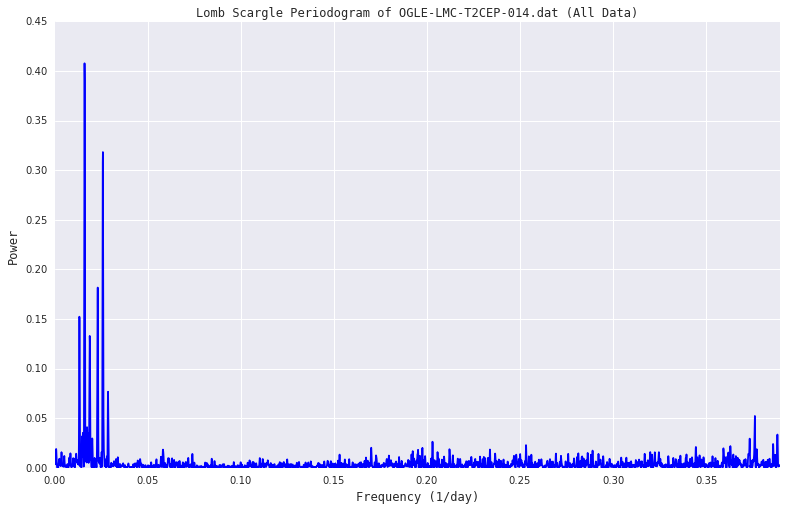

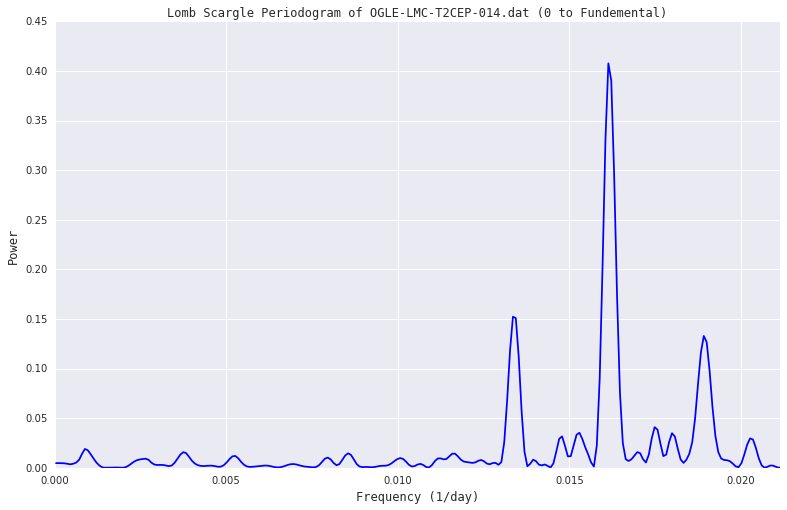

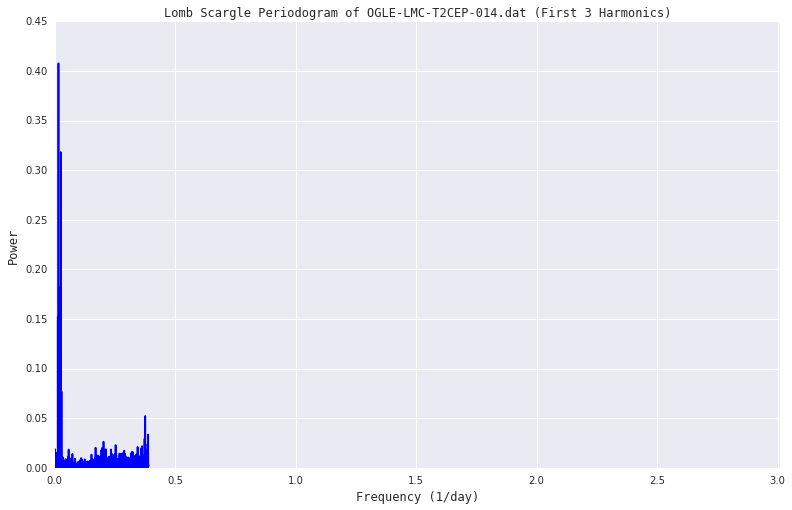

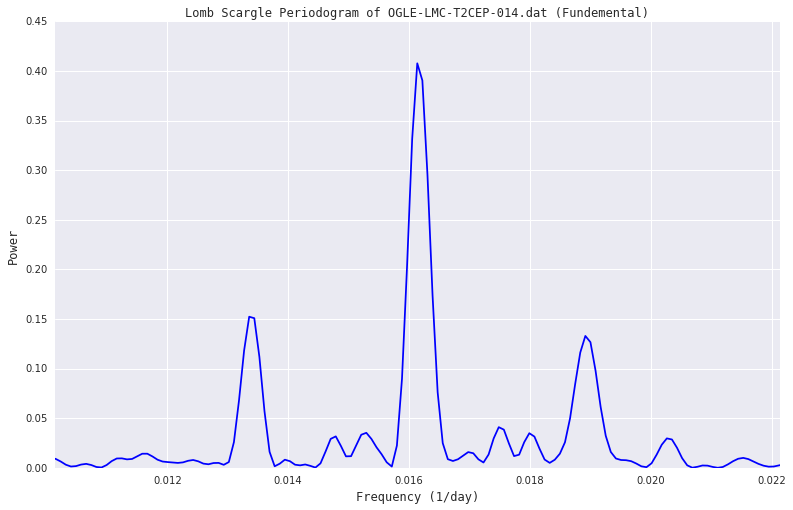

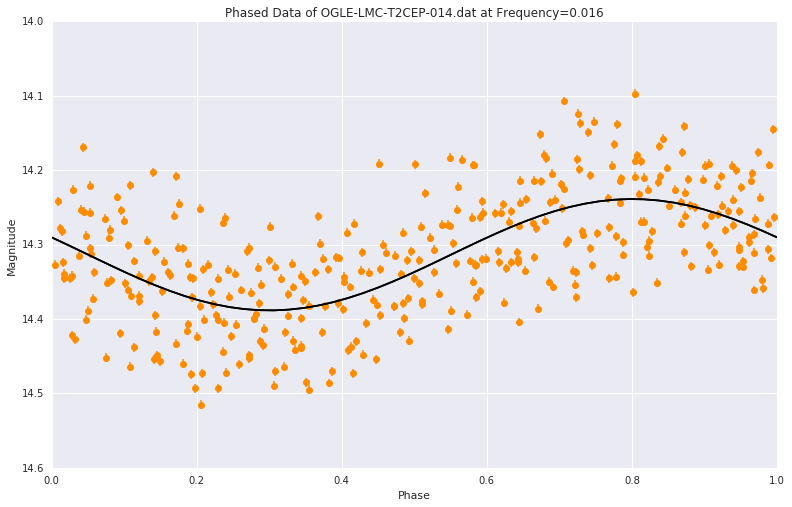

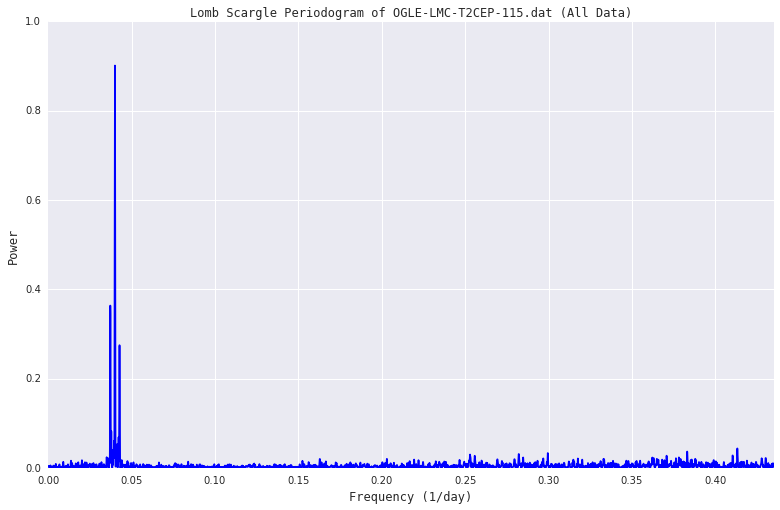

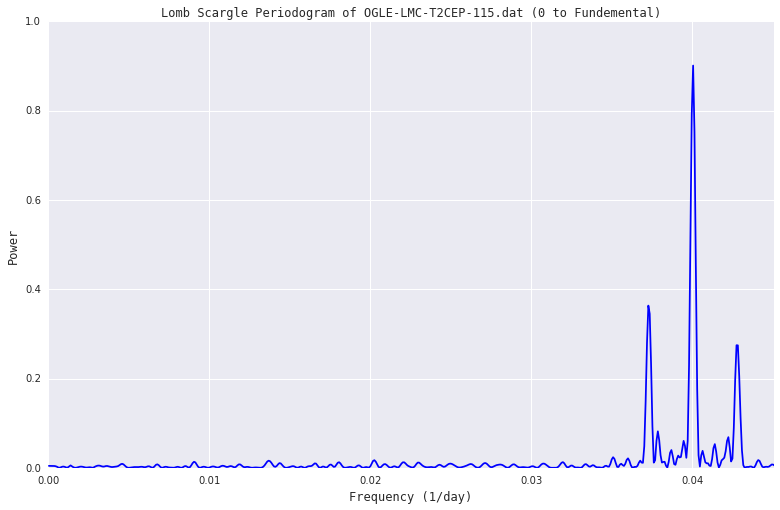

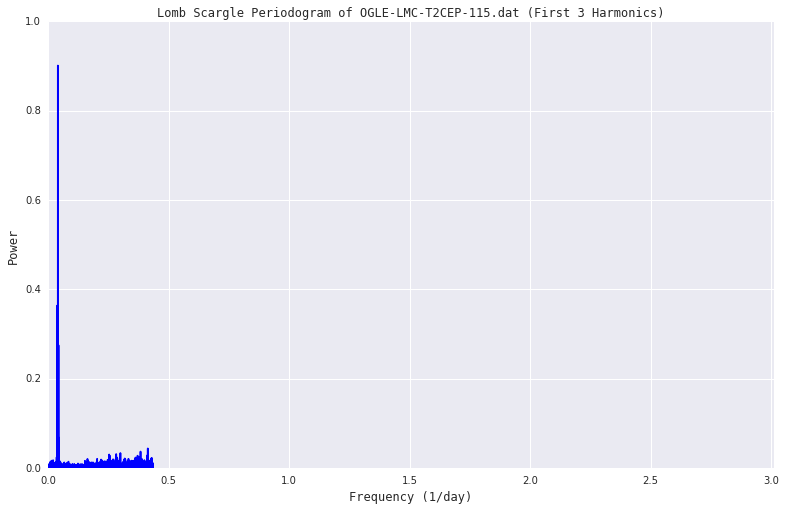

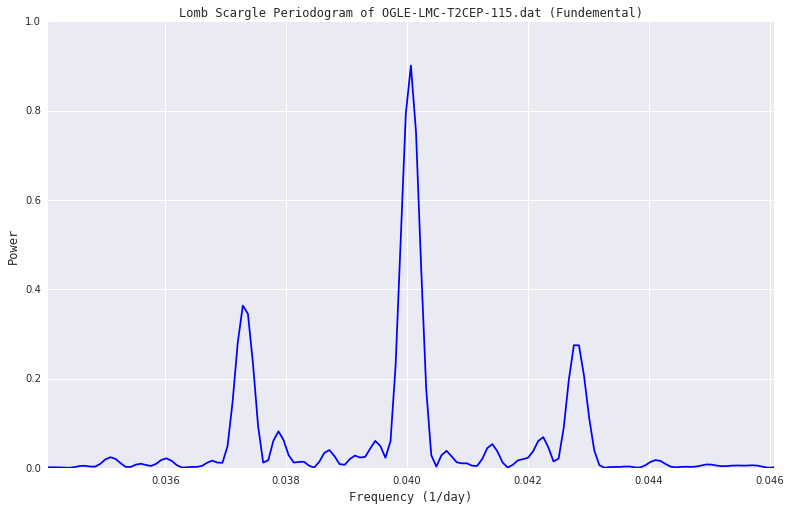

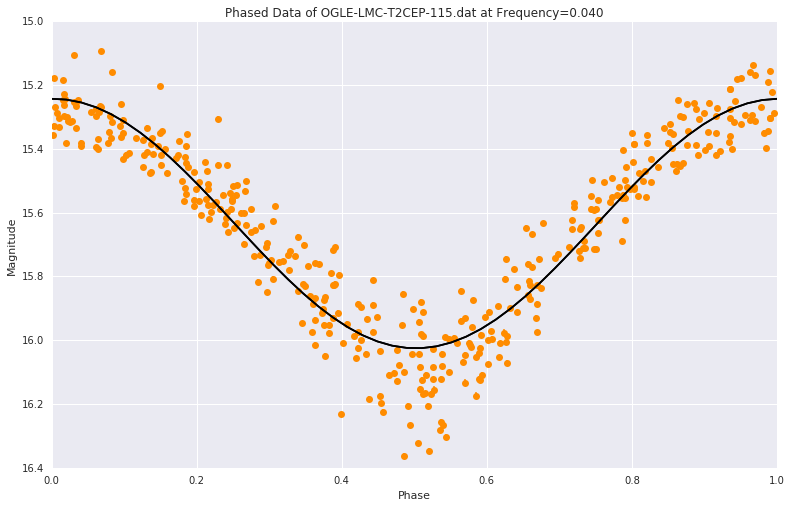

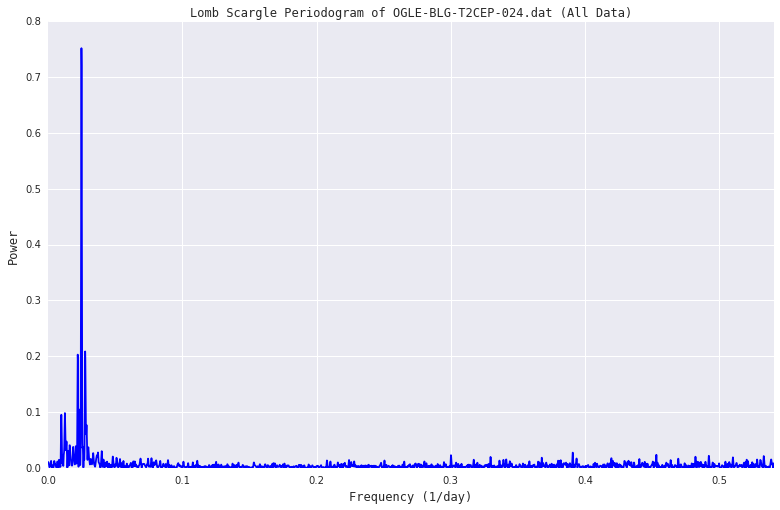

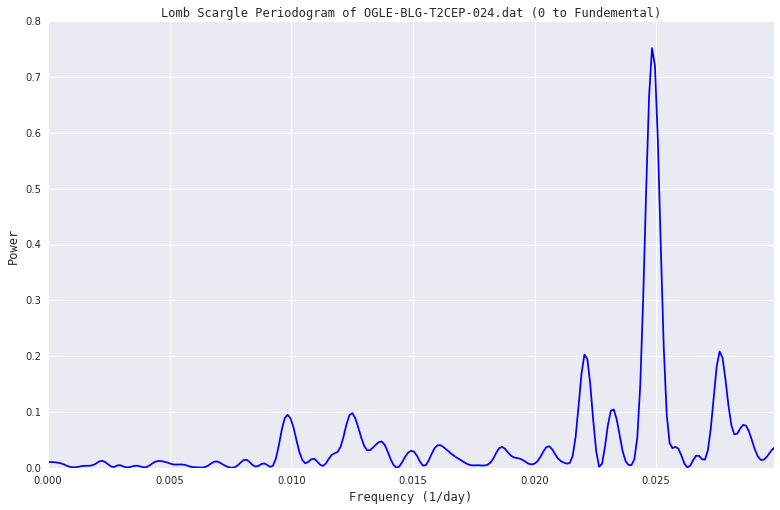

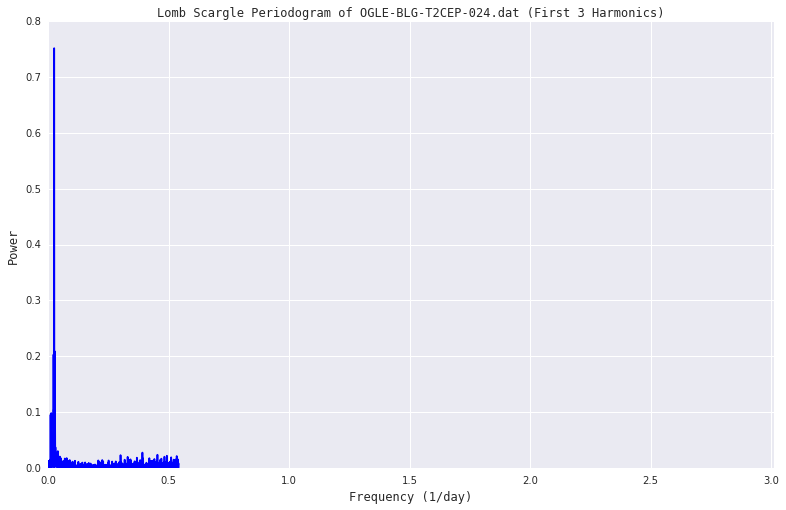

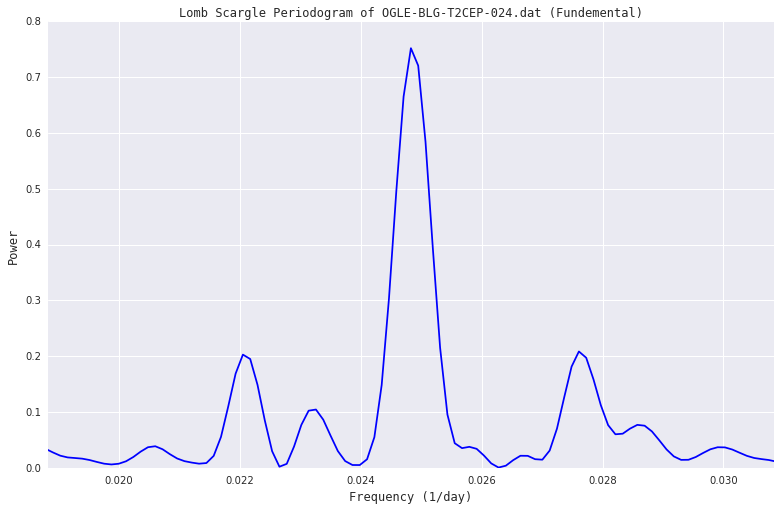

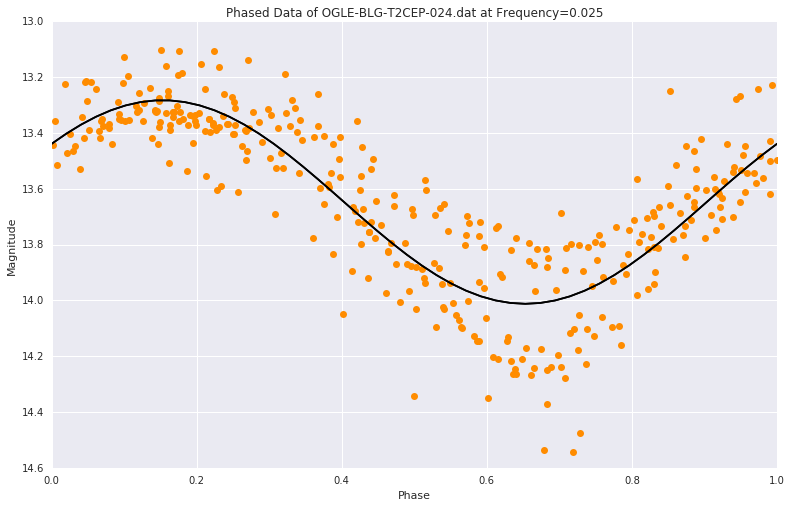

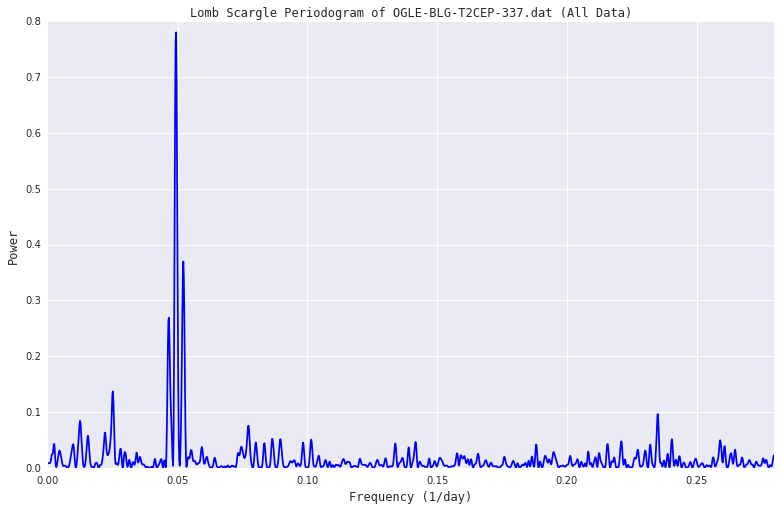

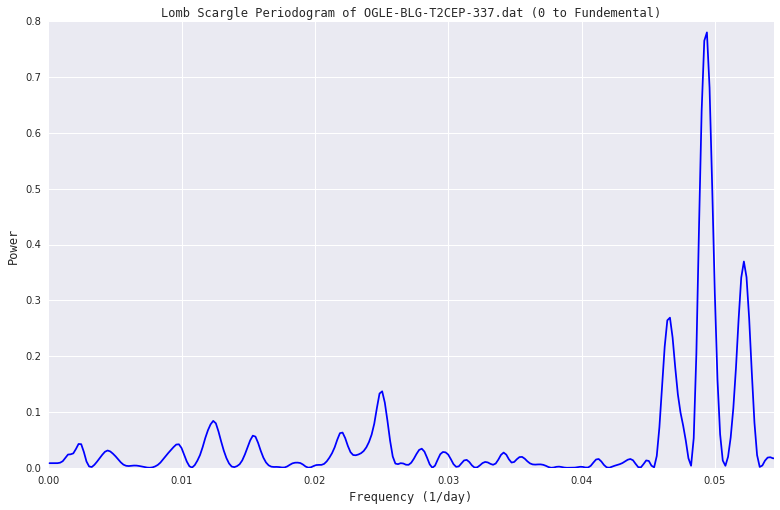

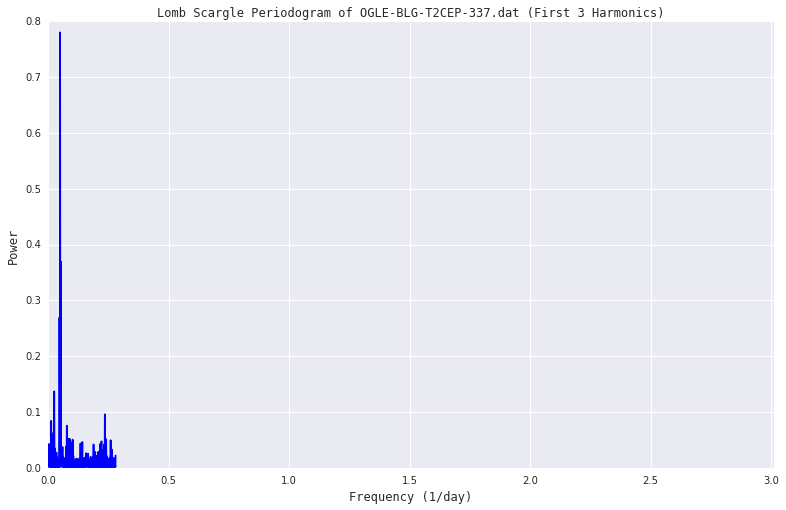

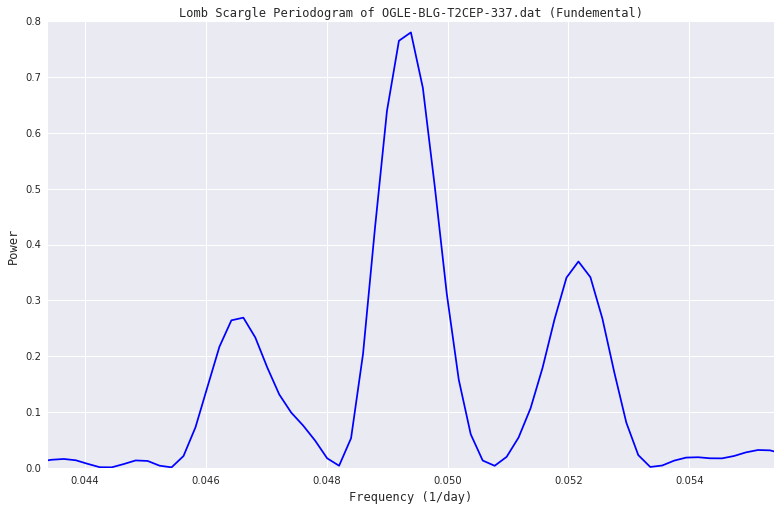

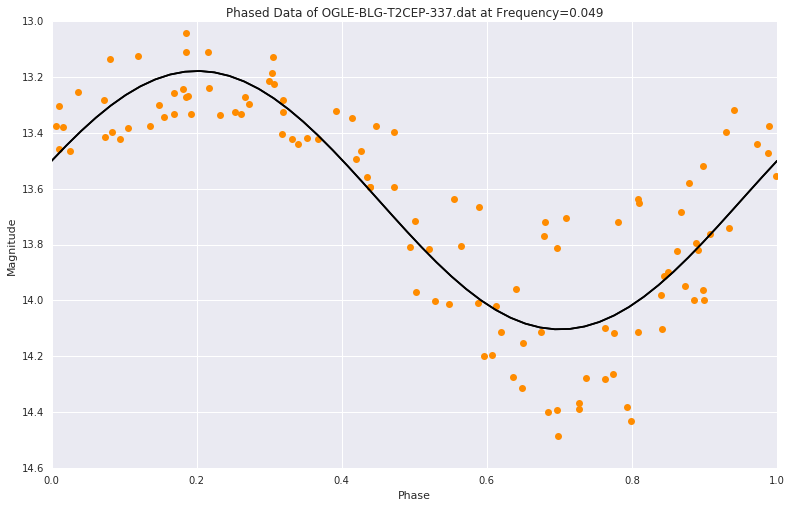

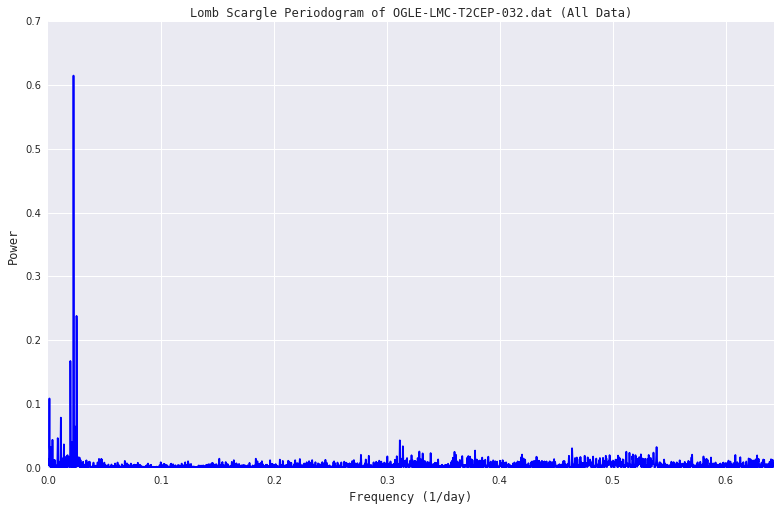

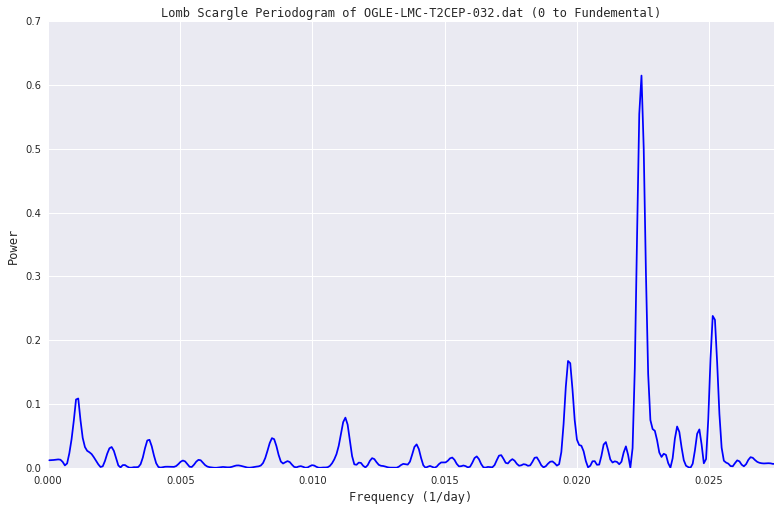

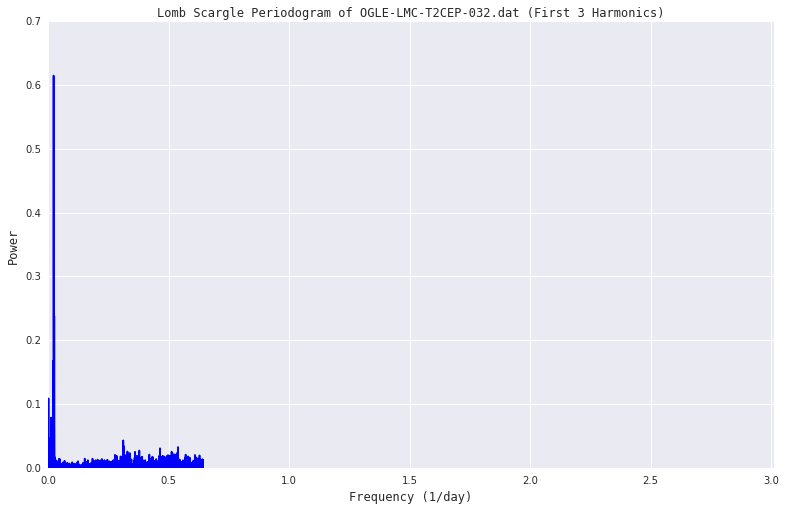

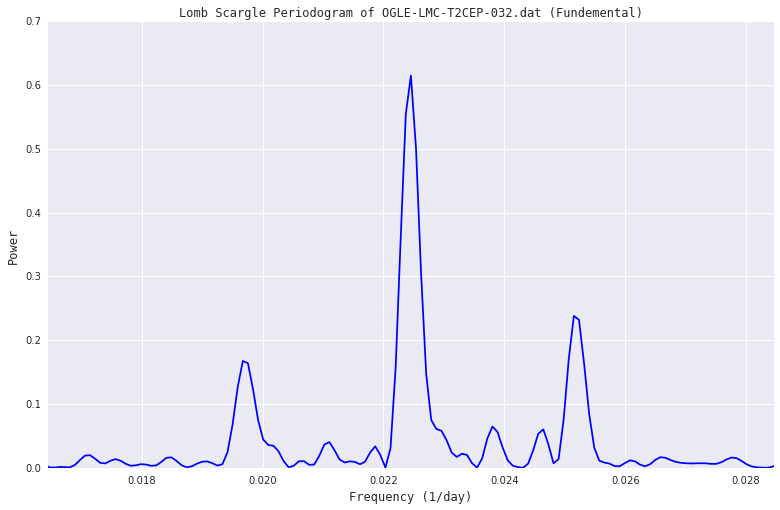

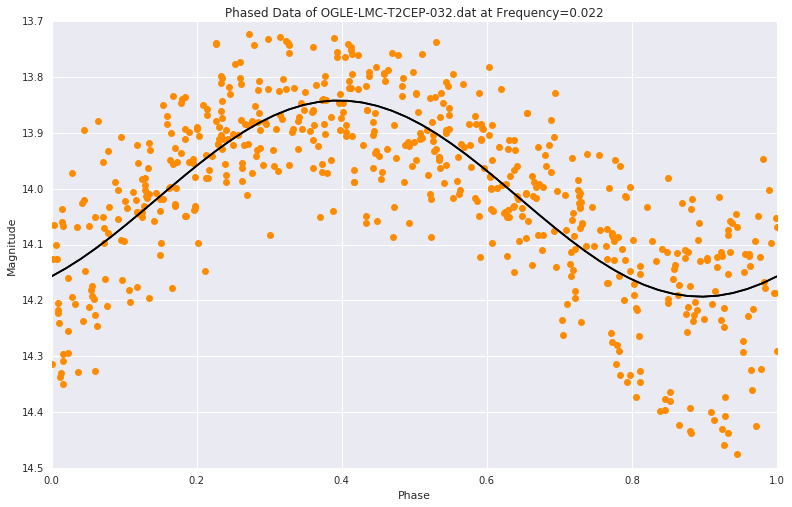

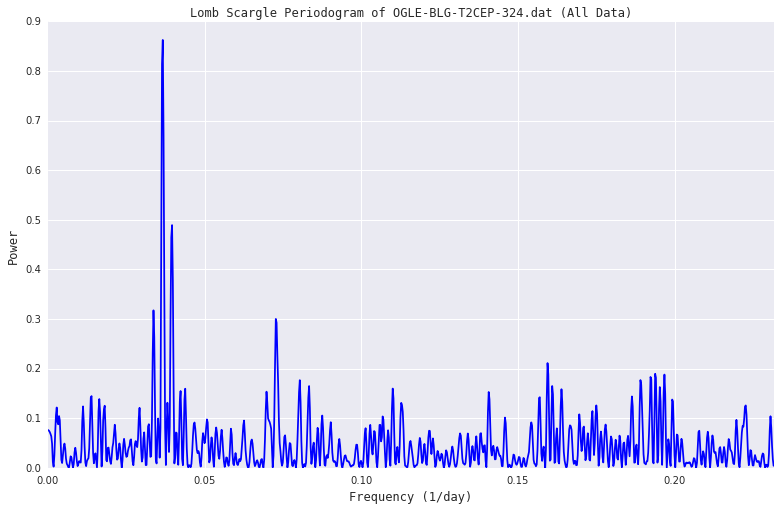

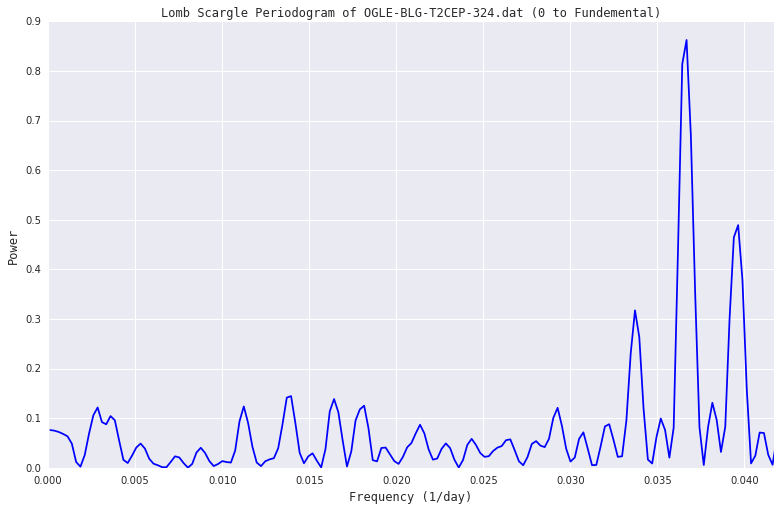

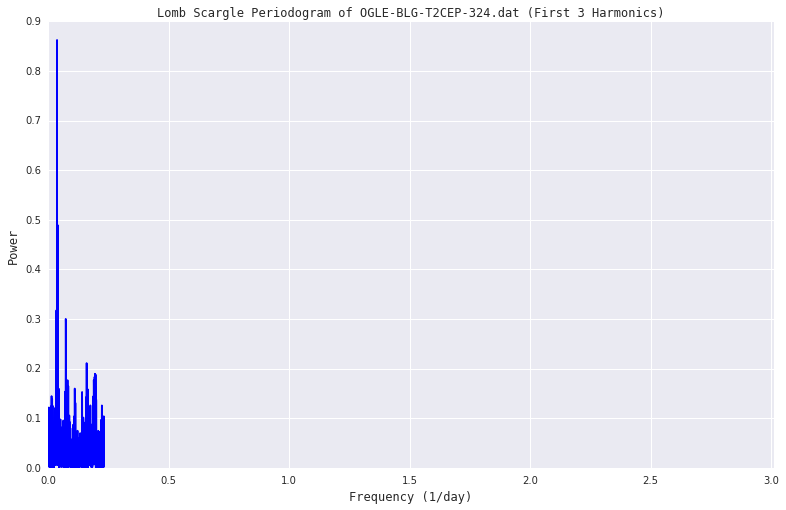

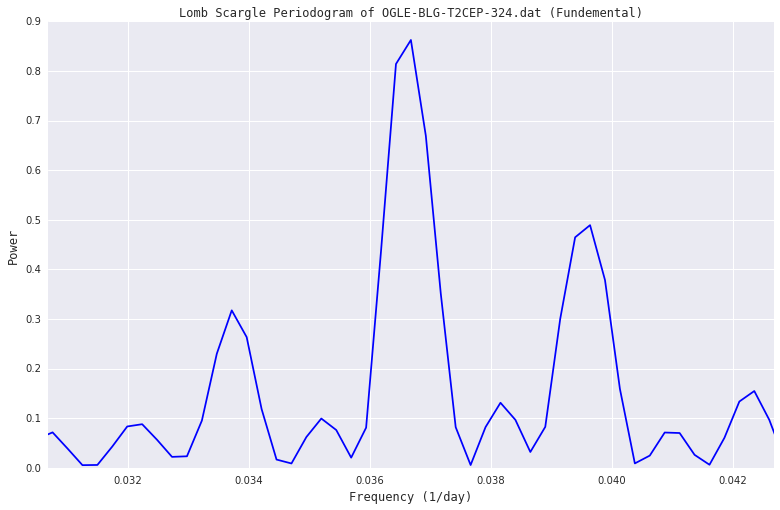

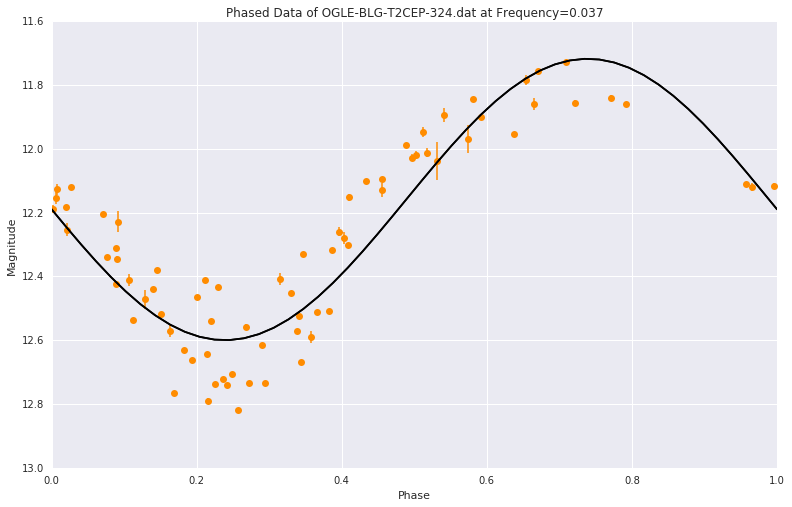

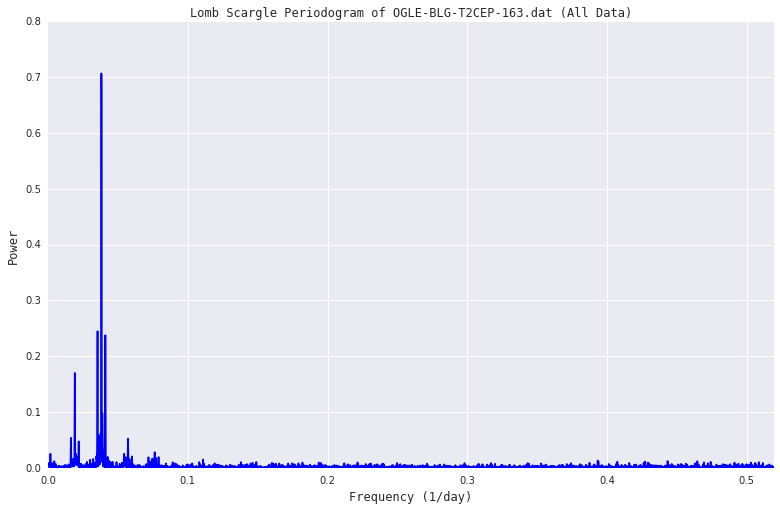

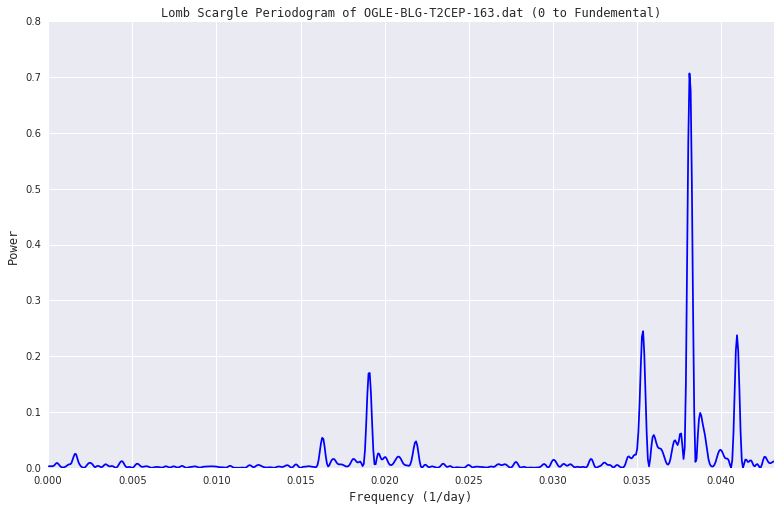

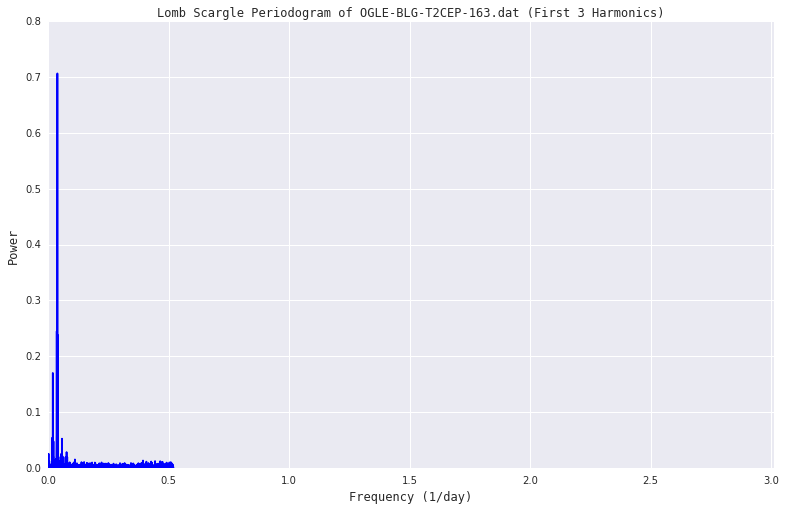

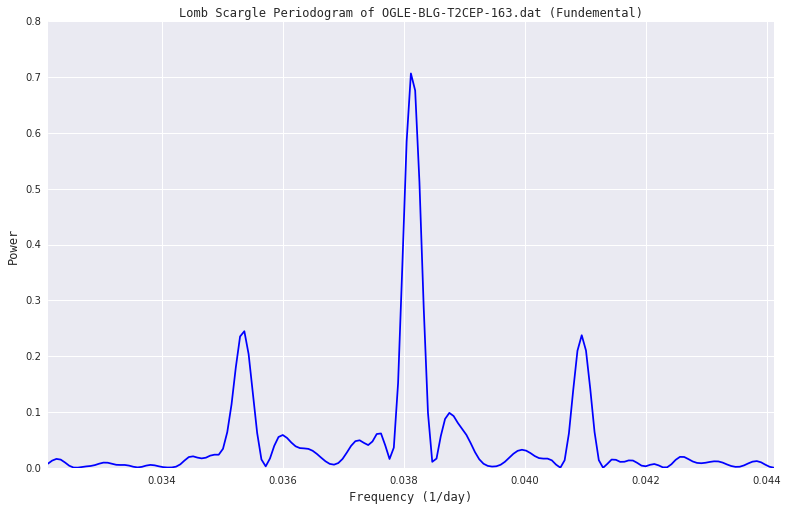

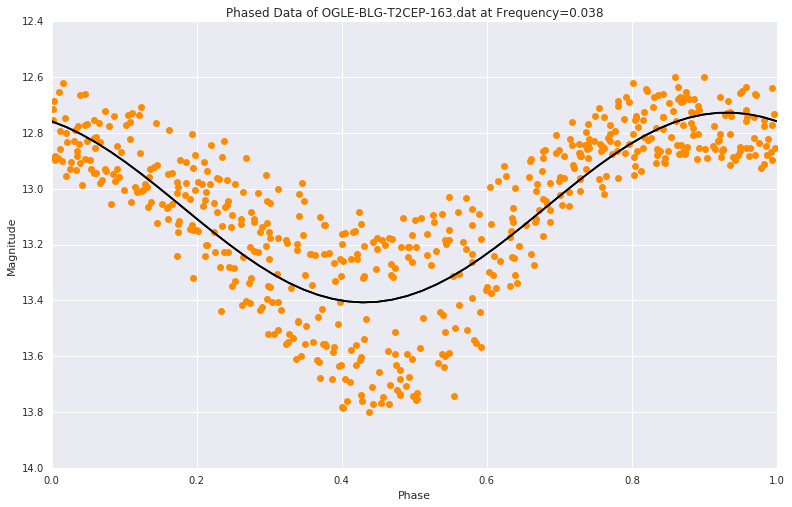

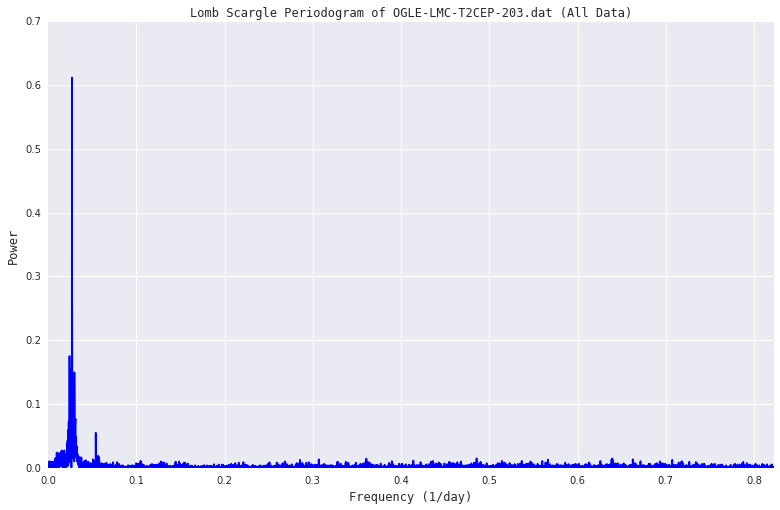

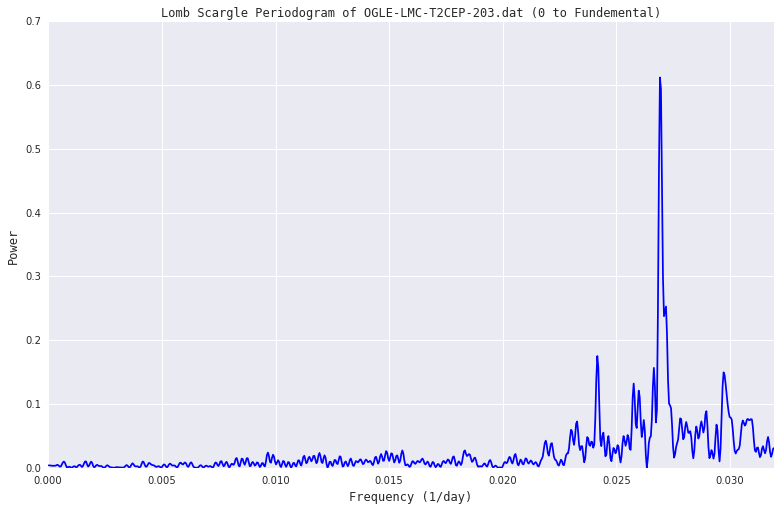

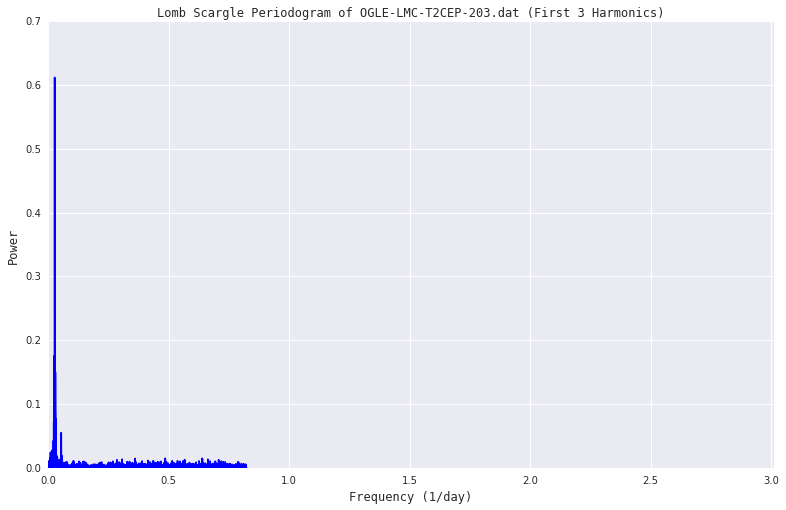

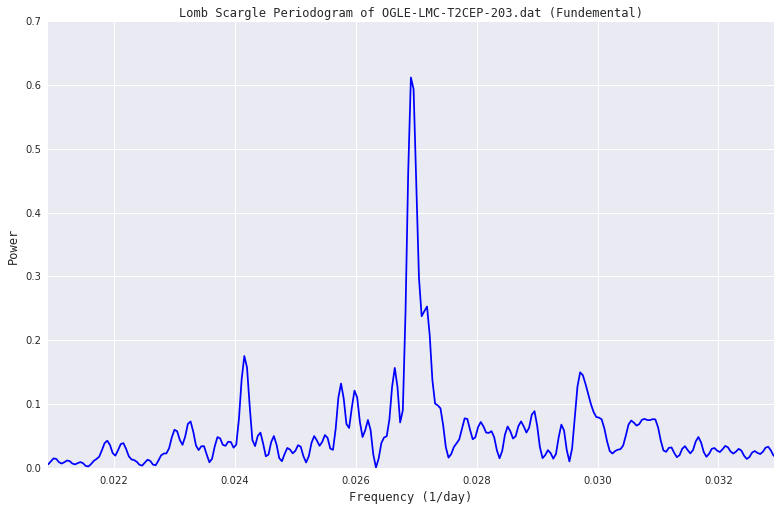

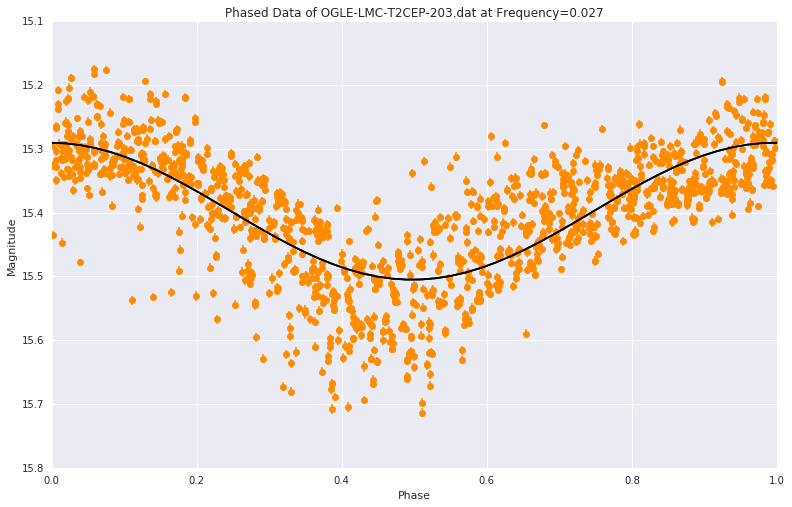

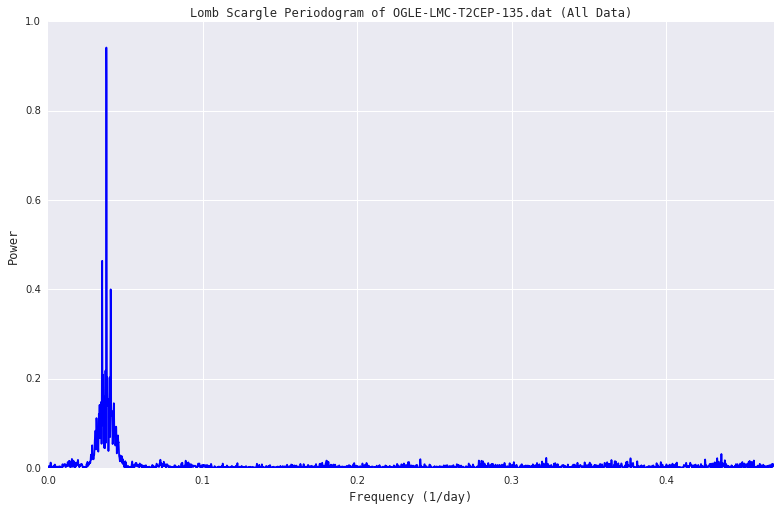

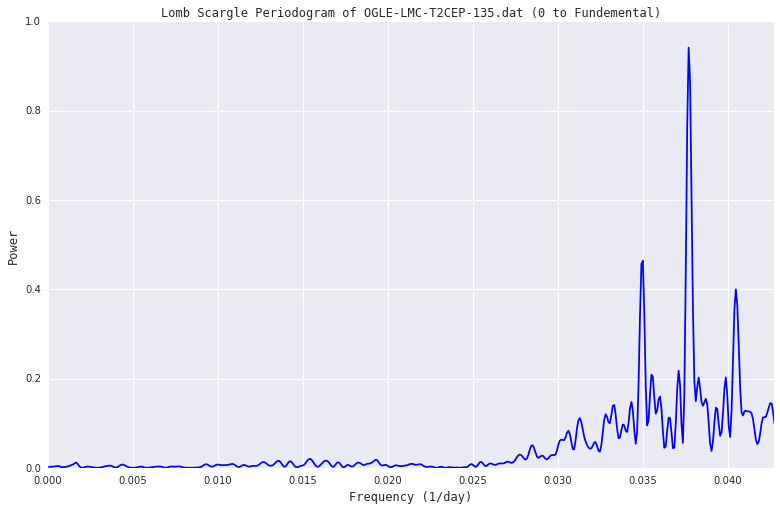

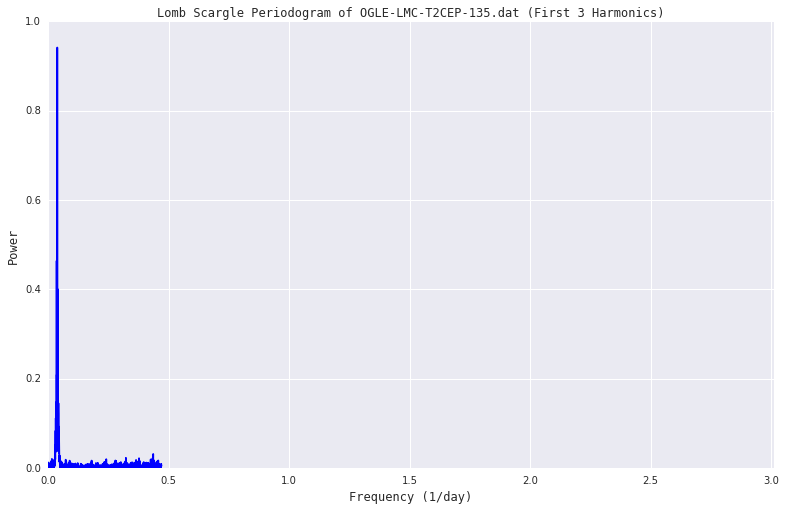

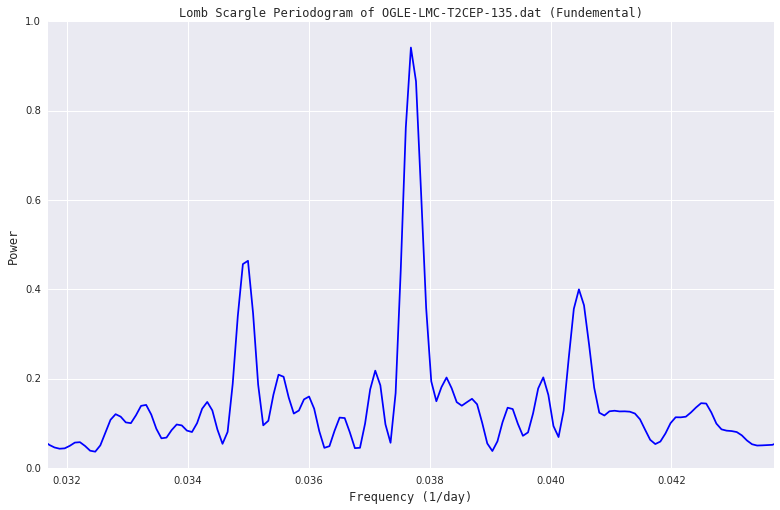

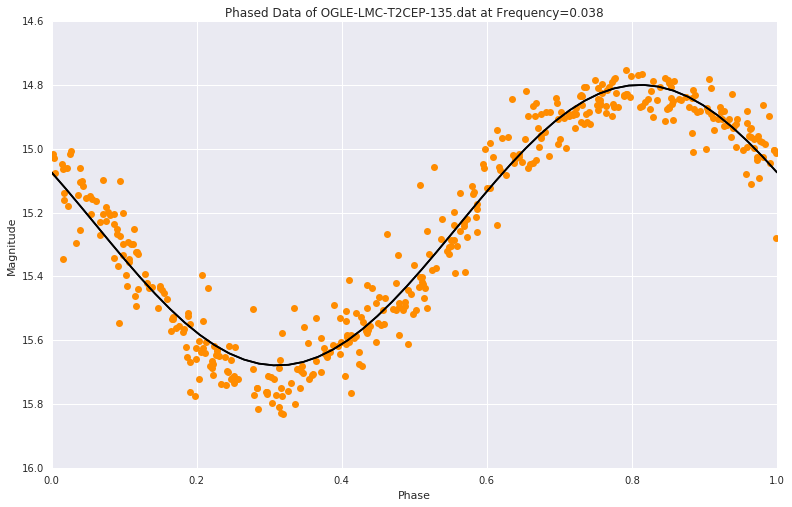

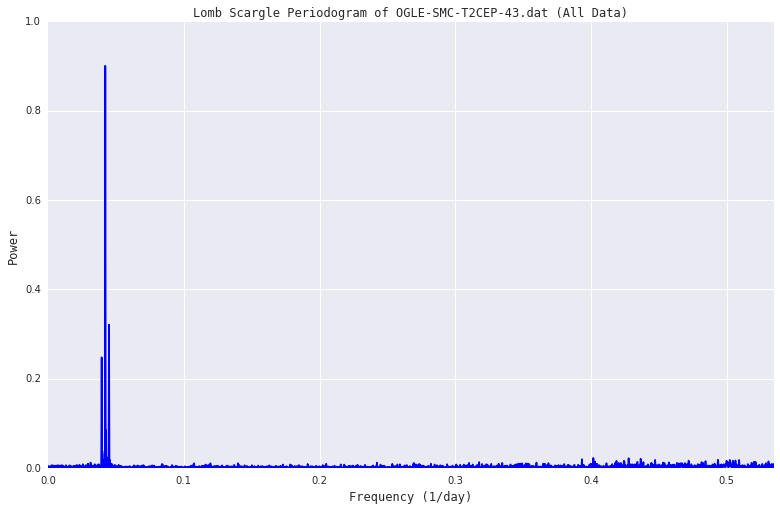

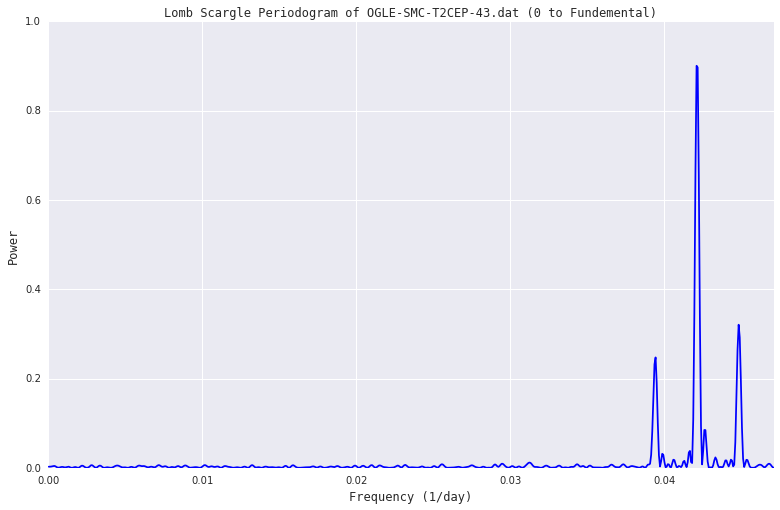

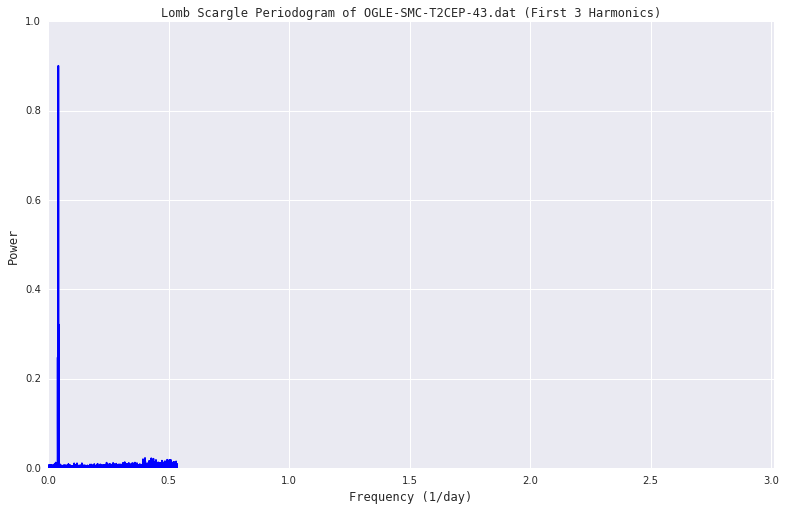

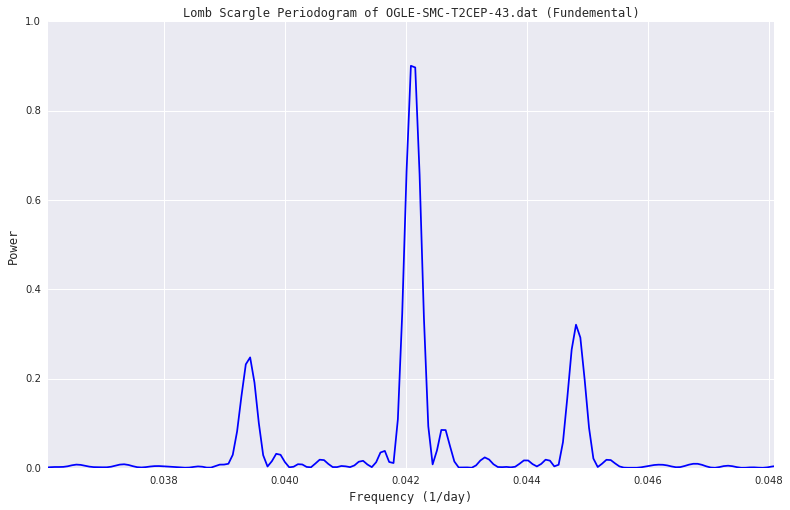

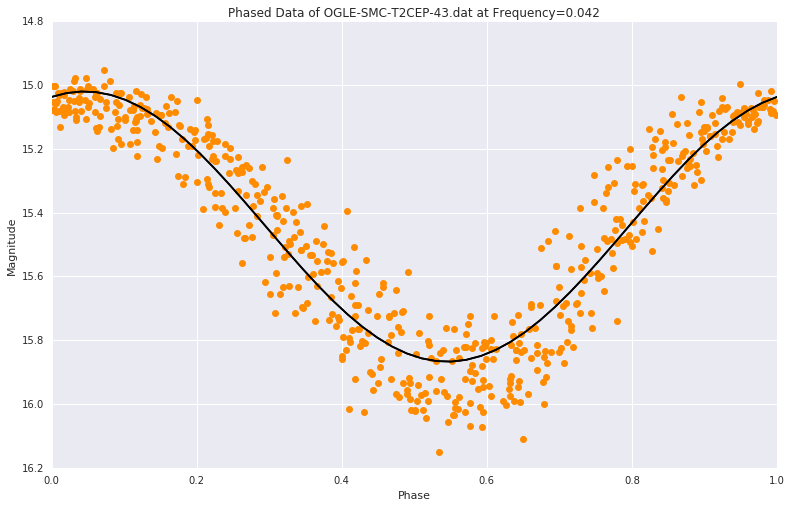

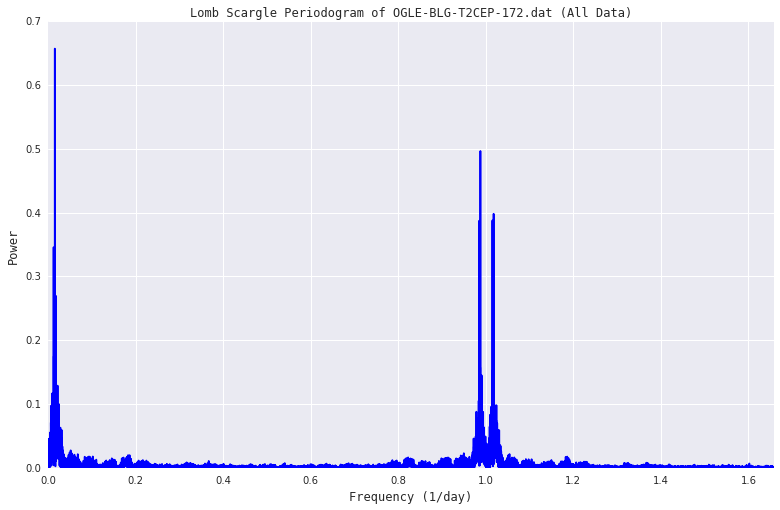

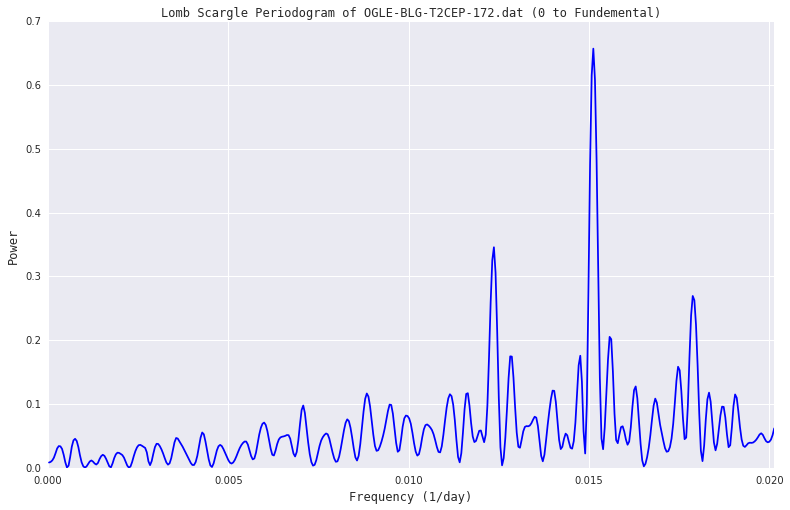

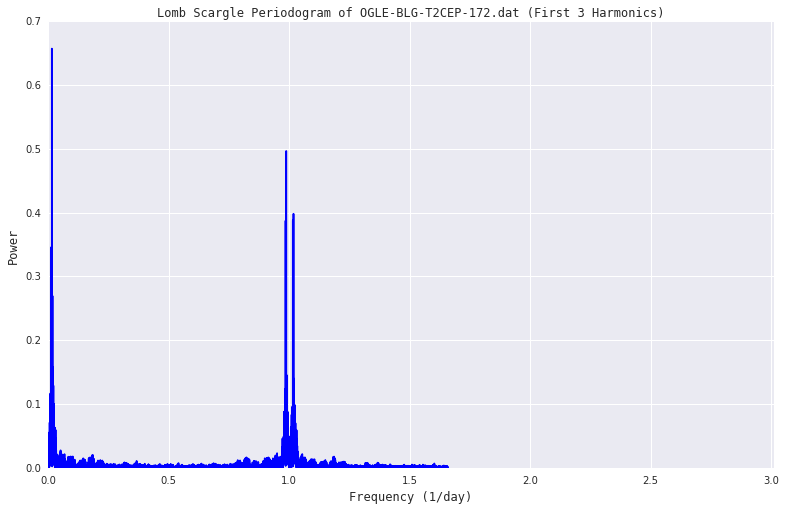

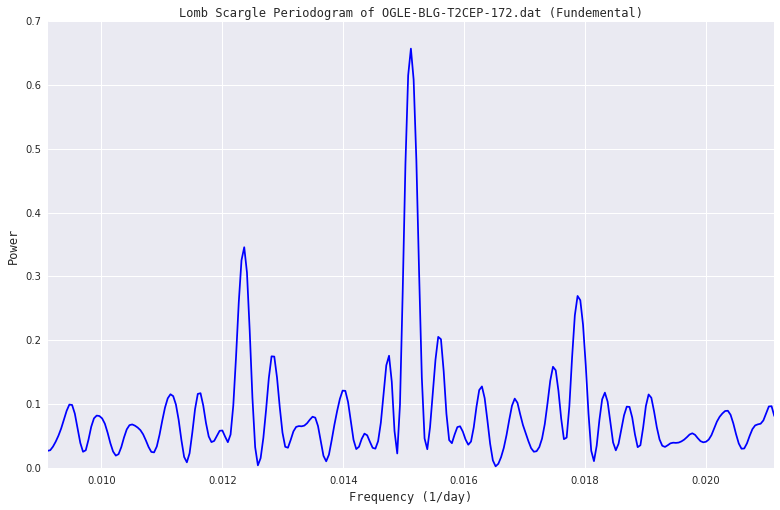

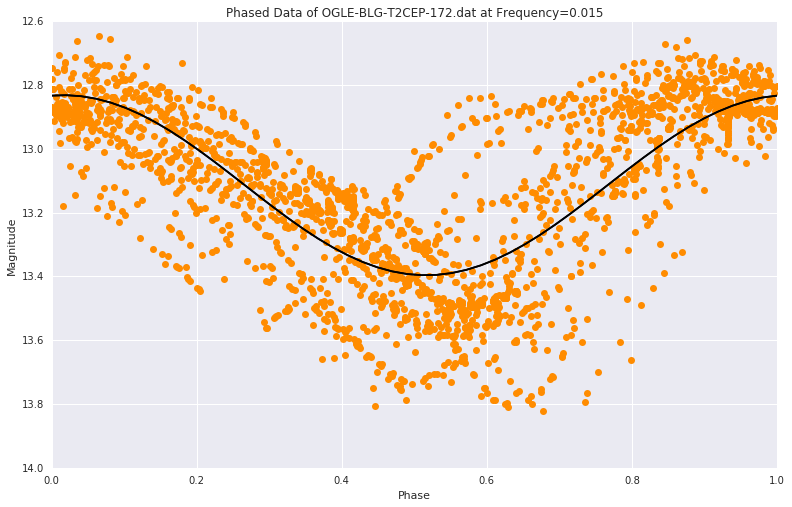

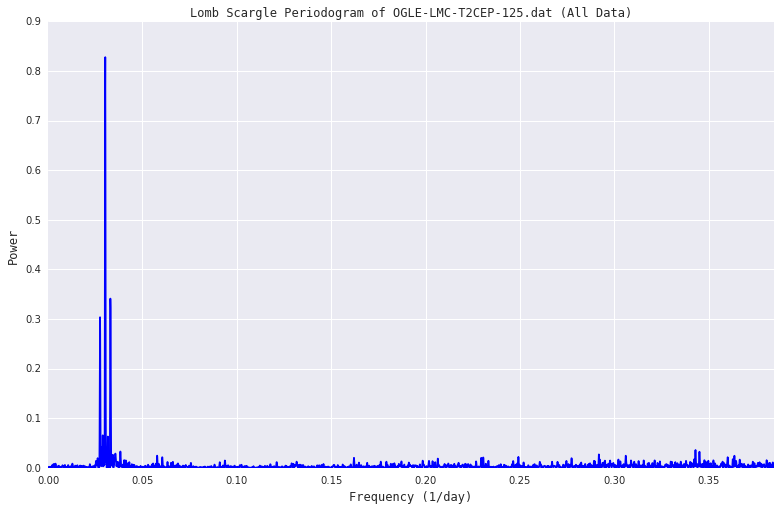

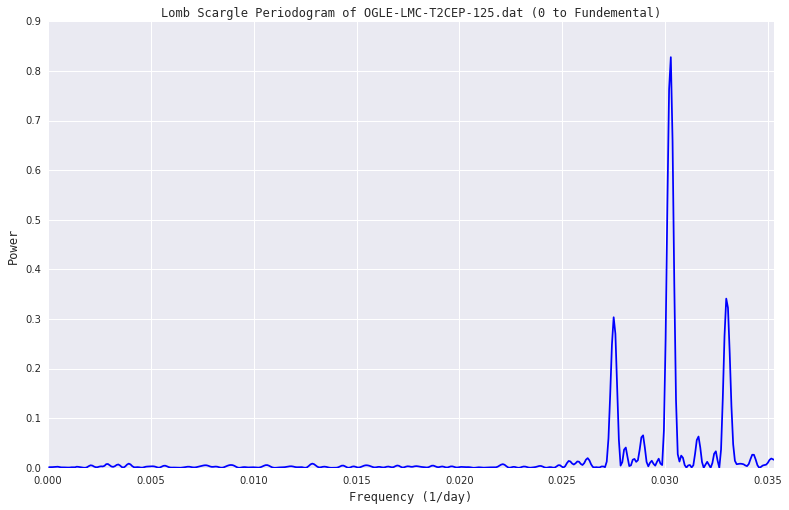

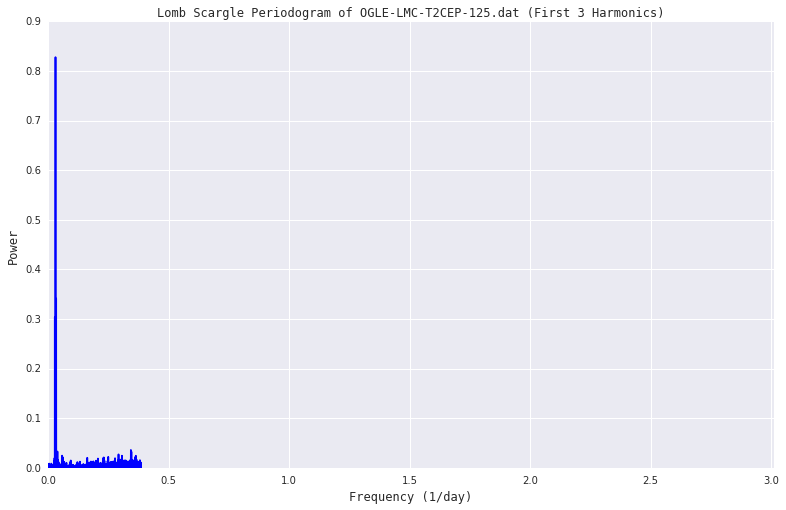

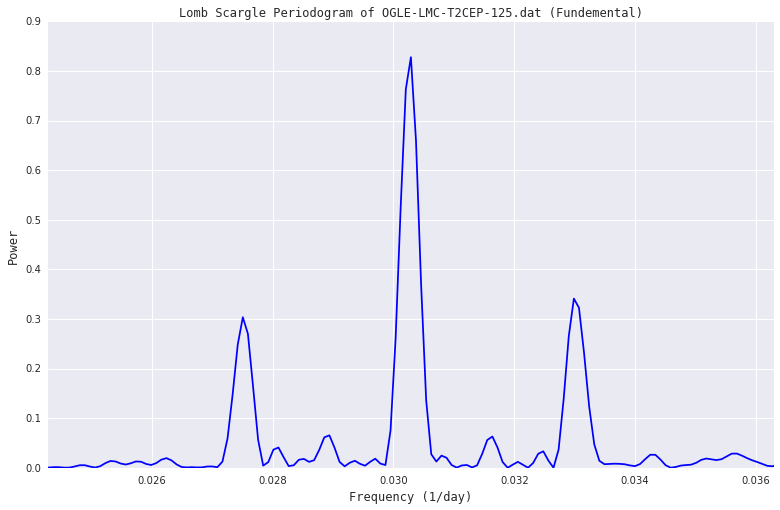

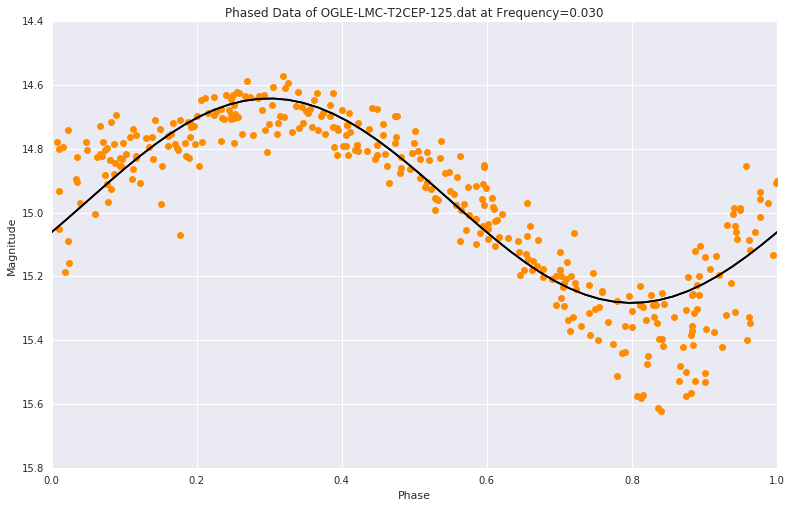

In [ ]:
# Make folder ramed 'periodogram' and 'phase'
folder_names = ['periodogram_rvb', 'phase_rvb']
for folder_name in folder_names:    
    try:
        os.mkdir(folder_name)
    except:
        pass

# Make sub folders
folder_names = ['(All Data)',
                '(0 to Fundemental)',
                '(First 3 Harmonics)',
                '(Fundemental)']
for folder_name in folder_names:
    try:
        os.mkdir('periodogram_rvb/'+folder_name)
    except:
        pass

# Read lightcurves from disk
light_curves = pickle.load(open('light_curves_rvb.p', 'rb'))

# In this loop: plot a set of periodograms for each lightcurve then phase plots
for (star, (time, mag, err)) in light_curves:
    
    # nterms (1 by default) controls how many Fourier terms are used in the model.
    frequency, power = LombScargle(time, mag, err, nterms = 1).autopower()
    
    # The fundemental frequency (assumed to be tallest peak in periodogram)
    fund_frequency = frequency[np.argmax(power)]
    
    # Default Plots for each periodogramm
    plot_ranges = ((' (All Data)', [min(frequency), max(frequency)]),
                   (' (0 to Fundemental)', [0, fund_frequency+0.005]),
                   (' (First 3 Harmonics)', [0, 3.01]),
                   (' (Fundemental)', [fund_frequency-0.006, fund_frequency+0.006]))
    # Periodogram plotting
    for (title, r) in plot_ranges:
        plt.figure(figsize=(13,8))
        plt.plot(frequency, power, c='b')
        plt.xlabel('Frequency (1/day)', size='medium', family = 'monospace')
        plt.ylabel('Power', size='medium', family = 'monospace')
        plt.title('Lomb Scargle Periodogram of ' +star +title, size='medium', family = 'monospace')
        plt.xlim(r)
        plt.savefig('periodogram_rvb/'+title.strip()+'/'+star+title+'_periodogram.png')
        plt.show()
        plt.close()
    
    # Phase plotting
    phase_fit = np.linspace(0, 1)
    y_fit = LombScargle(time, mag, err, nterms=1).model(phase_fit/fund_frequency, frequency=fund_frequency)
    phase = (time*fund_frequency)%1

    fig, ax = plt.subplots(figsize=(13, 8))
    ax.plot(phase_fit, y_fit, color='black', zorder=10)
    ax.errorbar(phase, mag, err, fmt='o', mew=0, capsize=0, elinewidth=1.5, c='darkorange')
    ax.plot(phase_fit, y_fit, color='black')
    ax.invert_yaxis()
    plt.xlim([0,1])
    ax.set(xlabel='Phase',
           ylabel='Magnitude',
           title='Phased Data of '+star+' at Frequency={0:.3f}'.format(fund_frequency))
    plt.savefig('phase_rvb/'+star+'_{0:.3f}_phase.png'.format(fund_frequency))
    plt.show()
    plt.close()